# Import Libraries

In [1]:
import pandas as pd
from pathlib import Path
import zipfile
import os
import sqlite3
from datetime import datetime
import glob
from pprint import pprint
# import praw
import pprint
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
# import contractions
import re
# from langdetect import detect
# from langdetect.lang_detect_exception import LangDetectException
from collections import Counter
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import gensim.downloader as api
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from dateutil.parser import parse
from datetime import datetime
from pandas import json_normalize

#  Read Previous File NLP operations

In [2]:
df_clean =pd.read_csv('df_clean_NEW.csv')
df_clean.drop(columns=['Unnamed: 0'],inplace=True)
df_clean

date  vader_sentiment  textblob_sentiment  is_event  topic_12  \
0     28/01/2012           0.9946            0.129496         1  0.534414   
1     29/01/2012           0.9951            0.026796         1  0.433312   
2     30/01/2012           0.9806            0.136525         1  0.669137   
3     31/01/2012           0.9766            0.102778         1  0.572719   
4     01/02/2012           0.9977            0.332493         1  0.728204   
...          ...              ...                 ...       ...       ...   
4371  04/09/2024          -0.8807           -0.150000         1  0.000000   
4372  05/09/2024           0.6597            0.477778         1  0.572521   
4373  04/10/2024           0.8393            0.500000         1  0.000000   
4374  04/11/2024           0.6486            0.700000         1  0.000000   
4375  04/12/2024          -0.5719           -0.266667         1  0.000000   

      topic_14  topic_15  topic_4   topic_5  topic_1  ...  \
0     0.336033  0.129553      0.0  0.000000      0.0  ...   
1     0.537105  0.029583      0.0  0.000000      0.0  ...   
2     0.222382  0.108482      0.0  0.000000      0.0  ...   
3     0.368841  0.058440      0.0  0.000000      0.0  ...   
4     0.205685  0.066111      0.0  0.000000      0.0  ...   
...        ...       ...      ...       ...      ...  ...   
4371  0.633391  0.366609      0.0  0.000000      0.0  ...   
4372  0.139108  0.000000      0.0  0.288372      0.0  ...   
4373  0.092120  0.000000      0.0  0.907880      0.0  ...   
4374  0.107711  0.862693      0.0  0.000000      0.0  ...   
4375  0.159972  0.662358      0.0  0.177670      0.0  ...   

      QUANTITY_thousand mile  QUANTITY_gallon  QUANTITY_hundred mile  \
0                          0                0                      0   
1                          0                0                      0   
2                          0                0                      0   
3                          0                0                      0   
4                          0                0                      0   
...                      ...              ...                    ...   
4371                       0                0                      0   
4372                       0                0                      0   
4373                       0                0                      0   
4374                       0                0                      0   
4375                       0                0                      0   

      QUANTITY_mile  QUANTITY_two mile  TIME_morning  TIME_night  TIME_hour  \
0                 1                  0             0           0          0   
1                 0                  0             0           1          0   
2                 1                  0             0           1          0   
3                 0                  0             0           1          1   
4                 0                  0             0           0          1   
...             ...                ...           ...         ...        ...   
4371              0                  0             0           0          0   
4372              0                  0             0           0          0   
4373              0                  0             0           0          0   
4374              0                  0             0           0          0   
4375              0                  0             0           0          0   

      TIME_tonight  TIME_evening  
0                0             1  
1                0             1  
2                0             0  
3                0             0  
4                0             0  
...            ...           ...  
4371             0             0  
4372             0             0  
4373             0             0  
4374             0             0  
4375             0             0  

[4376 rows x 92 columns]

In [3]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d/%m/%Y')
df_clean['date'].max()

Timestamp('2024-12-04 00:00:00')

# Stocks Data

In [4]:
stocks_df = pd.read_csv(r"FTSE 100 Historical Results Price Data.csv")
stocks_df.dropna(inplace=True)
stocks_df

Date     Price      Open      High       Low     Vol. Change %
0     30/08/2024  8,376.63  8,379.64  8,414.37  8,363.74    1.08B   -0.04%
1     29/08/2024  8,379.64  8,343.85  8,392.40  8,336.58  590.01M    0.43%
2     28/08/2024  8,343.85  8,345.46  8,362.74  8,322.28  608.50M   -0.02%
3     27/08/2024  8,345.46  8,327.78  8,400.43  8,327.78  772.31M    0.21%
4     23/08/2024  8,327.78  8,288.00  8,331.90  8,288.00  614.51M    0.48%
...          ...       ...       ...       ...       ...      ...      ...
3194  09/01/2012  5,612.26  5,649.68  5,673.82  5,604.62  785.65M   -0.66%
3195  06/01/2012  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
3196  05/01/2012  5,624.26  5,668.45  5,689.33  5,614.38  794.28M   -0.78%
3197  04/01/2012  5,668.45  5,699.91  5,719.83  5,646.36  696.94M   -0.55%
3198  03/01/2012  5,699.91  5,572.28  5,699.91  5,572.28  778.53M    2.29%

[3199 rows x 7 columns]

In [5]:
# Convert 'Date' to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format='%d/%m/%Y')

In [6]:
stocks_df['Date'].min(), stocks_df['Date'].max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [7]:
# Create a full date range from the min to max date in the DataFrame
full_date_range = pd.date_range(start=stocks_df['Date'].min(), end=stocks_df['Date'].max())
full_date_range

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24',
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', length=4624, freq='D')

In [8]:
# Create a DataFrame with the full date range
full_dates_df = pd.DataFrame(full_date_range, columns=['Date'])
full_dates_df

Date
0    2012-01-03
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-07
...         ...
4619 2024-08-26
4620 2024-08-27
4621 2024-08-28
4622 2024-08-29
4623 2024-08-30

[4624 rows x 1 columns]

In [9]:
# Merge the full date range DataFrame with the original data
stocks_df = pd.merge(full_dates_df, stocks_df, on='Date', how='left')
stocks_df

Date     Price      Open      High       Low     Vol. Change %
0    2012-01-03  5,699.91  5,572.28  5,699.91  5,572.28  778.53M    2.29%
1    2012-01-04  5,668.45  5,699.91  5,719.83  5,646.36  696.94M   -0.55%
2    2012-01-05  5,624.26  5,668.45  5,689.33  5,614.38  794.28M   -0.78%
3    2012-01-06  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
4    2012-01-07       NaN       NaN       NaN       NaN      NaN      NaN
...         ...       ...       ...       ...       ...      ...      ...
4619 2024-08-26       NaN       NaN       NaN       NaN      NaN      NaN
4620 2024-08-27  8,345.46  8,327.78  8,400.43  8,327.78  772.31M    0.21%
4621 2024-08-28  8,343.85  8,345.46  8,362.74  8,322.28  608.50M   -0.02%
4622 2024-08-29  8,379.64  8,343.85  8,392.40  8,336.58  590.01M    0.43%
4623 2024-08-30  8,376.63  8,379.64  8,414.37  8,363.74    1.08B   -0.04%

[4624 rows x 7 columns]

# # Forward fill the missing values

In [10]:

stocks_df.ffill(inplace=True)
stocks_df.bfill(inplace=True)
stocks_df

Date     Price      Open      High       Low     Vol. Change %
0    2012-01-03  5,699.91  5,572.28  5,699.91  5,572.28  778.53M    2.29%
1    2012-01-04  5,668.45  5,699.91  5,719.83  5,646.36  696.94M   -0.55%
2    2012-01-05  5,624.26  5,668.45  5,689.33  5,614.38  794.28M   -0.78%
3    2012-01-06  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
4    2012-01-07  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
...         ...       ...       ...       ...       ...      ...      ...
4619 2024-08-26  8,327.78  8,288.00  8,331.90  8,288.00  614.51M    0.48%
4620 2024-08-27  8,345.46  8,327.78  8,400.43  8,327.78  772.31M    0.21%
4621 2024-08-28  8,343.85  8,345.46  8,362.74  8,322.28  608.50M   -0.02%
4622 2024-08-29  8,379.64  8,343.85  8,392.40  8,336.58  590.01M    0.43%
4623 2024-08-30  8,376.63  8,379.64  8,414.37  8,363.74    1.08B   -0.04%

[4624 rows x 7 columns]

# Pre-process data

In [11]:
# Merge the full date range DataFrame with the original data
stocks_df = pd.merge(full_dates_df, stocks_df, on='Date', how='left')
stocks_df

Date     Price      Open      High       Low     Vol. Change %
0    2012-01-03  5,699.91  5,572.28  5,699.91  5,572.28  778.53M    2.29%
1    2012-01-04  5,668.45  5,699.91  5,719.83  5,646.36  696.94M   -0.55%
2    2012-01-05  5,624.26  5,668.45  5,689.33  5,614.38  794.28M   -0.78%
3    2012-01-06  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
4    2012-01-07  5,649.68  5,624.26  5,682.78  5,623.36  705.02M    0.45%
...         ...       ...       ...       ...       ...      ...      ...
4619 2024-08-26  8,327.78  8,288.00  8,331.90  8,288.00  614.51M    0.48%
4620 2024-08-27  8,345.46  8,327.78  8,400.43  8,327.78  772.31M    0.21%
4621 2024-08-28  8,343.85  8,345.46  8,362.74  8,322.28  608.50M   -0.02%
4622 2024-08-29  8,379.64  8,343.85  8,392.40  8,336.58  590.01M    0.43%
4623 2024-08-30  8,376.63  8,379.64  8,414.37  8,363.74    1.08B   -0.04%

[4624 rows x 7 columns]

In [12]:
# Convert Date to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format='%d/%m/%Y')

# Remove commas from numeric columns and convert to float
for column in ['Price', 'Open', 'High', 'Low']:
    stocks_df[column] = stocks_df[column].str.replace(',', '').astype(float)

In [13]:
# Convert Vol. to numeric
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.upper()  # Ensure consistency in case
        if 'M' in vol_str:
            return float(vol_str.replace('M', '').replace(',', '')) * 1_000_000
        elif 'B' in vol_str:
            return float(vol_str.replace('B', '').replace(',', '')) * 1_000_000_000
        else:
            return float(vol_str.replace(',', ''))
    else:
        return vol_str

stocks_df['Vol.'] = stocks_df['Vol.'].apply(convert_volume)

In [14]:
# Convert Change % to numeric
stocks_df['Change %'] = stocks_df['Change %'].str.replace('%', '').astype(float)
stocks_df

Date    Price     Open     High      Low          Vol.  Change %
0    2012-01-03  5699.91  5572.28  5699.91  5572.28  7.785300e+08      2.29
1    2012-01-04  5668.45  5699.91  5719.83  5646.36  6.969400e+08     -0.55
2    2012-01-05  5624.26  5668.45  5689.33  5614.38  7.942800e+08     -0.78
3    2012-01-06  5649.68  5624.26  5682.78  5623.36  7.050200e+08      0.45
4    2012-01-07  5649.68  5624.26  5682.78  5623.36  7.050200e+08      0.45
...         ...      ...      ...      ...      ...           ...       ...
4619 2024-08-26  8327.78  8288.00  8331.90  8288.00  6.145100e+08      0.48
4620 2024-08-27  8345.46  8327.78  8400.43  8327.78  7.723100e+08      0.21
4621 2024-08-28  8343.85  8345.46  8362.74  8322.28  6.085000e+08     -0.02
4622 2024-08-29  8379.64  8343.85  8392.40  8336.58  5.900100e+08      0.43
4623 2024-08-30  8376.63  8379.64  8414.37  8363.74  1.080000e+09     -0.04

[4624 rows x 7 columns]

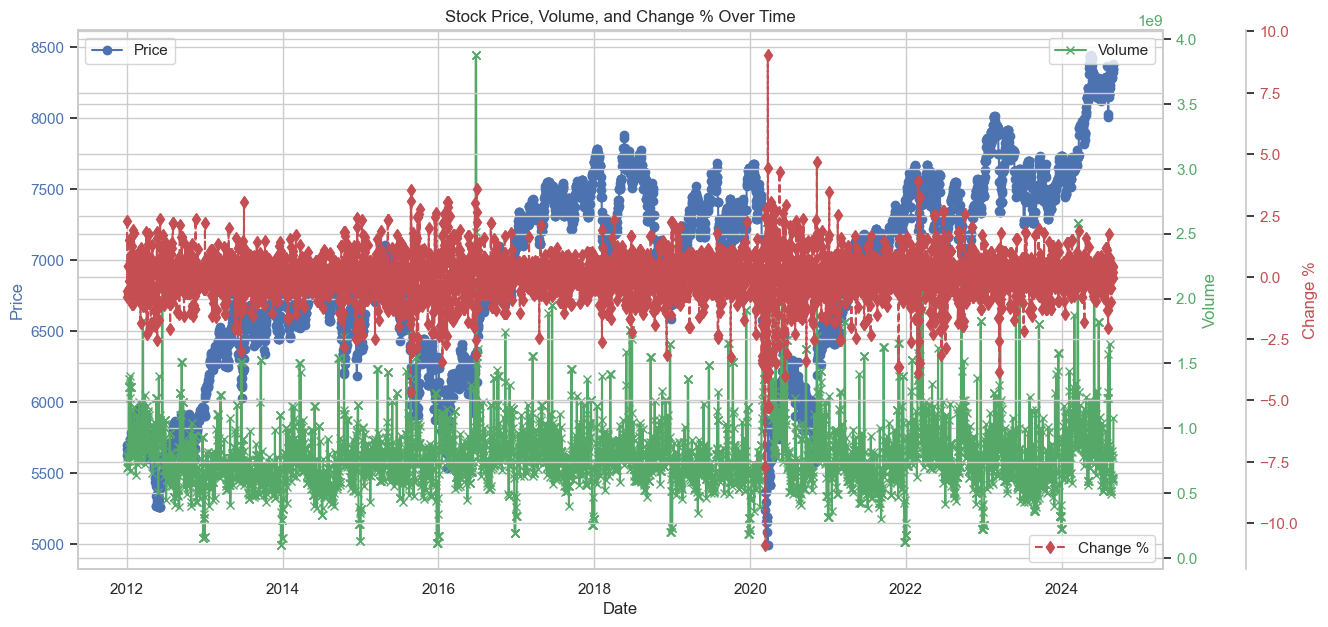

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the seaborn style is applied for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing price
ax1.plot(stocks_df['Date'], stocks_df['Price'], color='b', marker='o', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a twin axis to plot volume
ax2 = ax1.twinx()
ax2.plot(stocks_df['Date'], stocks_df['Vol.'], color='g', marker='x', label='Volume')
ax2.set_ylabel('Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Create another twin axis to plot percentage change
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
ax3.plot(stocks_df['Date'], stocks_df['Change %'], color='r', marker='d', linestyle='--', label='Change %')
ax3.set_ylabel('Change %', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Stock Price, Volume, and Change % Over Time')

# Show legends for each axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Show grid for better readability
ax1.grid(True)

# Display the plot
plt.show()


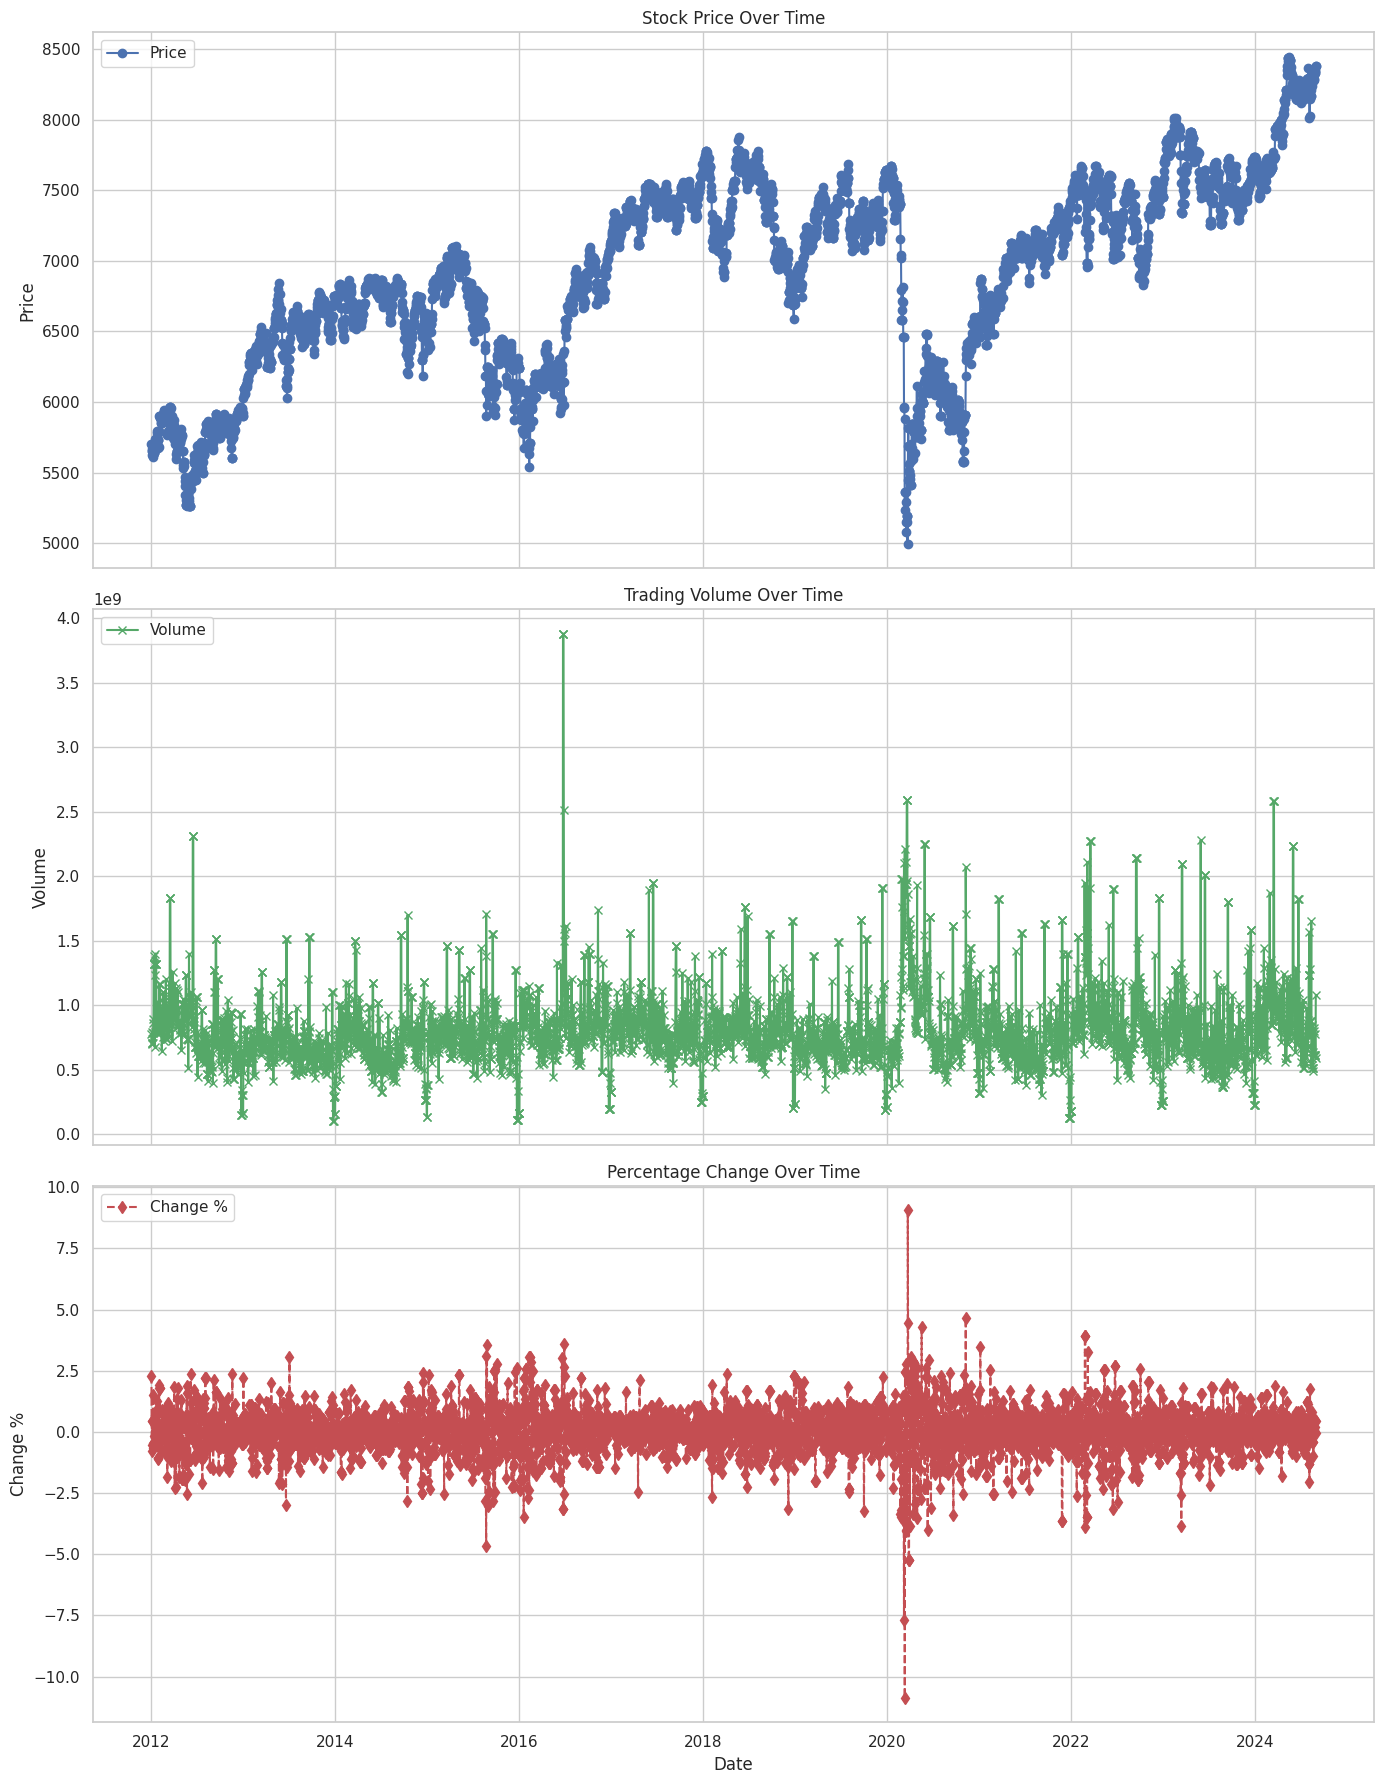

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with 3 subplots, arranged vertically
fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot the Price
axs[0].plot(stocks_df['Date'], stocks_df['Price'], color='b', marker='o', linestyle='-', label='Price')
axs[0].set_ylabel('Price')
axs[0].set_title('Stock Price Over Time')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# Plot the Volume
axs[1].plot(stocks_df['Date'], stocks_df['Vol.'], color='g', marker='x', linestyle='-', label='Volume')
axs[1].set_ylabel('Volume')
axs[1].set_title('Trading Volume Over Time')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Plot the Change %
axs[2].plot(stocks_df['Date'], stocks_df['Change %'], color='r', marker='d', linestyle='--', label='Change %')
axs[2].set_ylabel('Change %')
axs[2].set_title('Percentage Change Over Time')
axs[2].legend(loc='upper left')
axs[2].grid(True)

# Set the x-axis label for the bottom plot
axs[2].set_xlabel('Date')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the plots
plt.show()


In [16]:
stocks_grouped_df = stocks_df.groupby('Date').mean().reset_index()
stocks_grouped_df = stocks_grouped_df.rename(columns={'Date':'date'})
stocks_grouped_df

date    Price     Open     High      Low          Vol.  Change %
0    2012-01-03  5699.91  5572.28  5699.91  5572.28  7.785300e+08      2.29
1    2012-01-04  5668.45  5699.91  5719.83  5646.36  6.969400e+08     -0.55
2    2012-01-05  5624.26  5668.45  5689.33  5614.38  7.942800e+08     -0.78
3    2012-01-06  5649.68  5624.26  5682.78  5623.36  7.050200e+08      0.45
4    2012-01-07  5649.68  5624.26  5682.78  5623.36  7.050200e+08      0.45
...         ...      ...      ...      ...      ...           ...       ...
4619 2024-08-26  8327.78  8288.00  8331.90  8288.00  6.145100e+08      0.48
4620 2024-08-27  8345.46  8327.78  8400.43  8327.78  7.723100e+08      0.21
4621 2024-08-28  8343.85  8345.46  8362.74  8322.28  6.085000e+08     -0.02
4622 2024-08-29  8379.64  8343.85  8392.40  8336.58  5.900100e+08      0.43
4623 2024-08-30  8376.63  8379.64  8414.37  8363.74  1.080000e+09     -0.04

[4624 rows x 7 columns]

In [17]:
stocks_grouped_df['Vol.'].max()/1000000, stocks_grouped_df['Vol.'].min()/1000000

(3880.0, 101.67)

In [18]:
stocks_grouped_df['Vol.'] = stocks_grouped_df['Vol.']/1000000

In [19]:
df_clean.columns

Index(['date', 'vader_sentiment', 'textblob_sentiment', 'is_event', 'topic_12',
       'topic_14', 'topic_15', 'topic_4', 'topic_5', 'topic_1', 'topic_8',
       'topic_7', 'topic_10', 'topic_6', 'topic_9', 'topic_3', 'topic_0',
       'CARDINAL_one', 'CARDINAL_two', 'CARDINAL_million', 'CARDINAL_three',
       'CARDINAL_six', 'EVENT_vietnam', 'EVENT_wwii', 'EVENT_super bowl',
       'EVENT_hurricane katrina', 'EVENT_iraq war', 'FAC_guantanamo',
       'FAC_uva', 'FAC_notre dame', 'FAC_north london', 'FAC_nikki haley',
       'GPE_london', 'GPE_russia', 'GPE_america', 'GPE_california',
       'GPE_china', 'LAW_rico', 'LAW_camilla wear', 'LAW_crown new',
       'LAW_superfund', 'LAW_west ham', 'LOC_europe', 'LOC_middle east',
       'LOC_africa', 'LOC_caribbean', 'LOC_asia', 'MONEY_mike penny',
       'MONEY_million dollar', 'MONEY_billion dollar', 'MONEY_thousand dollar',
       'MONEY_every penny', 'NORP_american', 'NORP_republican',
       'NORP_democrat', 'NORP_russian', 'NORP_musli

In [20]:
# Convert 'Date' and 'date' to datetime
stocks_grouped_df['date'] = pd.to_datetime(stocks_grouped_df['date'], format='%d/%m/%Y')
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%d/%m/%Y')

# Combine Stocks Data & News Data

In [21]:
# Merge DataFrames on the date column
merged_df = pd.merge(stocks_grouped_df, df_clean, on='date', how='left')
merged_df

date    Price     Open     High      Low     Vol.  Change %  \
0    2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
1    2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2    2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
3    2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
4    2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...         ...      ...      ...      ...      ...      ...       ...   
4949 2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
4950 2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
4951 2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
4952 2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
4953 2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

      vader_sentiment  textblob_sentiment  is_event  ...  \
0                 NaN                 NaN       NaN  ...   
1                 NaN                 NaN       NaN  ...   
2                 NaN                 NaN       NaN  ...   
3                 NaN                 NaN       NaN  ...   
4                 NaN                 NaN       NaN  ...   
...               ...                 ...       ...  ...   
4949              NaN                 NaN       NaN  ...   
4950              NaN                 NaN       NaN  ...   
4951              NaN                 NaN       NaN  ...   
4952              NaN                 NaN       NaN  ...   
4953              NaN                 NaN       NaN  ...   

      QUANTITY_thousand mile  QUANTITY_gallon  QUANTITY_hundred mile  \
0                        NaN              NaN                    NaN   
1                        NaN              NaN                    NaN   
2                        NaN              NaN                    NaN   
3                        NaN              NaN                    NaN   
4                        NaN              NaN                    NaN   
...                      ...              ...                    ...   
4949                     NaN              NaN                    NaN   
4950                     NaN              NaN                    NaN   
4951                     NaN              NaN                    NaN   
4952                     NaN              NaN                    NaN   
4953                     NaN              NaN                    NaN   

      QUANTITY_mile  QUANTITY_two mile  TIME_morning  TIME_night  TIME_hour  \
0               NaN                NaN           NaN         NaN        NaN   
1               NaN                NaN           NaN         NaN        NaN   
2               NaN                NaN           NaN         NaN        NaN   
3               NaN                NaN           NaN         NaN        NaN   
4               NaN                NaN           NaN         NaN        NaN   
...             ...                ...           ...         ...        ...   
4949            NaN                NaN           NaN         NaN        NaN   
4950            NaN                NaN           NaN         NaN        NaN   
4951            NaN                NaN           NaN         NaN        NaN   
4952            NaN                NaN           NaN         NaN        NaN   
4953            NaN                NaN           NaN         NaN        NaN   

      TIME_tonight  TIME_evening  
0              NaN           NaN  
1              NaN           NaN  
2              NaN           NaN  
3              NaN           NaN  
4              NaN           NaN  
...            ...           ...  
4949           NaN           NaN  
4950           NaN           NaN  
4951           NaN           NaN  
4952           NaN           NaN  
4953           NaN           NaN  

[4954 rows x 98 columns]

In [22]:
merged_df['date'].max()

Timestamp('2024-08-30 00:00:00')

In [23]:
merged_df.ffill(inplace=True)
merged_df.bfill(inplace=True)
merged_df

date    Price     Open     High      Low     Vol.  Change %  \
0    2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
1    2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2    2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
3    2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
4    2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...         ...      ...      ...      ...      ...      ...       ...   
4949 2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
4950 2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
4951 2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
4952 2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
4953 2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

      vader_sentiment  textblob_sentiment  is_event  ...  \
0              0.9946            0.129496       1.0  ...   
1              0.9946            0.129496       1.0  ...   
2              0.9946            0.129496       1.0  ...   
3              0.9946            0.129496       1.0  ...   
4              0.9946            0.129496       1.0  ...   
...               ...                 ...       ...  ...   
4949          -0.8779            0.005556       1.0  ...   
4950          -0.8779            0.005556       1.0  ...   
4951          -0.8779            0.005556       1.0  ...   
4952          -0.8779            0.005556       1.0  ...   
4953          -0.8779            0.005556       1.0  ...   

      QUANTITY_thousand mile  QUANTITY_gallon  QUANTITY_hundred mile  \
0                        0.0              0.0                    0.0   
1                        0.0              0.0                    0.0   
2                        0.0              0.0                    0.0   
3                        0.0              0.0                    0.0   
4                        0.0              0.0                    0.0   
...                      ...              ...                    ...   
4949                     0.0              0.0                    0.0   
4950                     0.0              0.0                    0.0   
4951                     0.0              0.0                    0.0   
4952                     0.0              0.0                    0.0   
4953                     0.0              0.0                    0.0   

      QUANTITY_mile  QUANTITY_two mile  TIME_morning  TIME_night  TIME_hour  \
0               1.0                0.0           0.0         0.0        0.0   
1               1.0                0.0           0.0         0.0        0.0   
2               1.0                0.0           0.0         0.0        0.0   
3               1.0                0.0           0.0         0.0        0.0   
4               1.0                0.0           0.0         0.0        0.0   
...             ...                ...           ...         ...        ...   
4949            0.0                0.0           0.0         0.0        0.0   
4950            0.0                0.0           0.0         0.0        0.0   
4951            0.0                0.0           0.0         0.0        0.0   
4952            0.0                0.0           0.0         0.0        0.0   
4953            0.0                0.0           0.0         0.0        0.0   

      TIME_tonight  TIME_evening  
0              0.0           1.0  
1              0.0           1.0  
2              0.0           1.0  
3              0.0           1.0  
4              0.0           1.0  
...            ...           ...  
4949           0.0           0.0  
4950           0.0           0.0  
4951           0.0           0.0  
4952           0.0           0.0  
4953           0.0           0.0  

[4954 rows x 98 columns]

In [24]:
merged_df = merged_df.fillna(merged_df.mean(numeric_only=True))
merged_df

date    Price     Open     High      Low     Vol.  Change %  \
0    2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
1    2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2    2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
3    2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
4    2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...         ...      ...      ...      ...      ...      ...       ...   
4949 2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
4950 2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
4951 2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
4952 2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
4953 2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

      vader_sentiment  textblob_sentiment  is_event  ...  \
0              0.9946            0.129496       1.0  ...   
1              0.9946            0.129496       1.0  ...   
2              0.9946            0.129496       1.0  ...   
3              0.9946            0.129496       1.0  ...   
4              0.9946            0.129496       1.0  ...   
...               ...                 ...       ...  ...   
4949          -0.8779            0.005556       1.0  ...   
4950          -0.8779            0.005556       1.0  ...   
4951          -0.8779            0.005556       1.0  ...   
4952          -0.8779            0.005556       1.0  ...   
4953          -0.8779            0.005556       1.0  ...   

      QUANTITY_thousand mile  QUANTITY_gallon  QUANTITY_hundred mile  \
0                        0.0              0.0                    0.0   
1                        0.0              0.0                    0.0   
2                        0.0              0.0                    0.0   
3                        0.0              0.0                    0.0   
4                        0.0              0.0                    0.0   
...                      ...              ...                    ...   
4949                     0.0              0.0                    0.0   
4950                     0.0              0.0                    0.0   
4951                     0.0              0.0                    0.0   
4952                     0.0              0.0                    0.0   
4953                     0.0              0.0                    0.0   

      QUANTITY_mile  QUANTITY_two mile  TIME_morning  TIME_night  TIME_hour  \
0               1.0                0.0           0.0         0.0        0.0   
1               1.0                0.0           0.0         0.0        0.0   
2               1.0                0.0           0.0         0.0        0.0   
3               1.0                0.0           0.0         0.0        0.0   
4               1.0                0.0           0.0         0.0        0.0   
...             ...                ...           ...         ...        ...   
4949            0.0                0.0           0.0         0.0        0.0   
4950            0.0                0.0           0.0         0.0        0.0   
4951            0.0                0.0           0.0         0.0        0.0   
4952            0.0                0.0           0.0         0.0        0.0   
4953            0.0                0.0           0.0         0.0        0.0   

      TIME_tonight  TIME_evening  
0              0.0           1.0  
1              0.0           1.0  
2              0.0           1.0  
3              0.0           1.0  
4              0.0           1.0  
...            ...           ...  
4949           0.0           0.0  
4950           0.0           0.0  
4951           0.0           0.0  
4952           0.0           0.0  
4953           0.0           0.0  

[4954 rows x 98 columns]

In [25]:
# merged_df_org = merged_df.copy()

# ACF & PCF

Processing column: Price


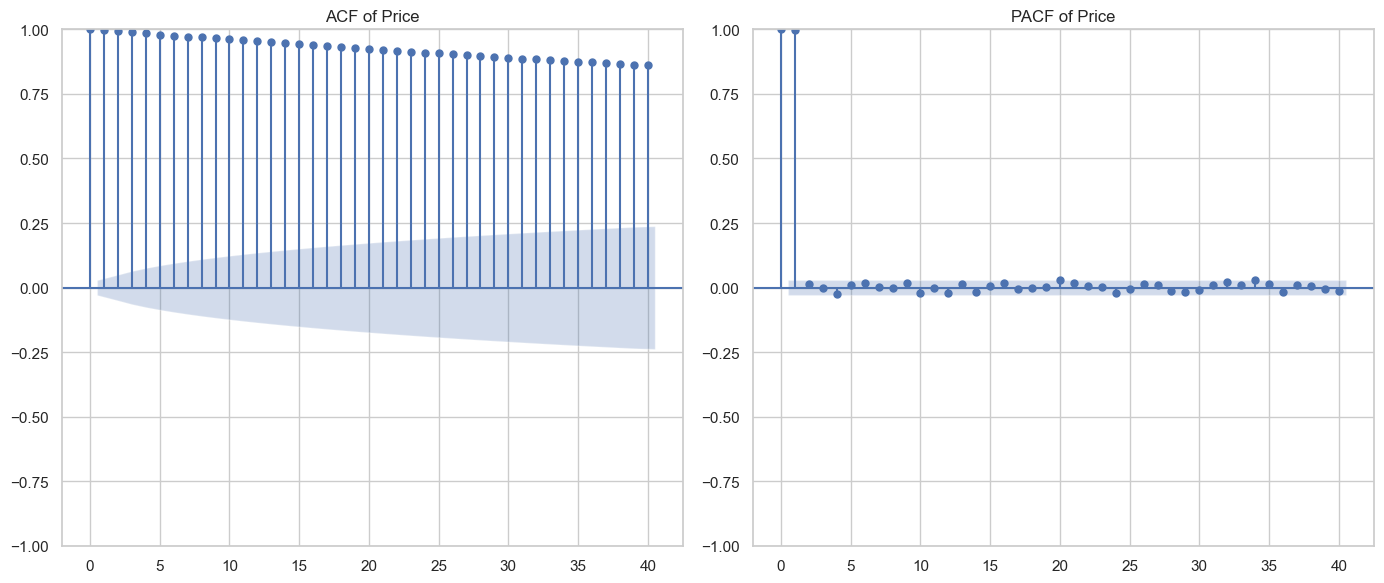

Processing column: Open


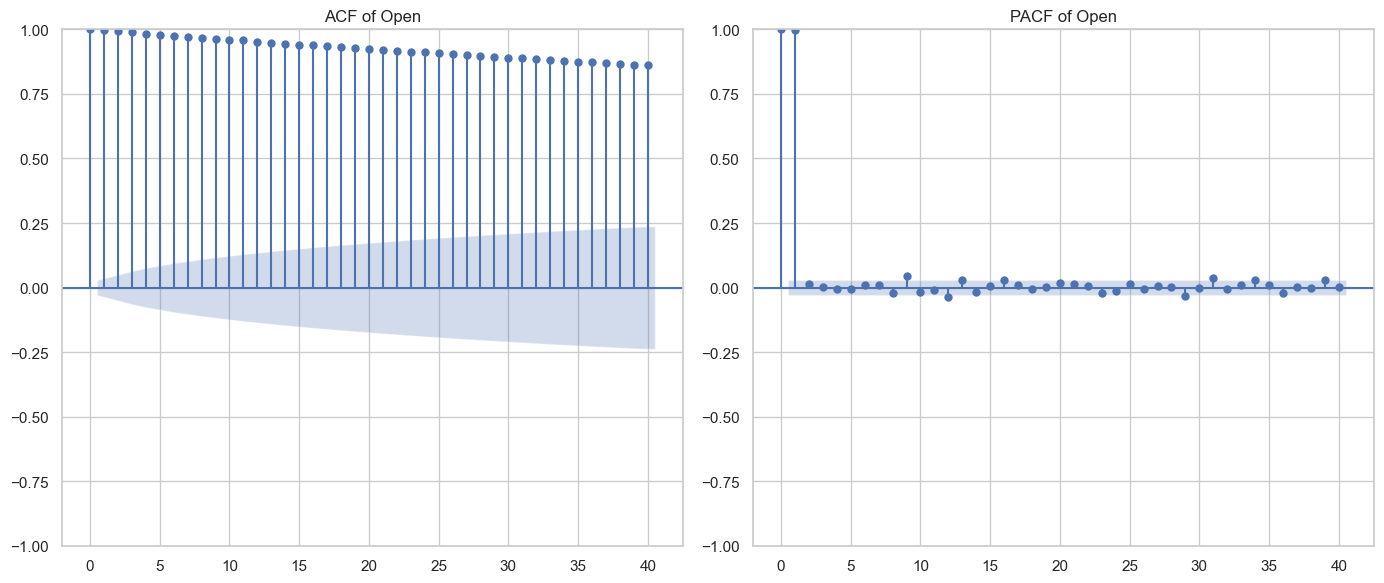

Processing column: High


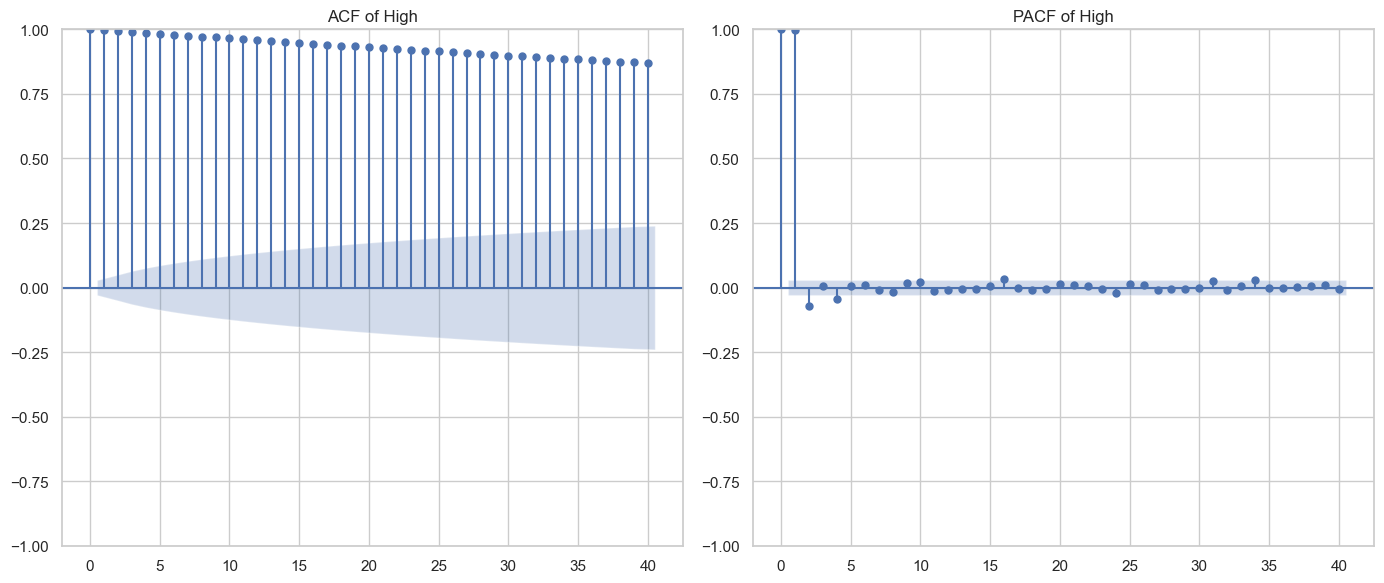

Processing column: Low


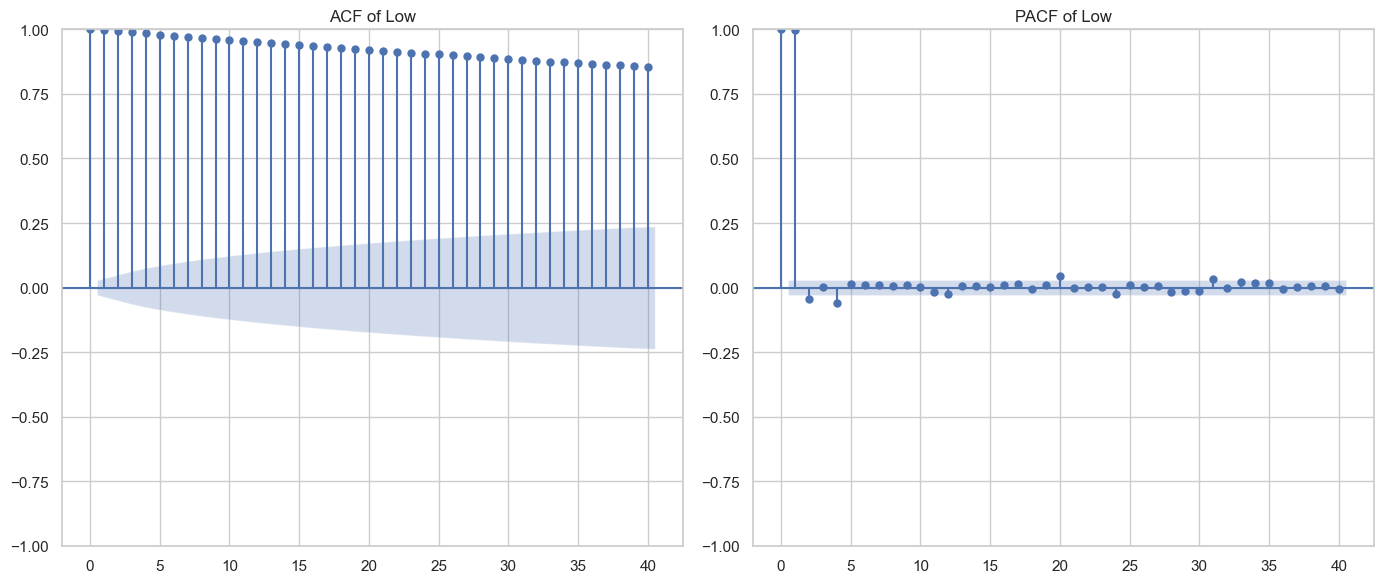

Processing column: Vol.


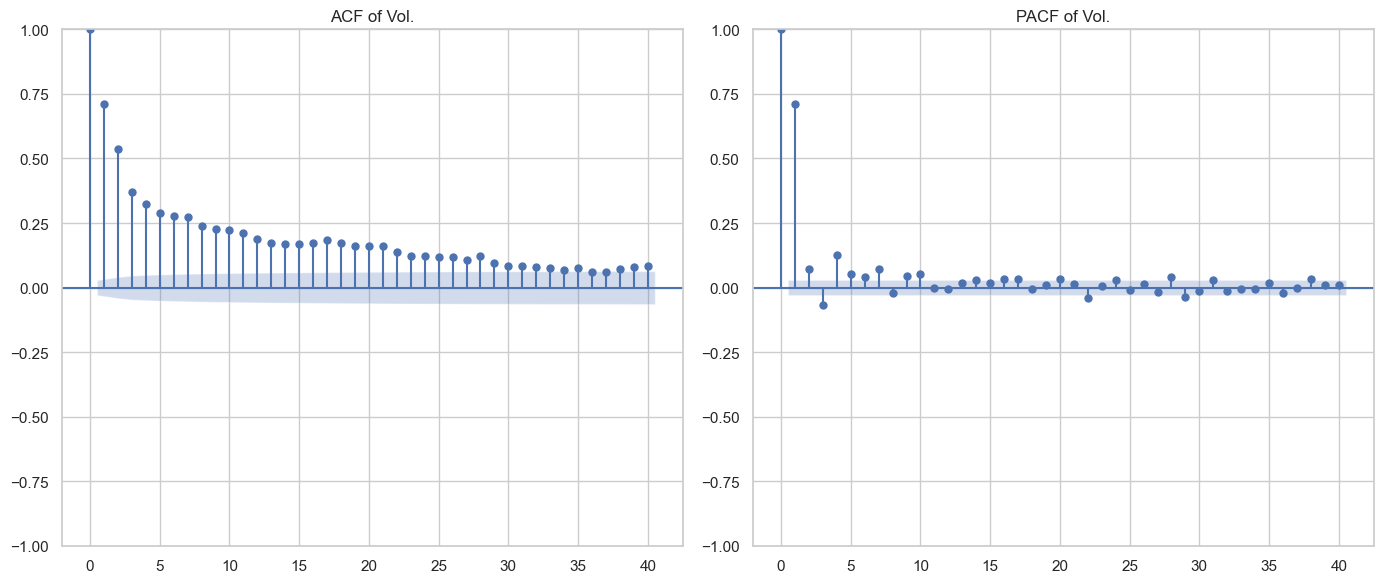

Processing column: Change %


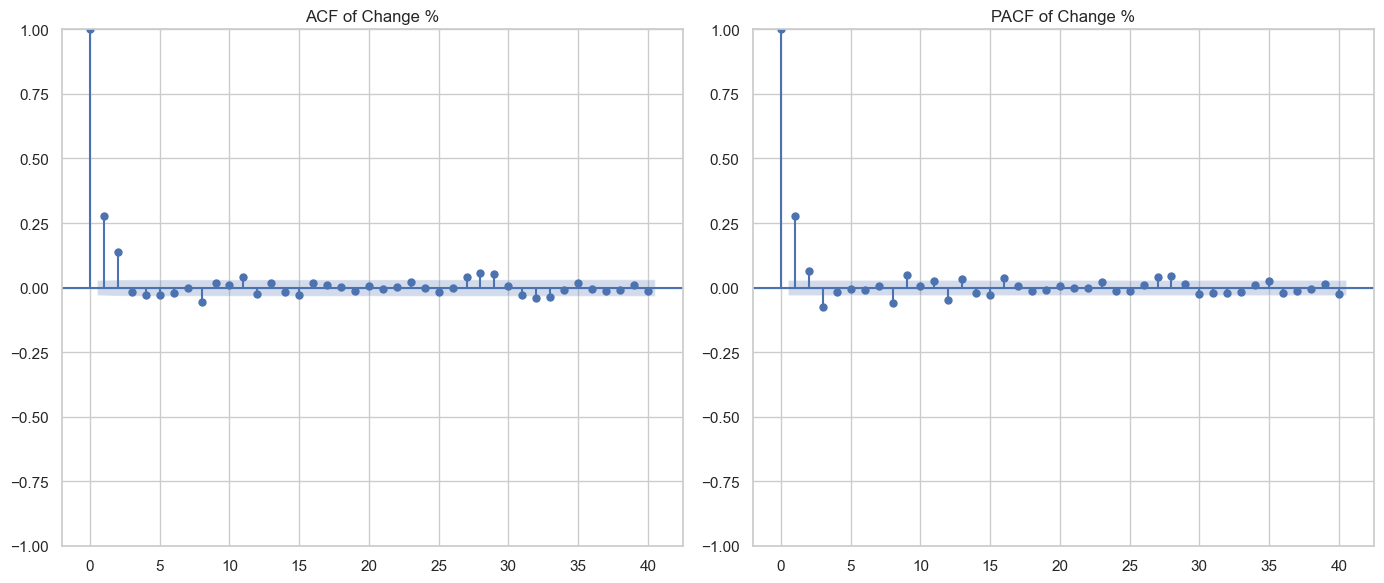

Processing column: vader_sentiment


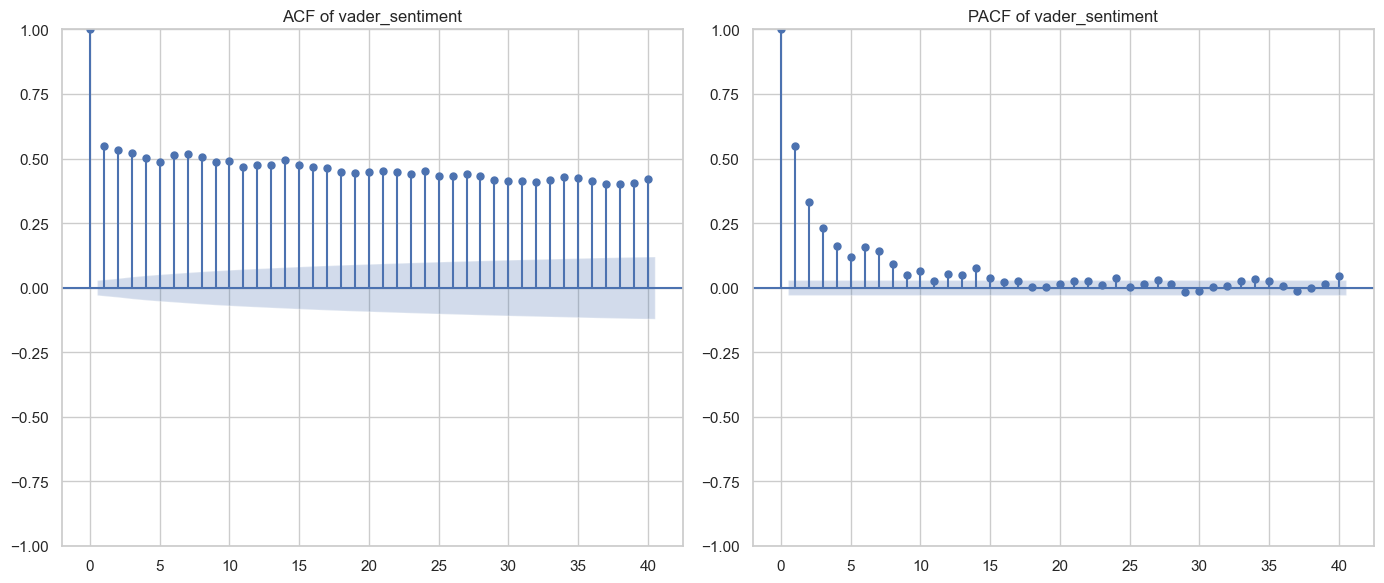

Processing column: textblob_sentiment


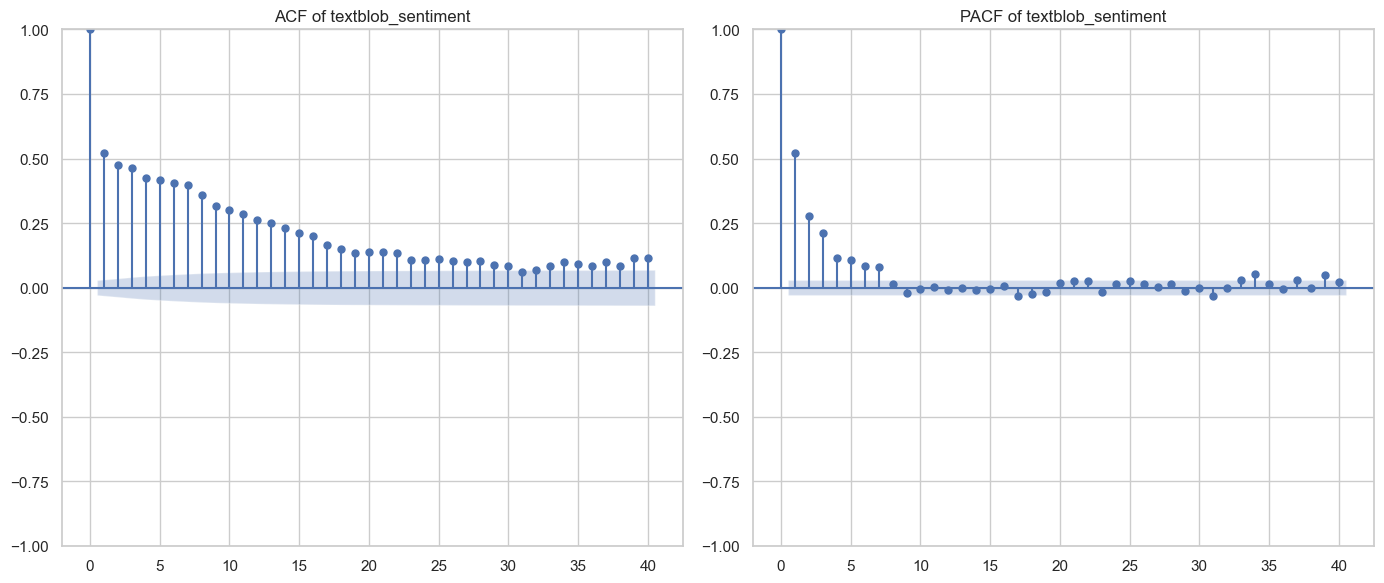

Processing column: is_event


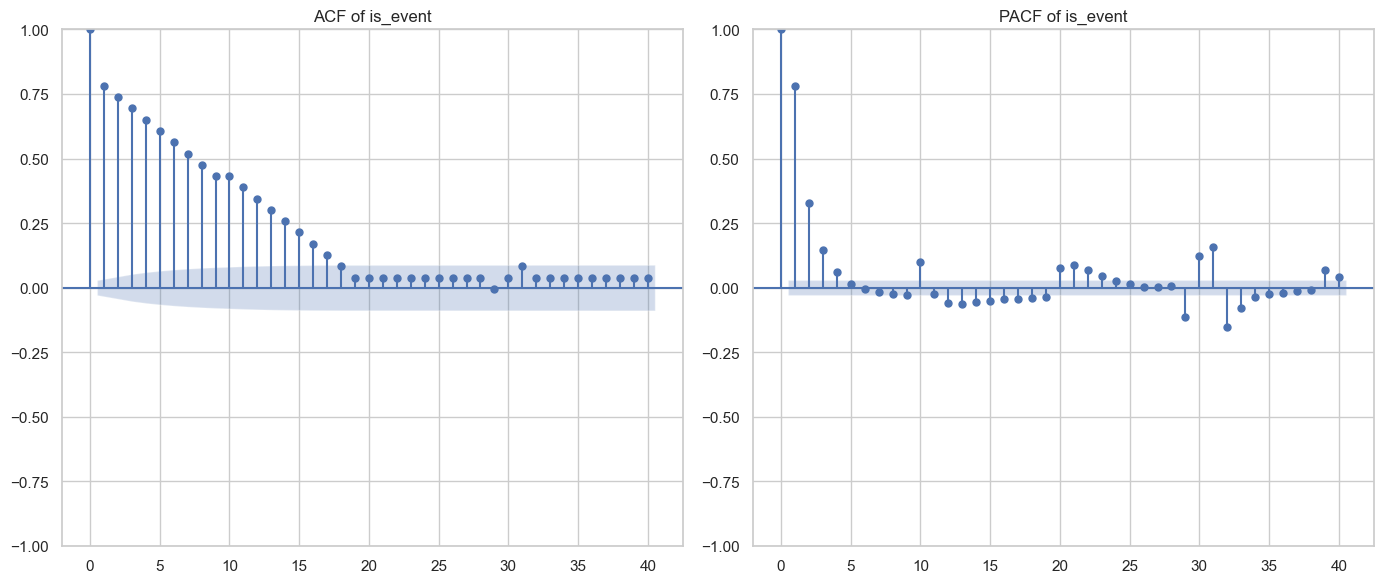

Processing column: topic_12


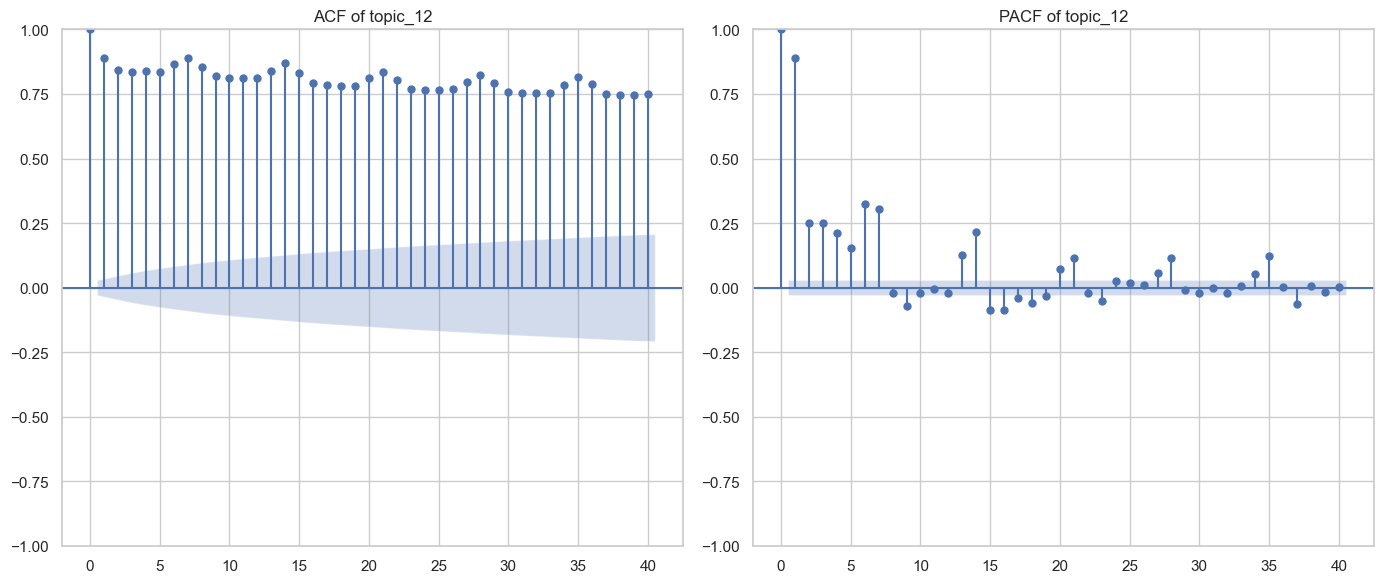

Processing column: topic_14


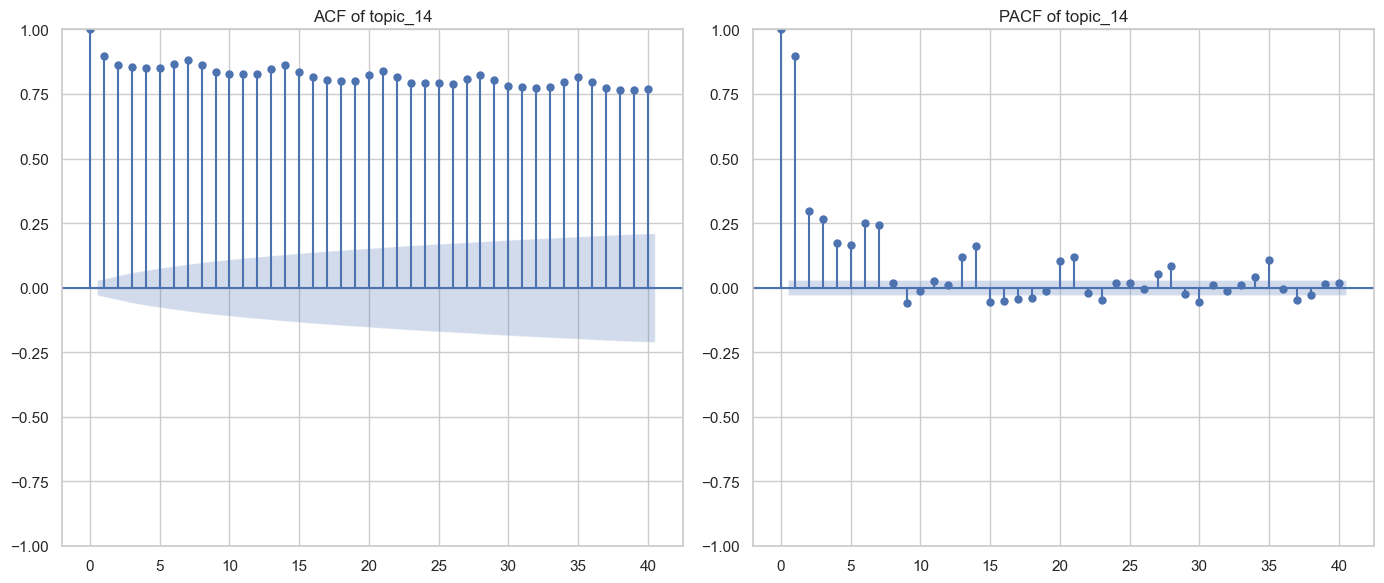

Processing column: topic_15


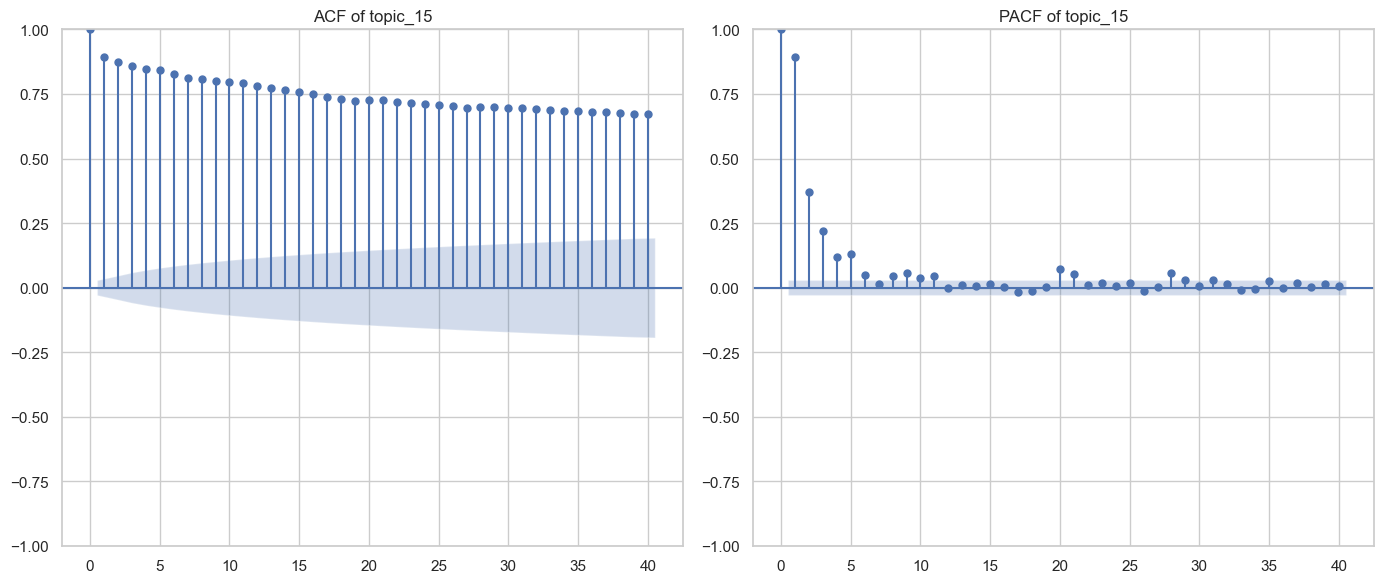

Processing column: topic_4


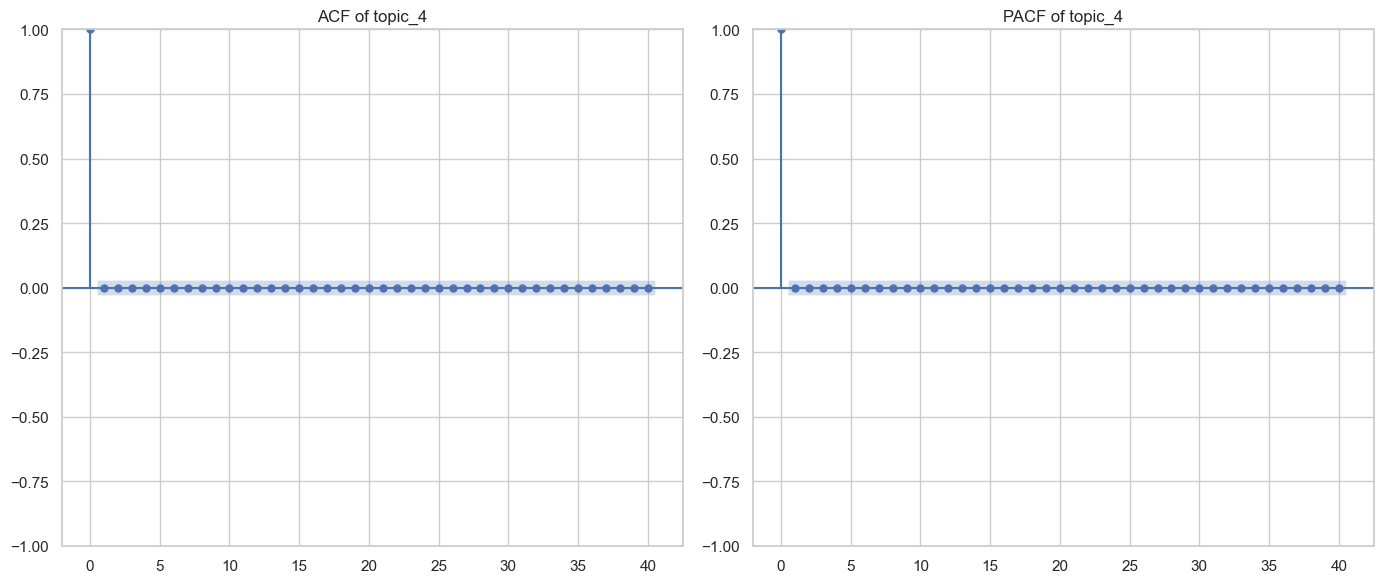

Processing column: topic_5


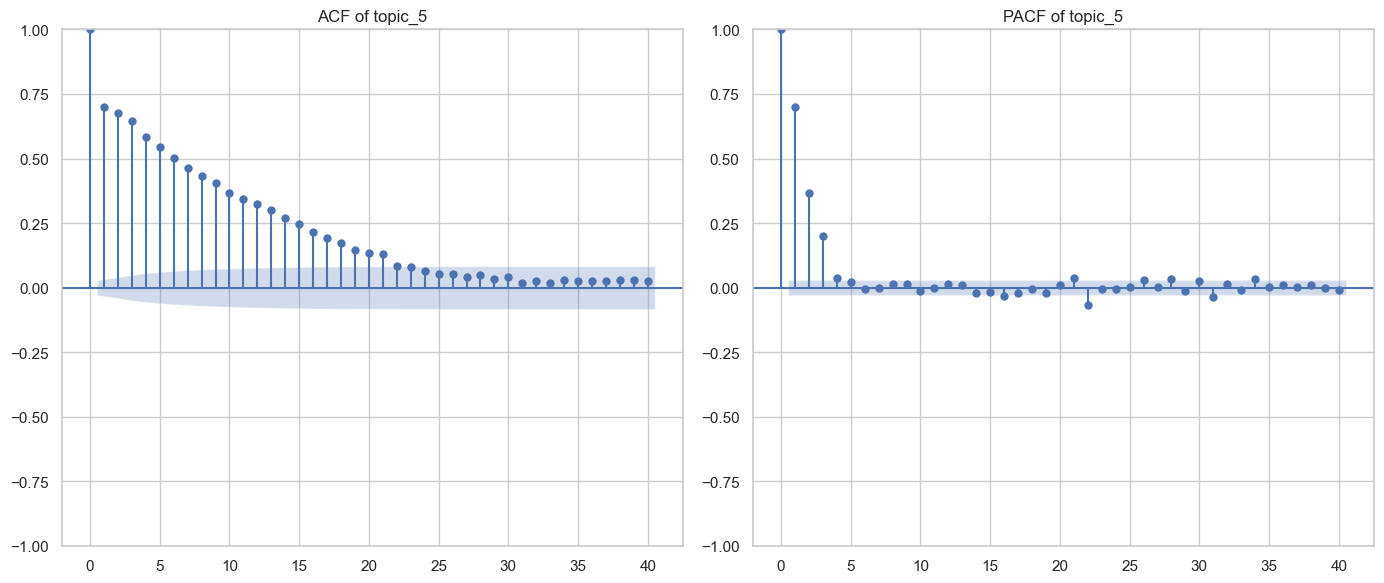

Processing column: topic_1


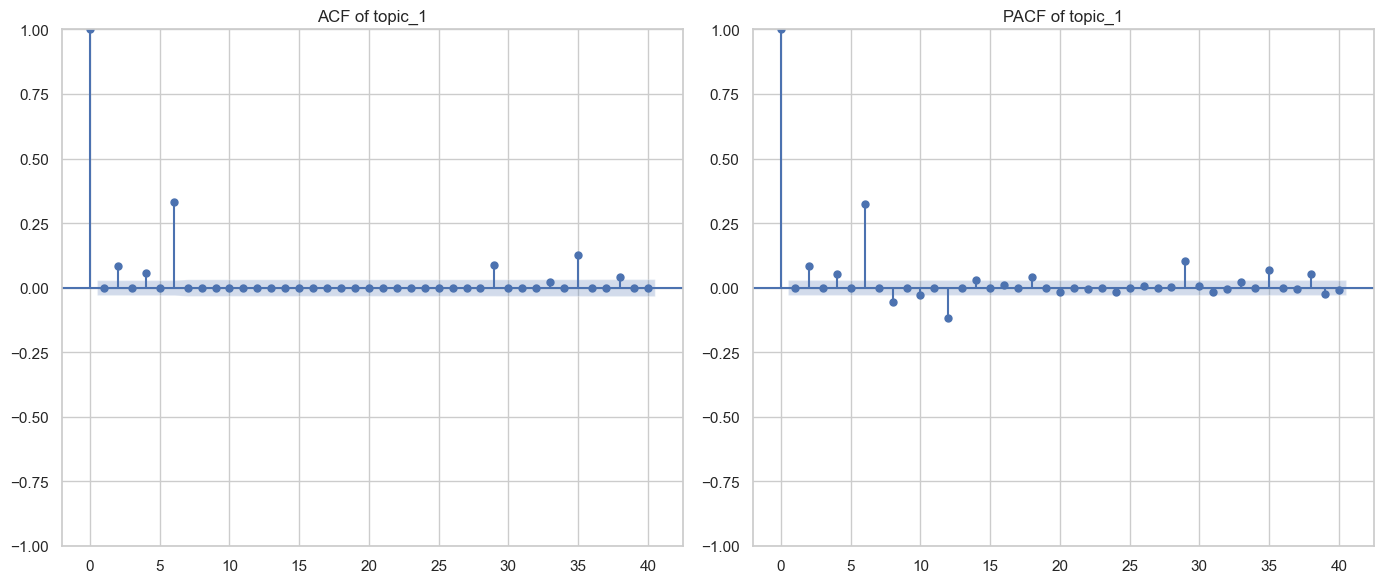

Processing column: topic_8


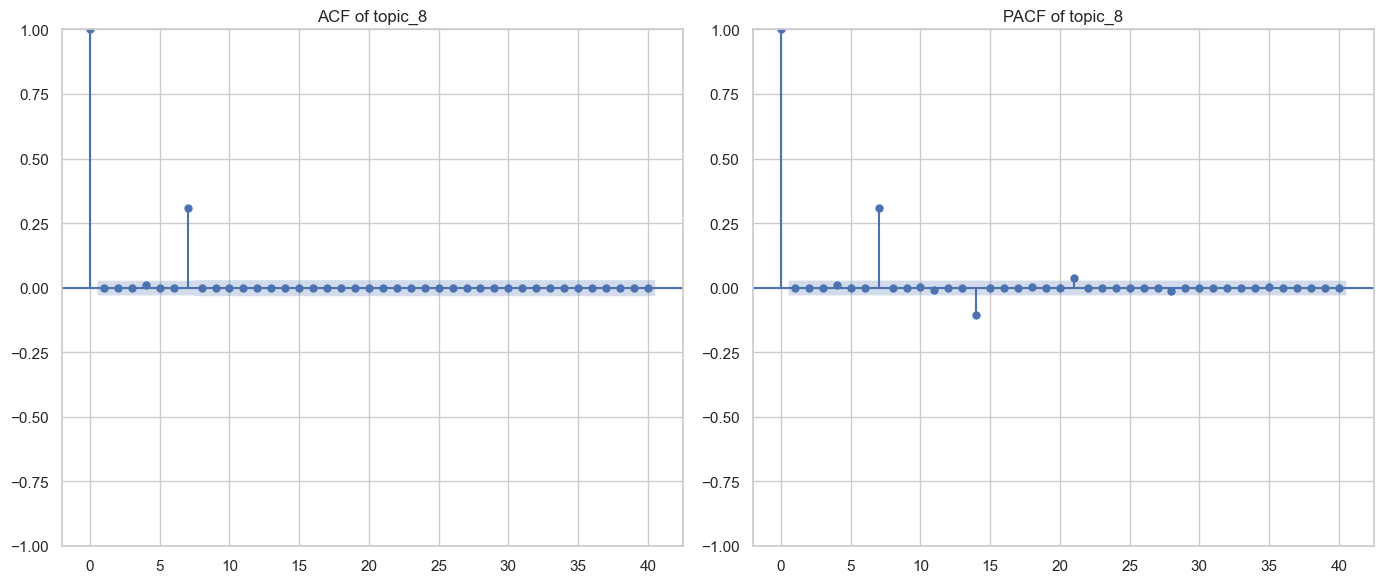

Processing column: topic_7


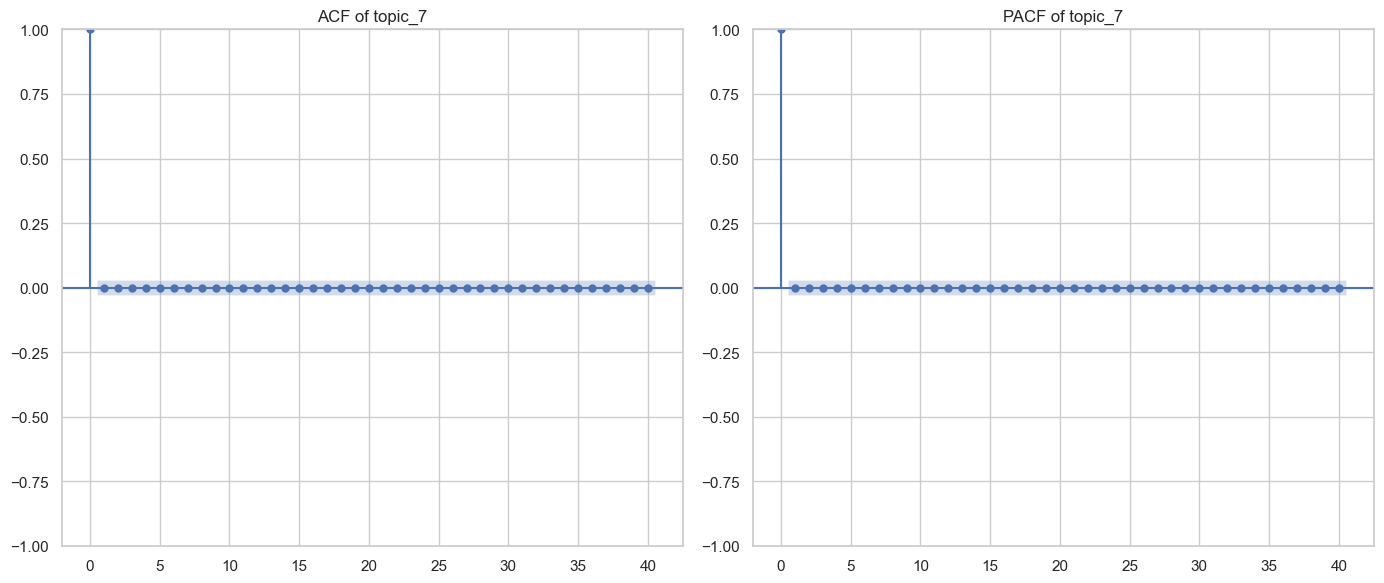

Processing column: topic_10


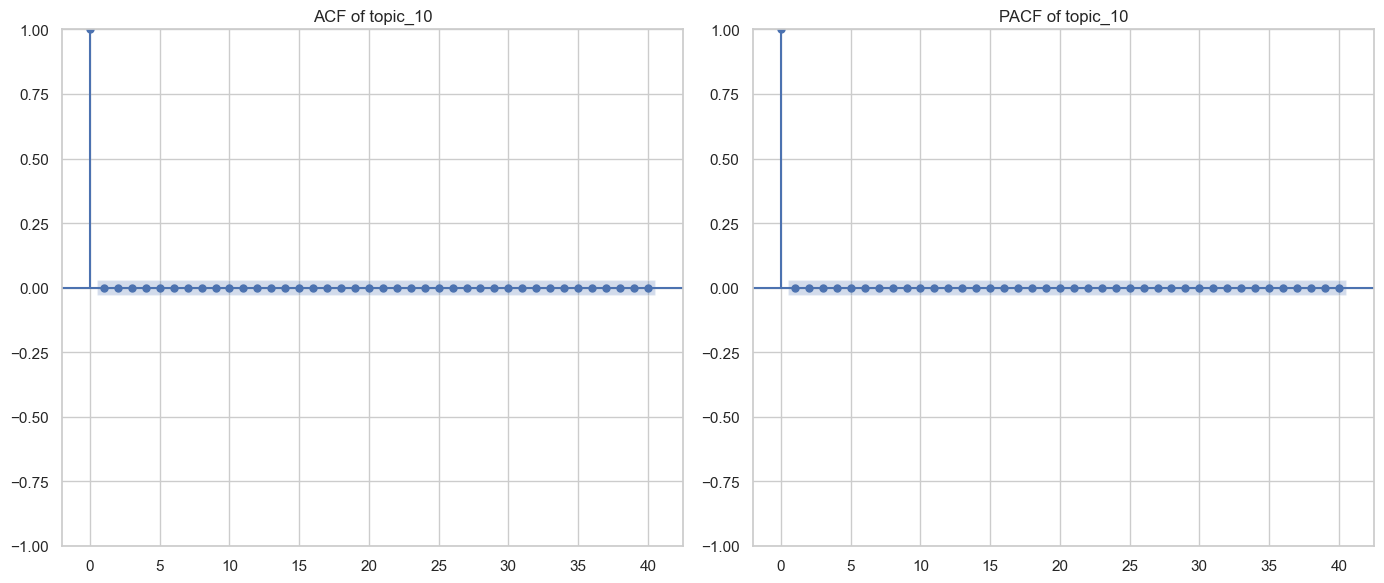

Processing column: topic_6


C:\Users\PRAGYA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


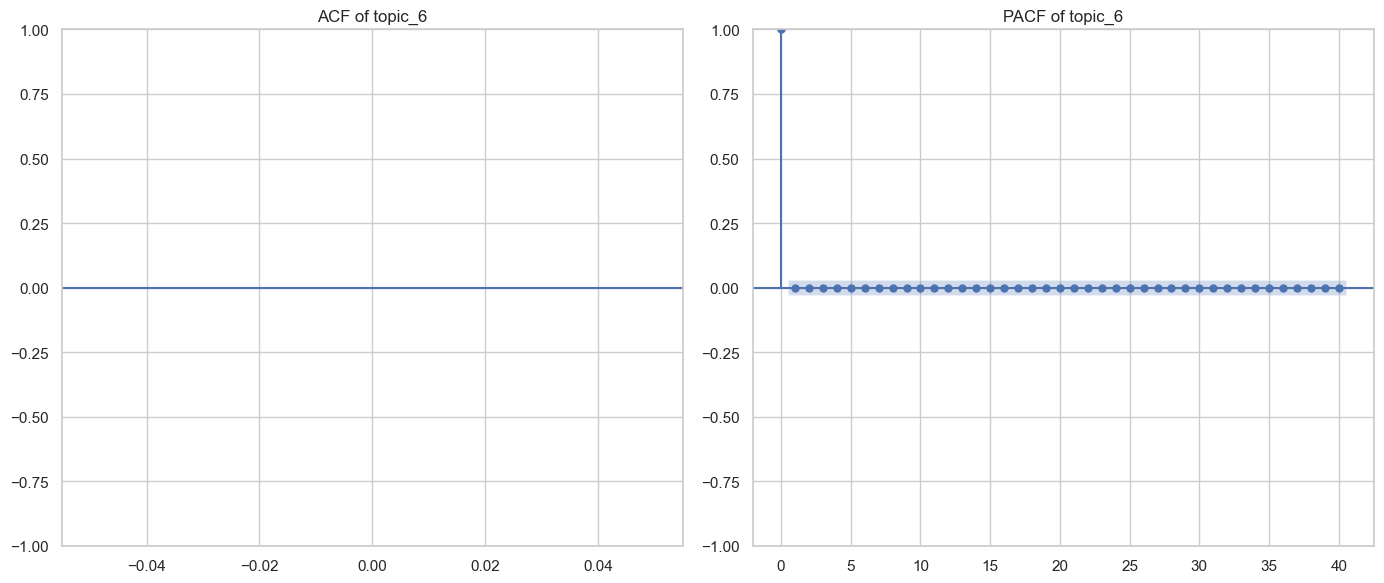

Processing column: topic_9


C:\Users\PRAGYA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


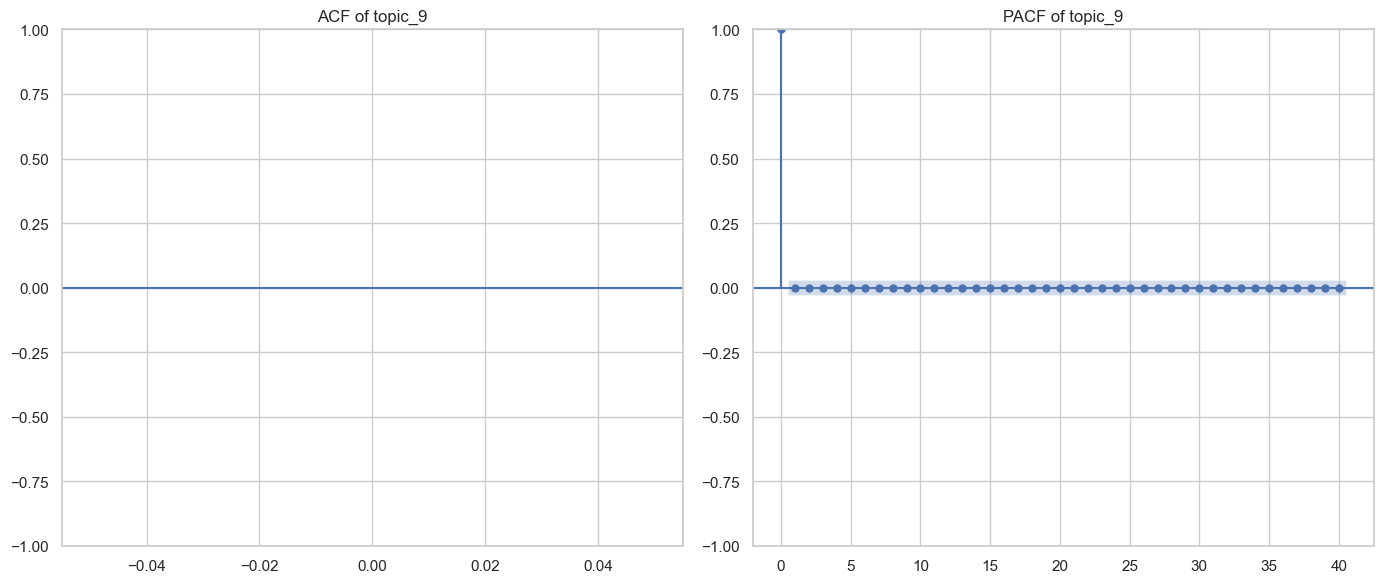

Processing column: topic_3


C:\Users\PRAGYA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


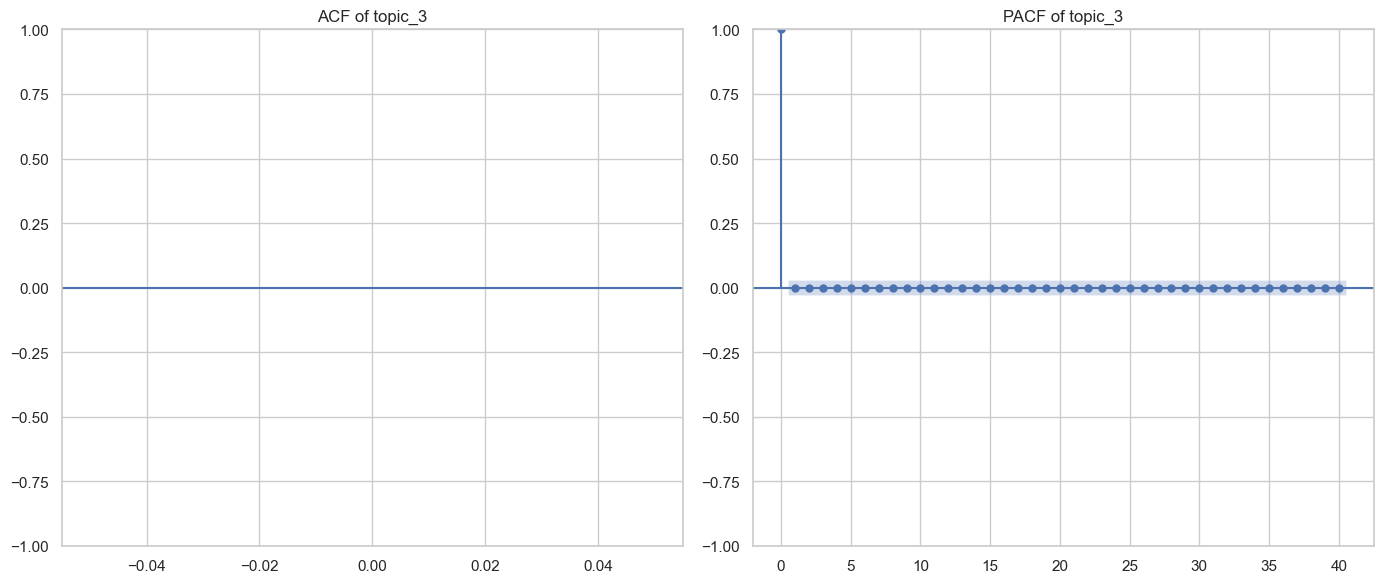

Processing column: topic_0


C:\Users\PRAGYA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


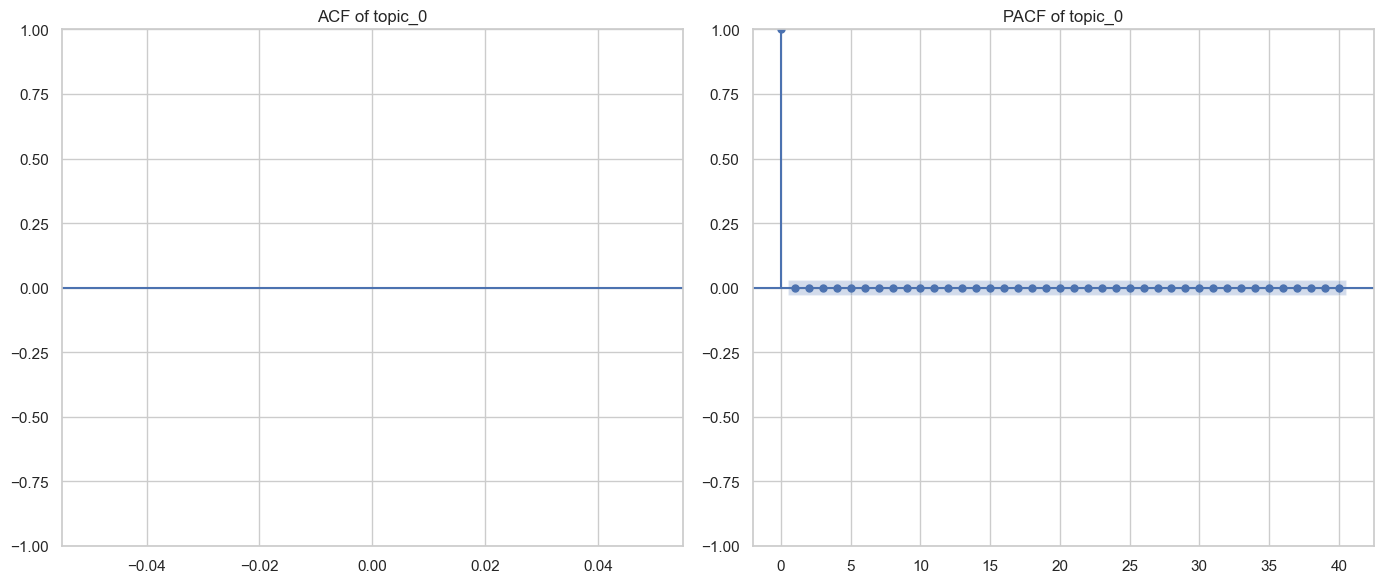

Processing column: CARDINAL_one


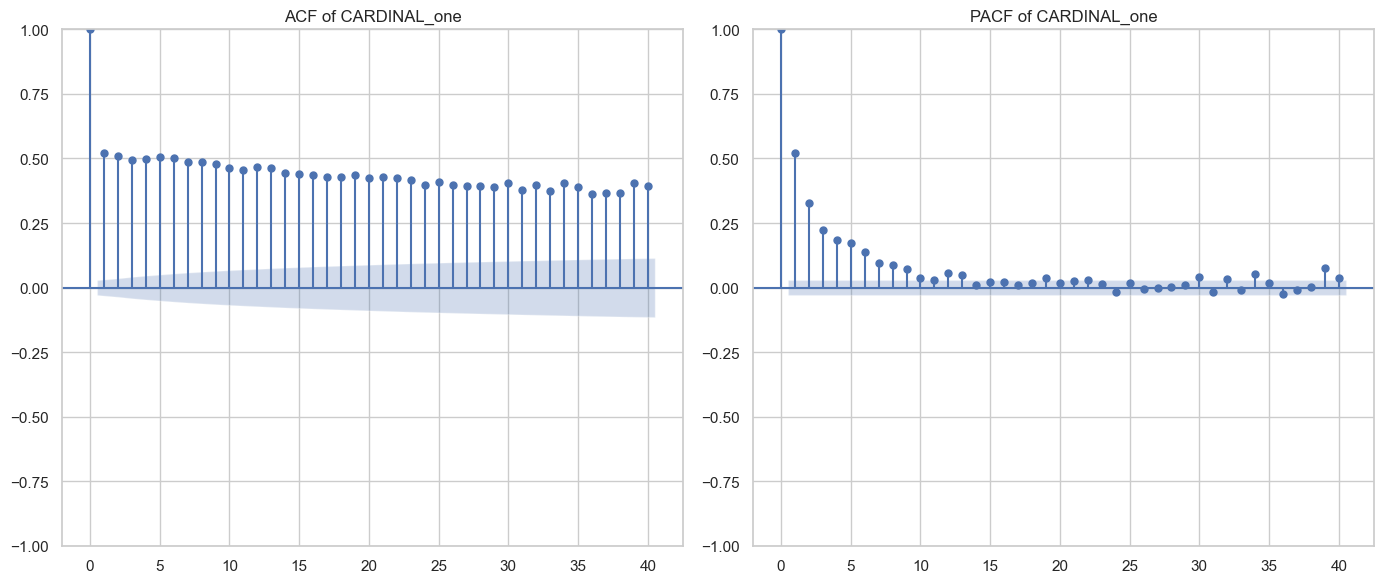

Processing column: CARDINAL_two


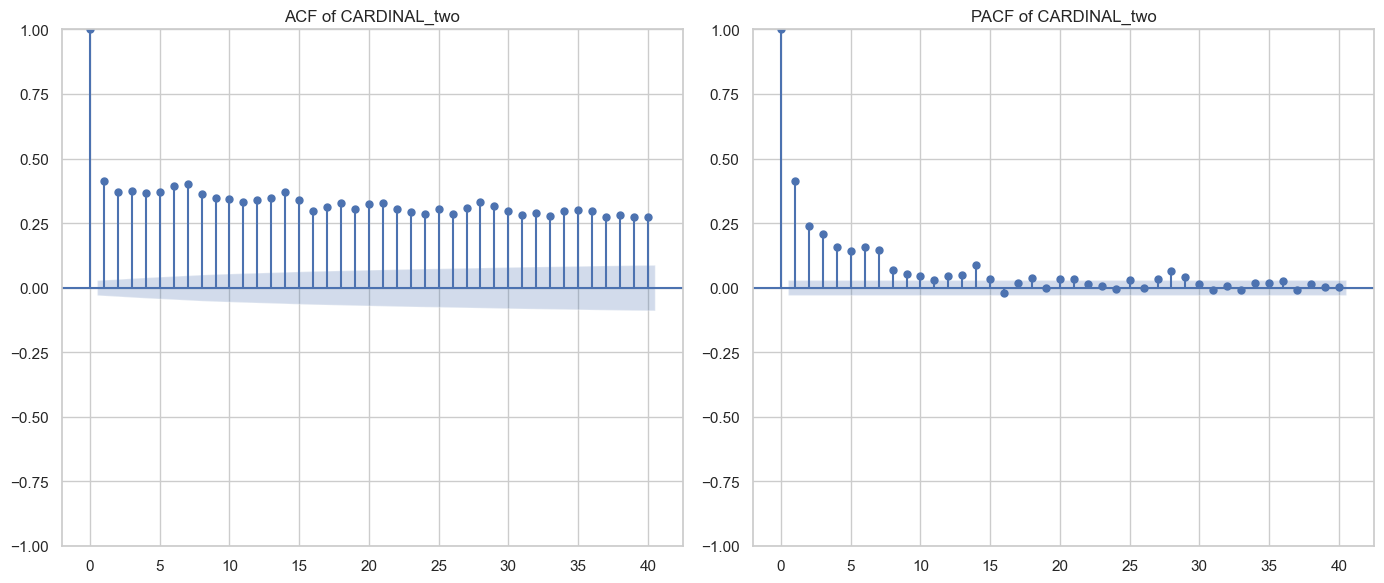

Processing column: CARDINAL_million


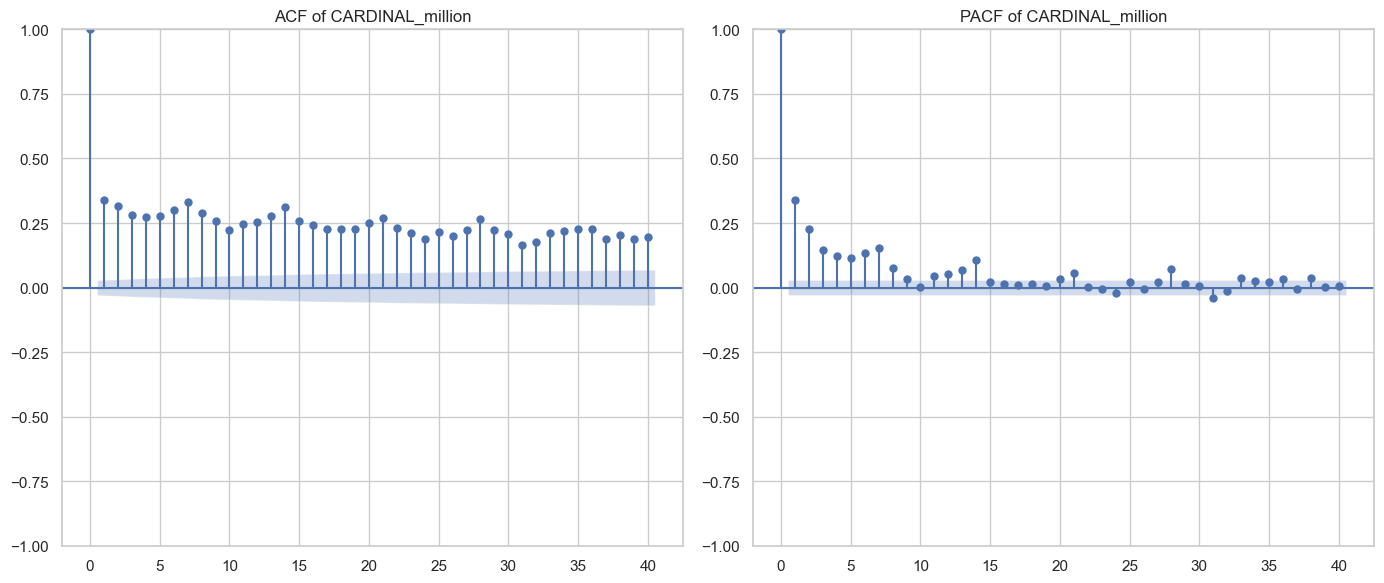

Processing column: CARDINAL_three


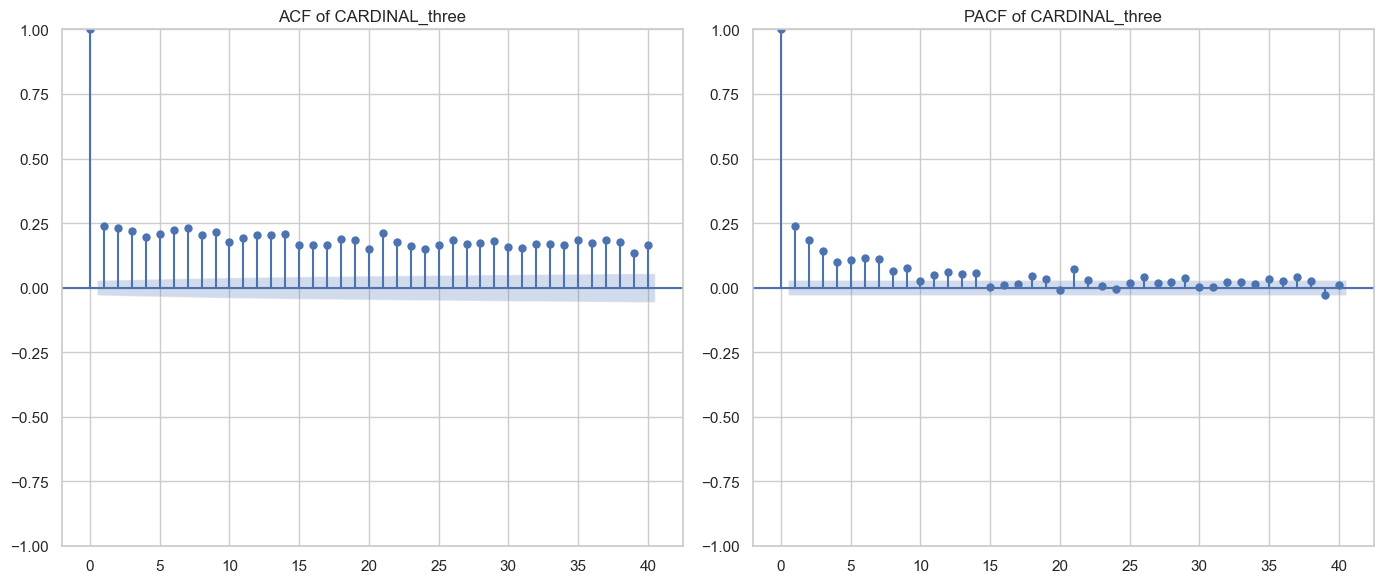

Processing column: CARDINAL_six


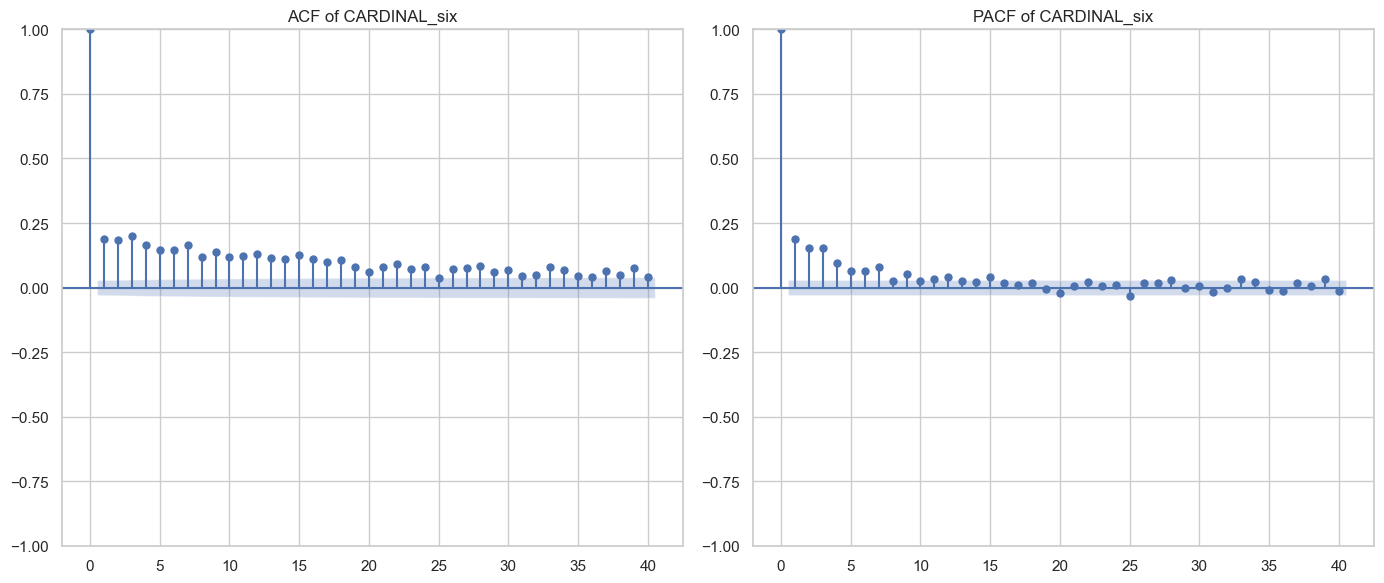

Processing column: EVENT_vietnam


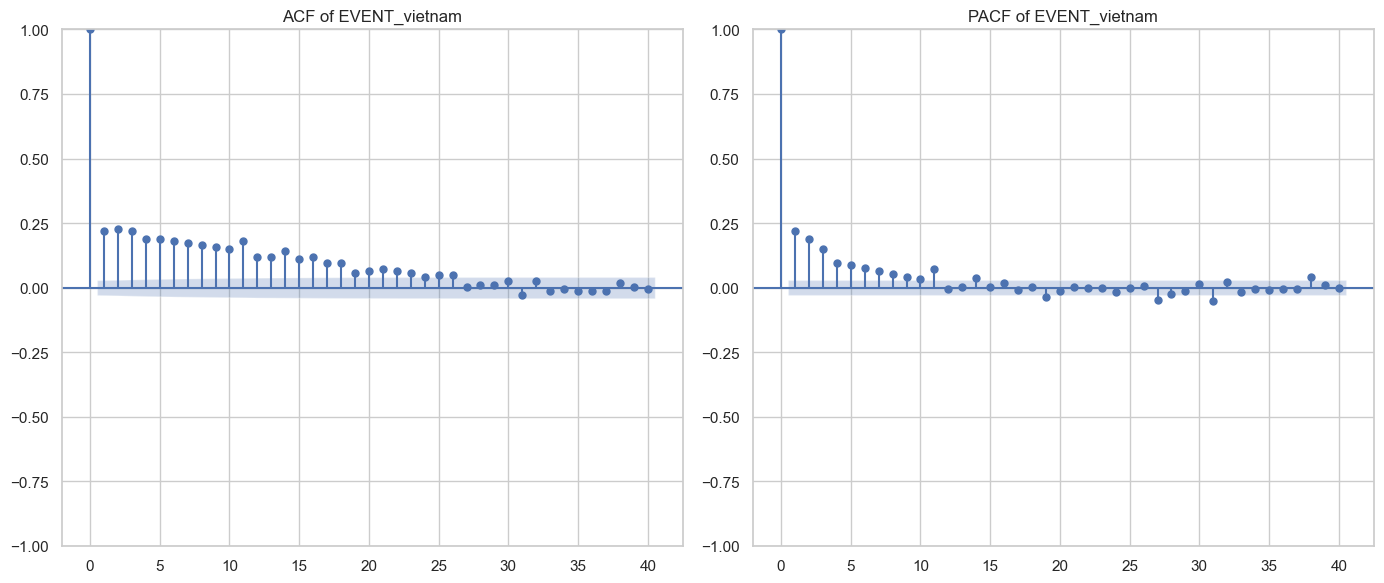

Processing column: EVENT_wwii


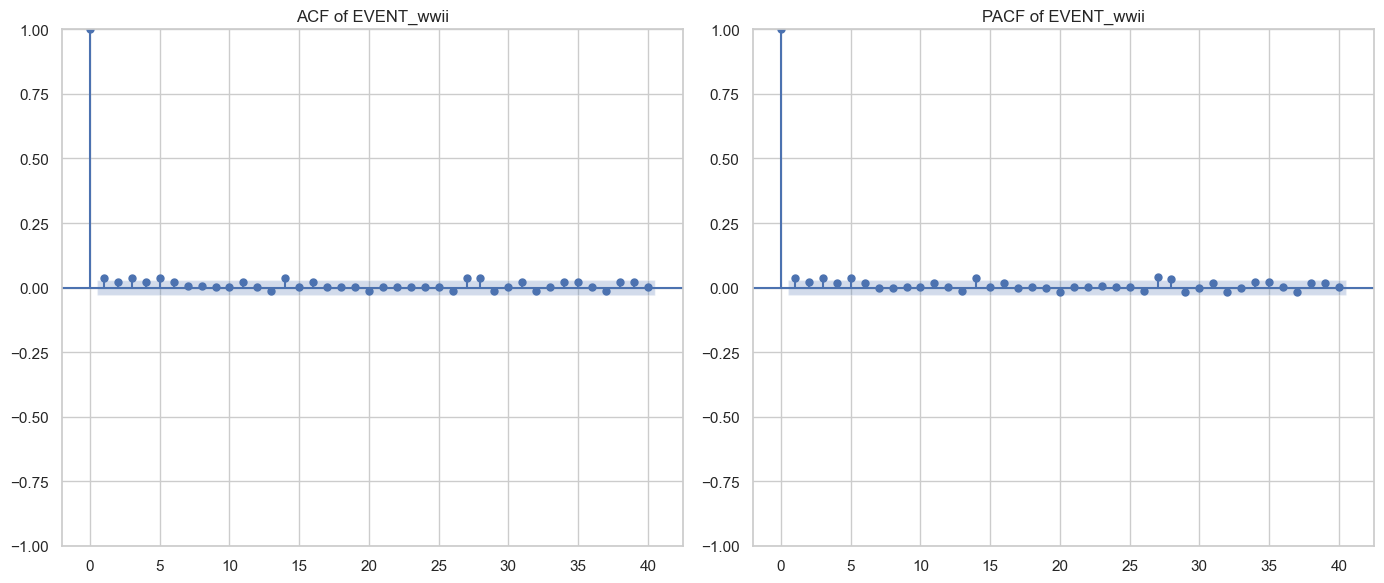

Processing column: EVENT_super bowl


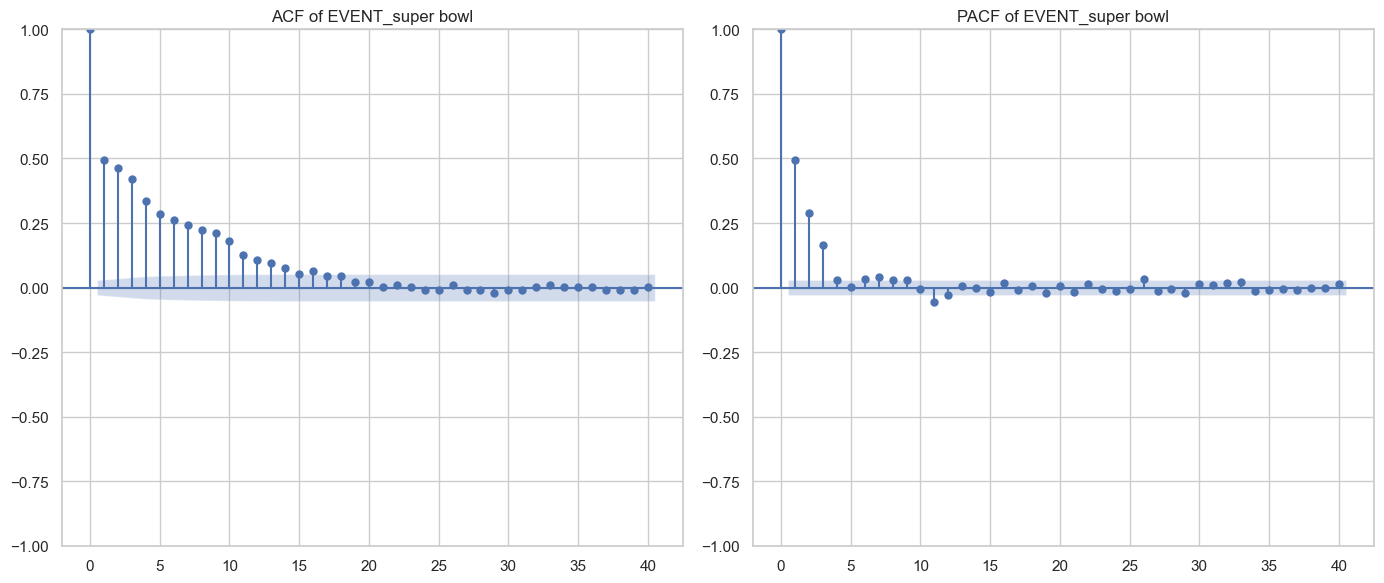

Processing column: EVENT_hurricane katrina


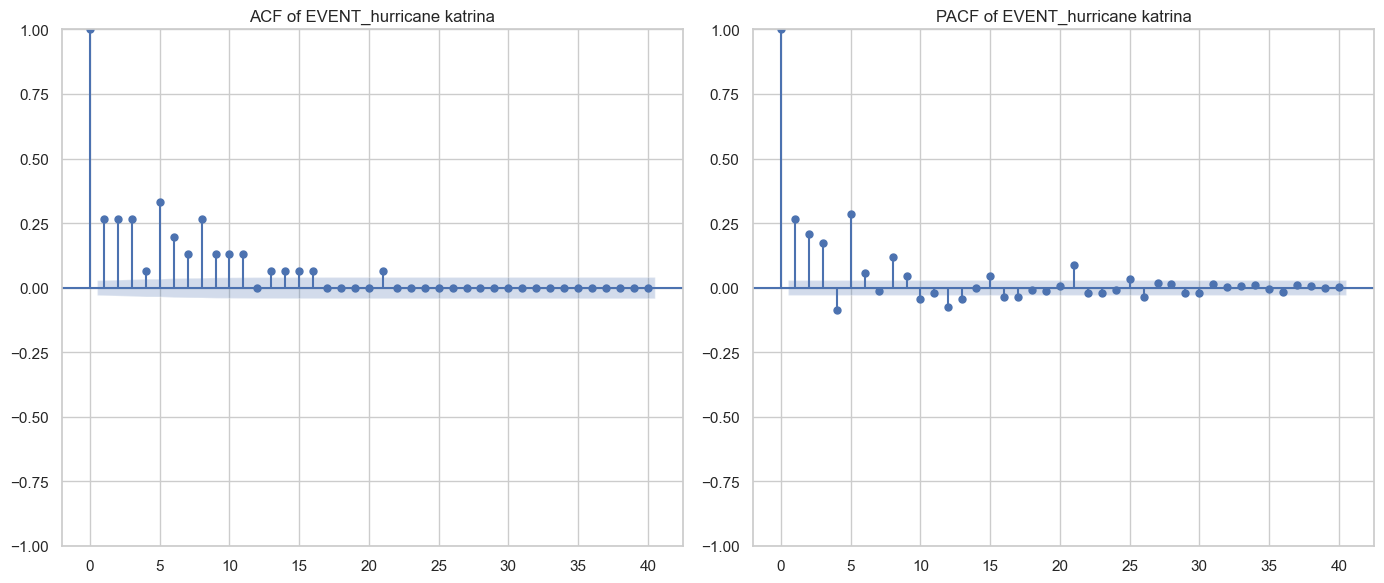

Processing column: EVENT_iraq war


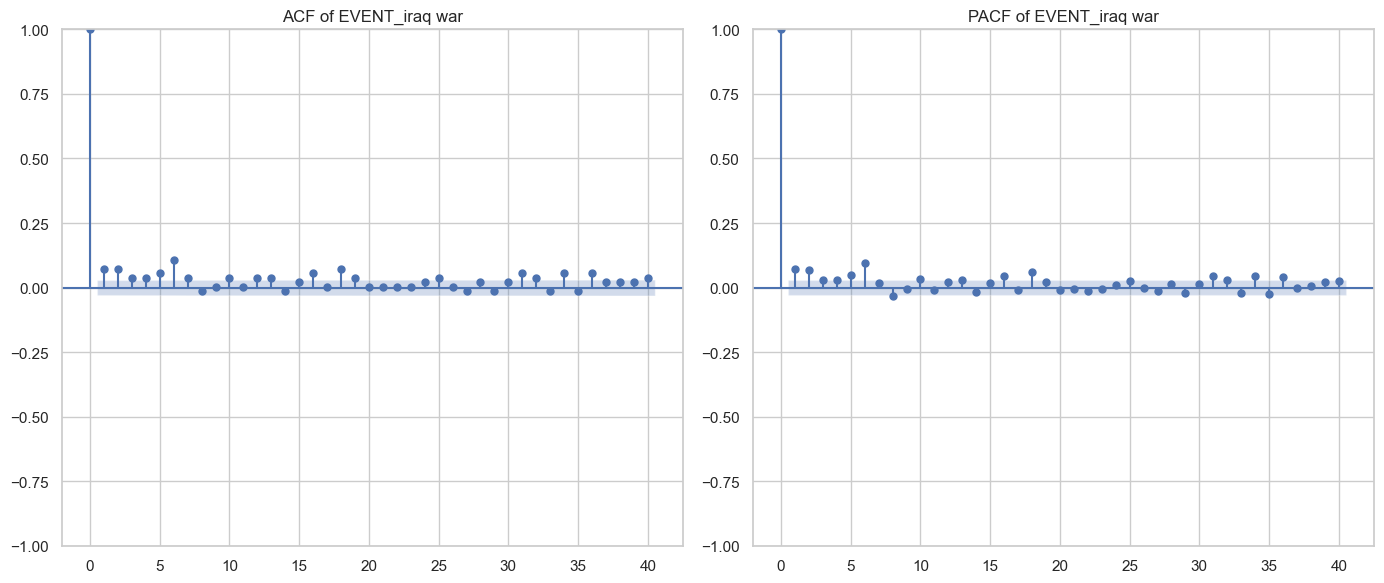

Processing column: FAC_guantanamo


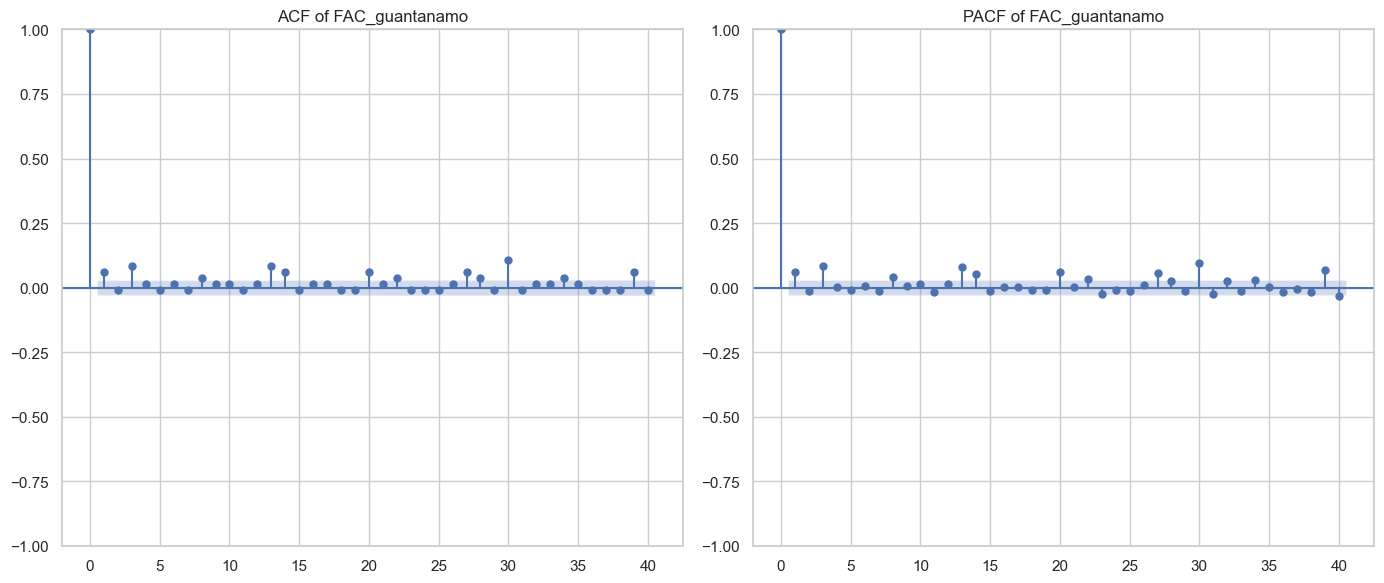

Processing column: FAC_uva


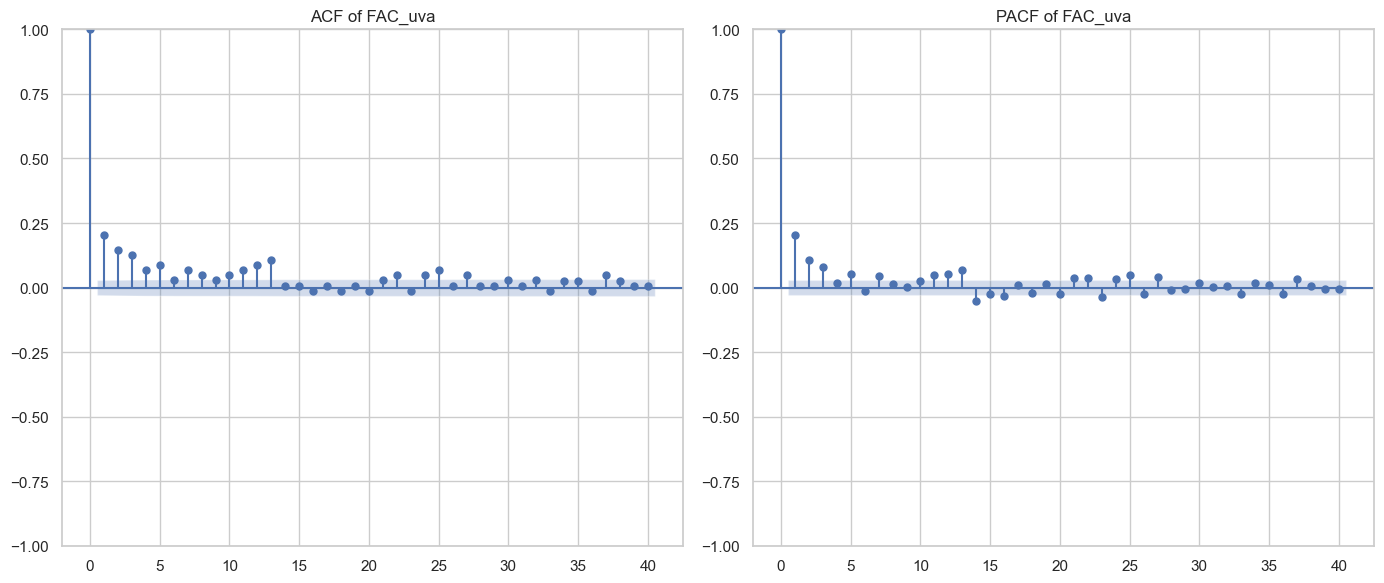

Processing column: FAC_notre dame


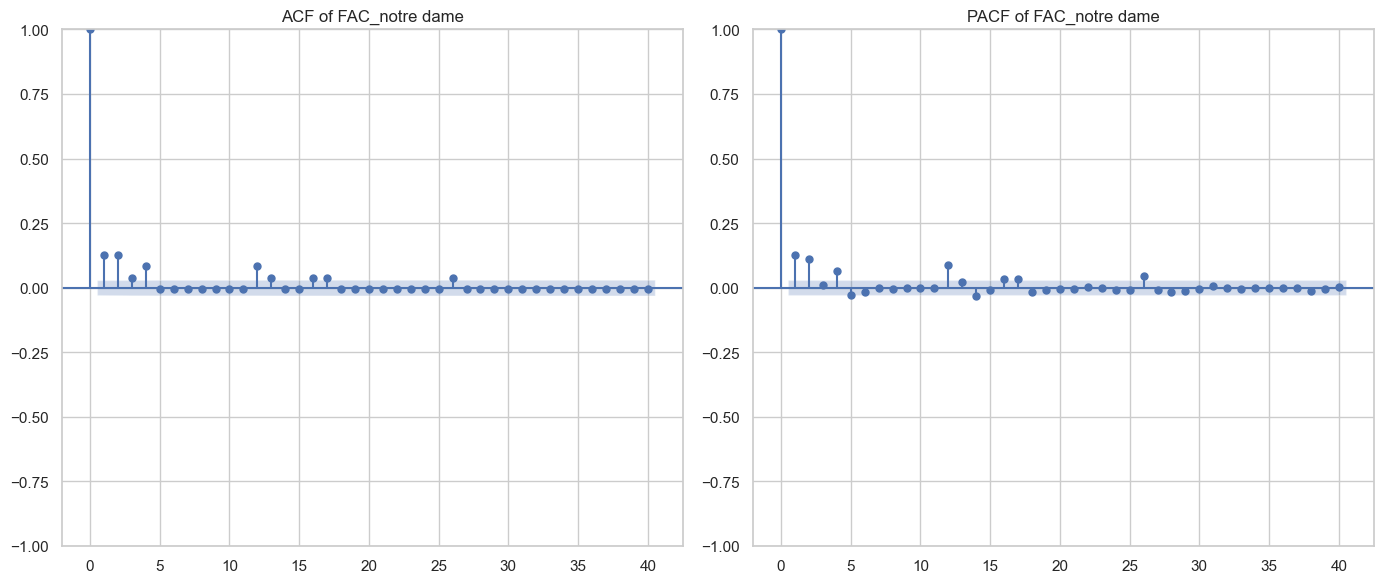

Processing column: FAC_north london


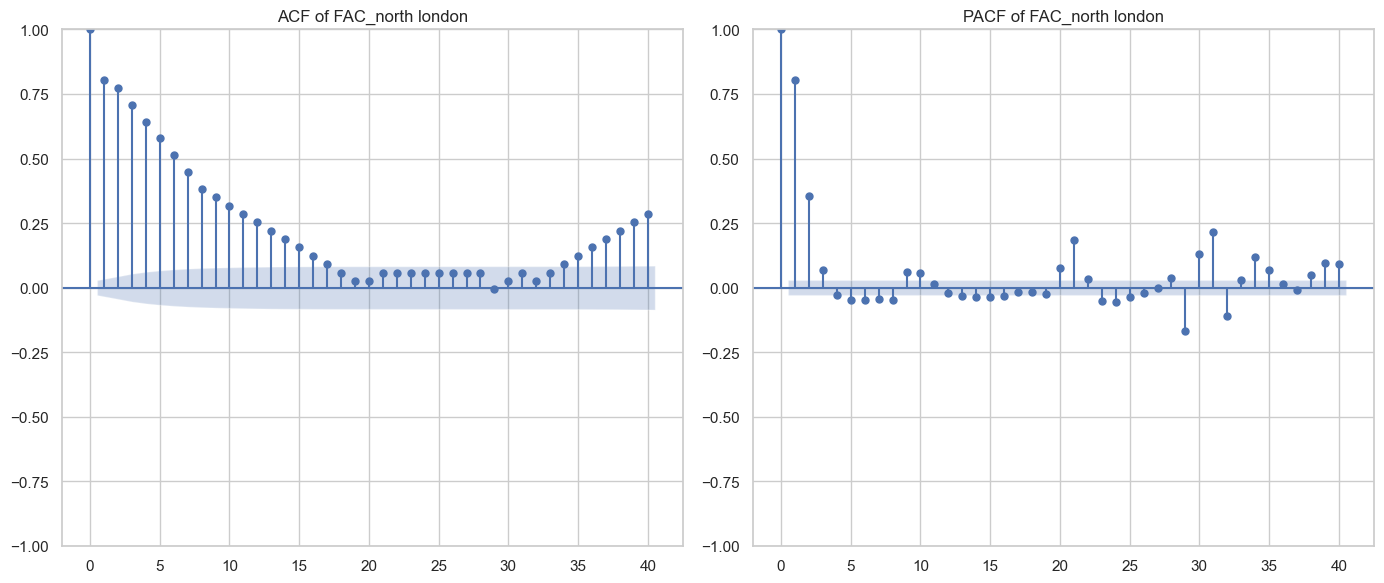

Processing column: FAC_nikki haley


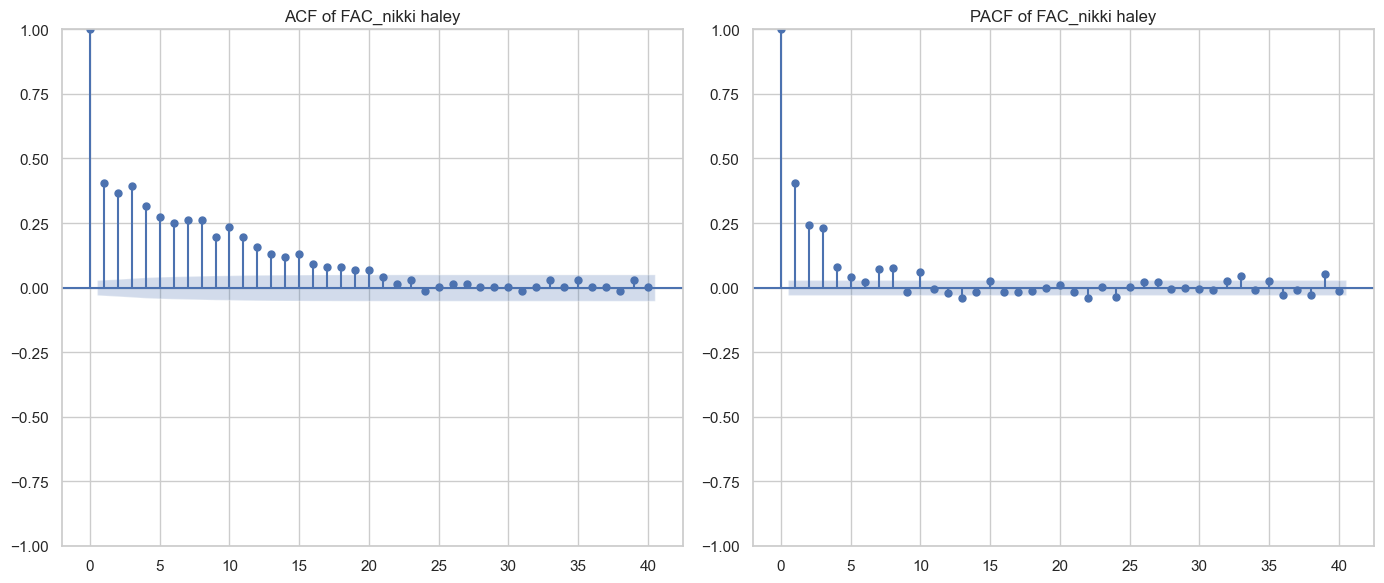

Processing column: GPE_london


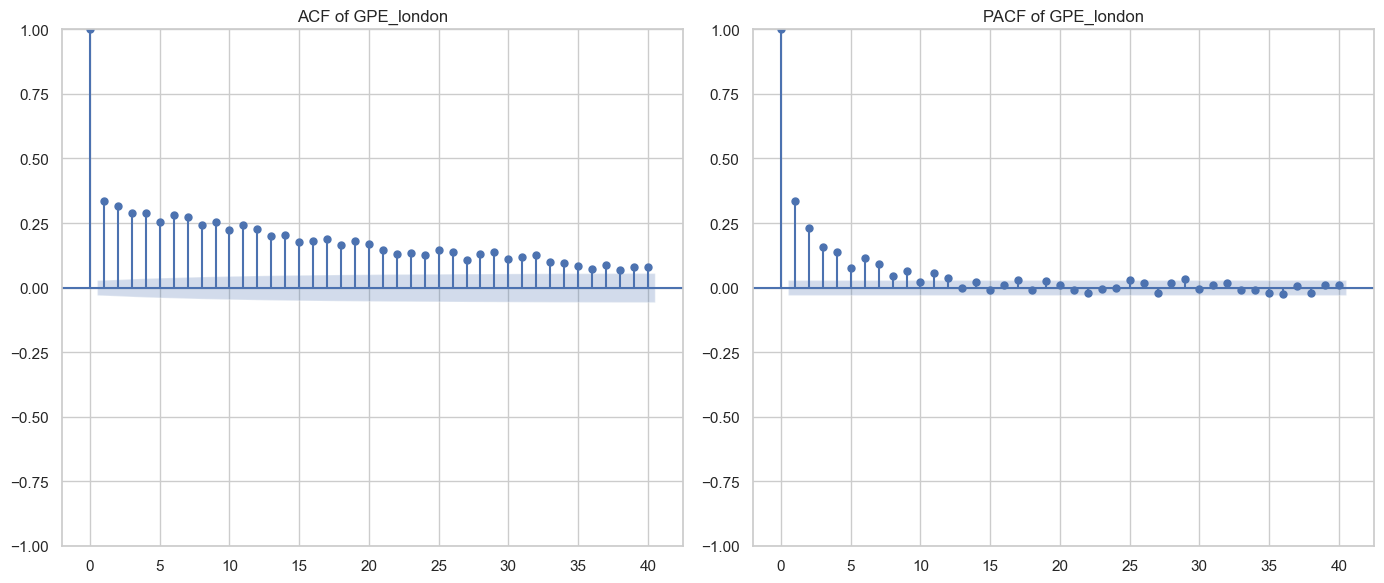

Processing column: GPE_russia


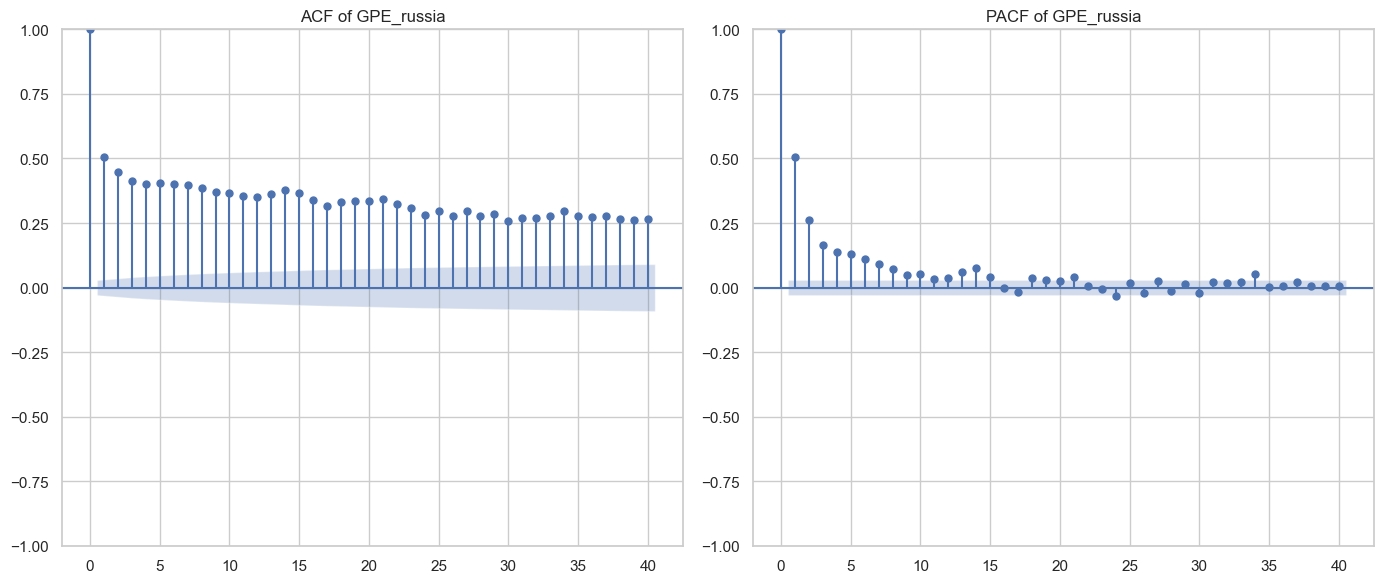

Processing column: GPE_america


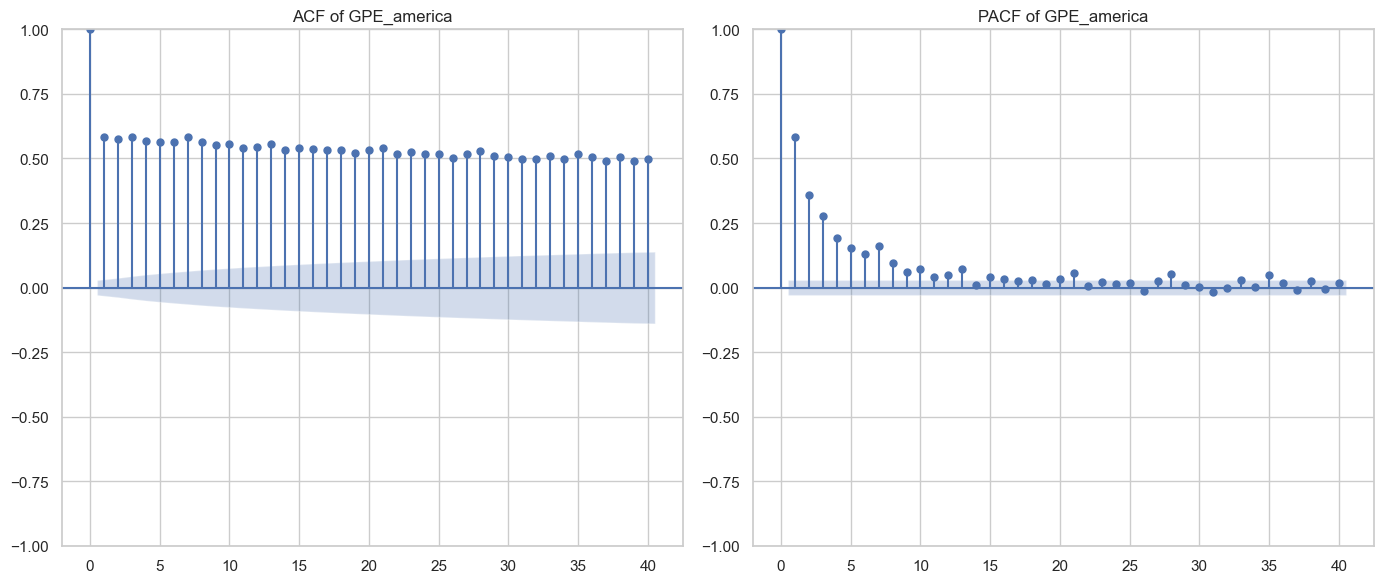

Processing column: GPE_california


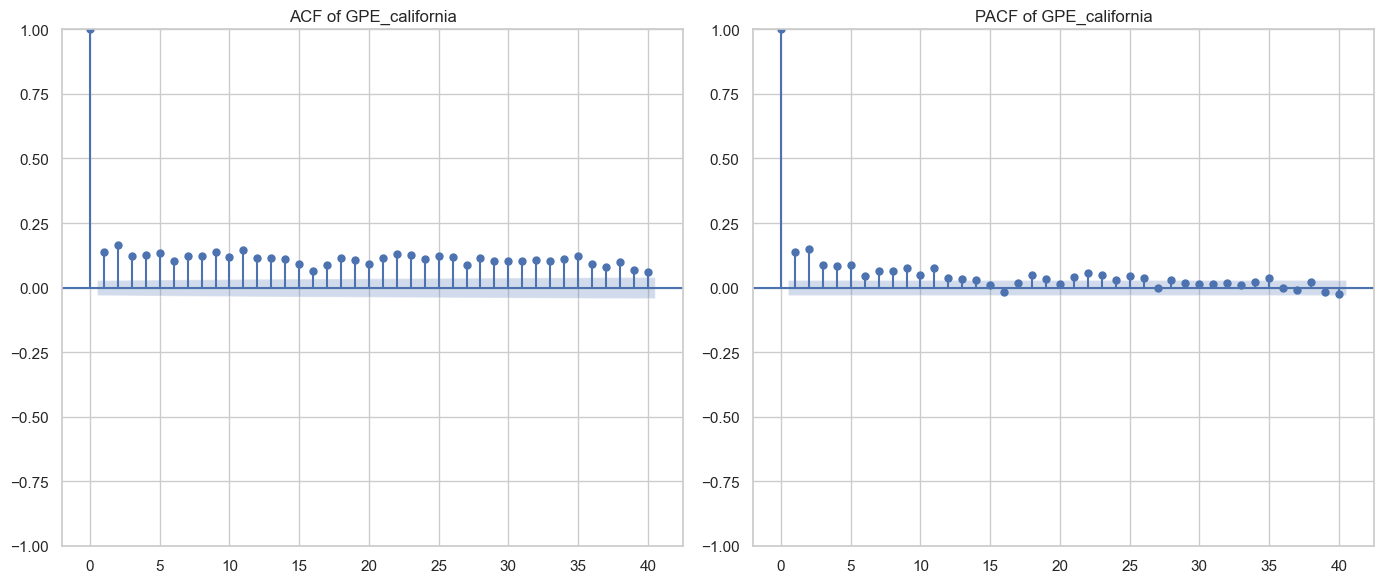

Processing column: GPE_china


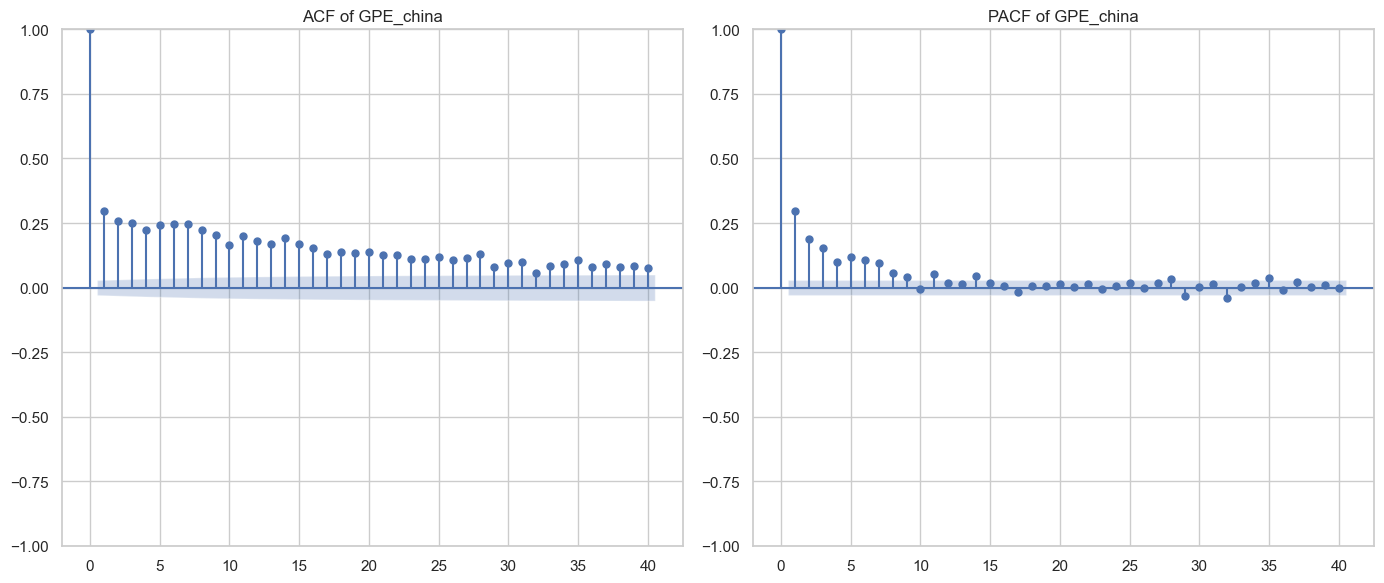

Processing column: LAW_rico


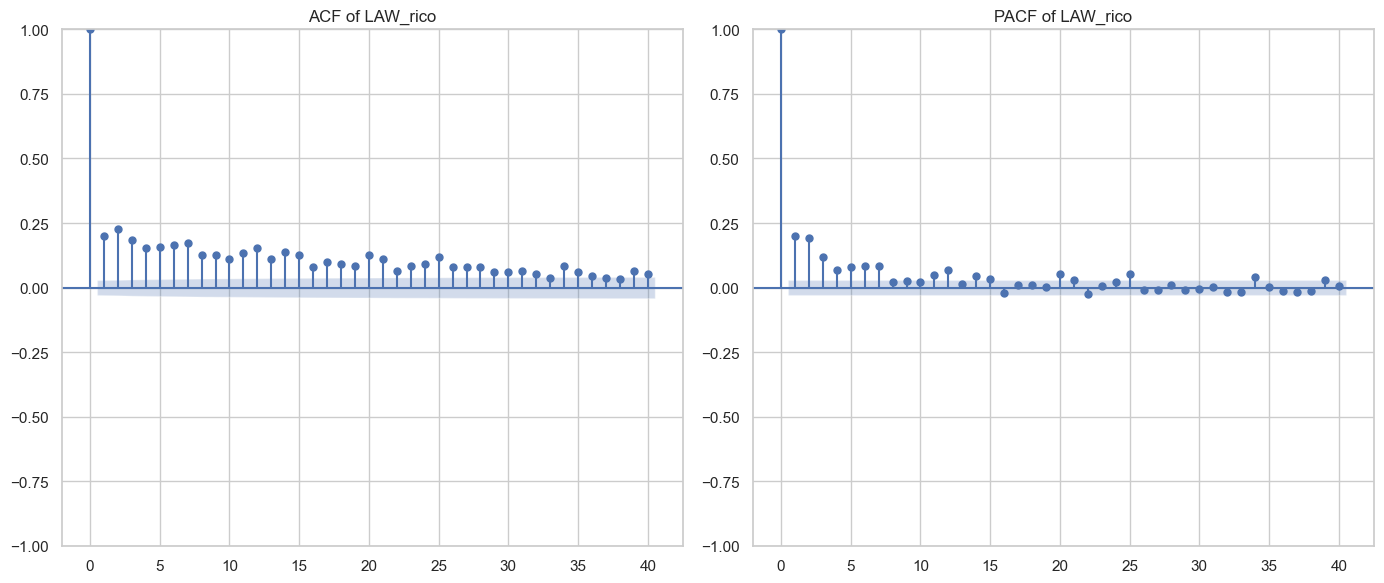

Processing column: LAW_camilla wear


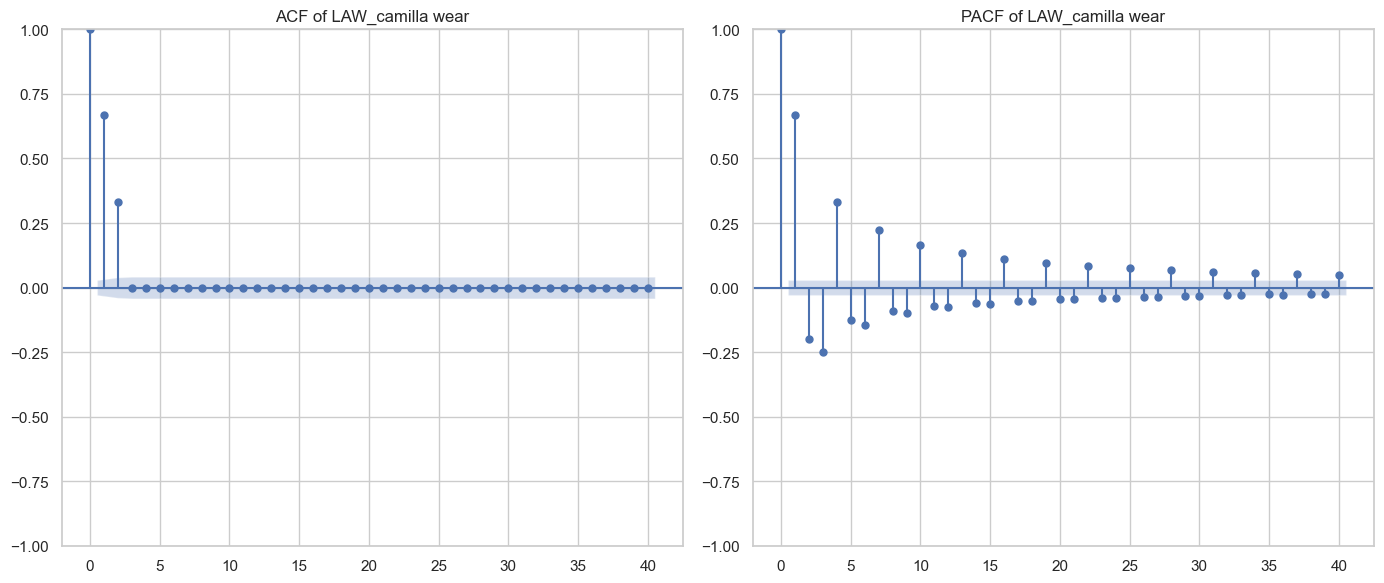

Processing column: LAW_crown new


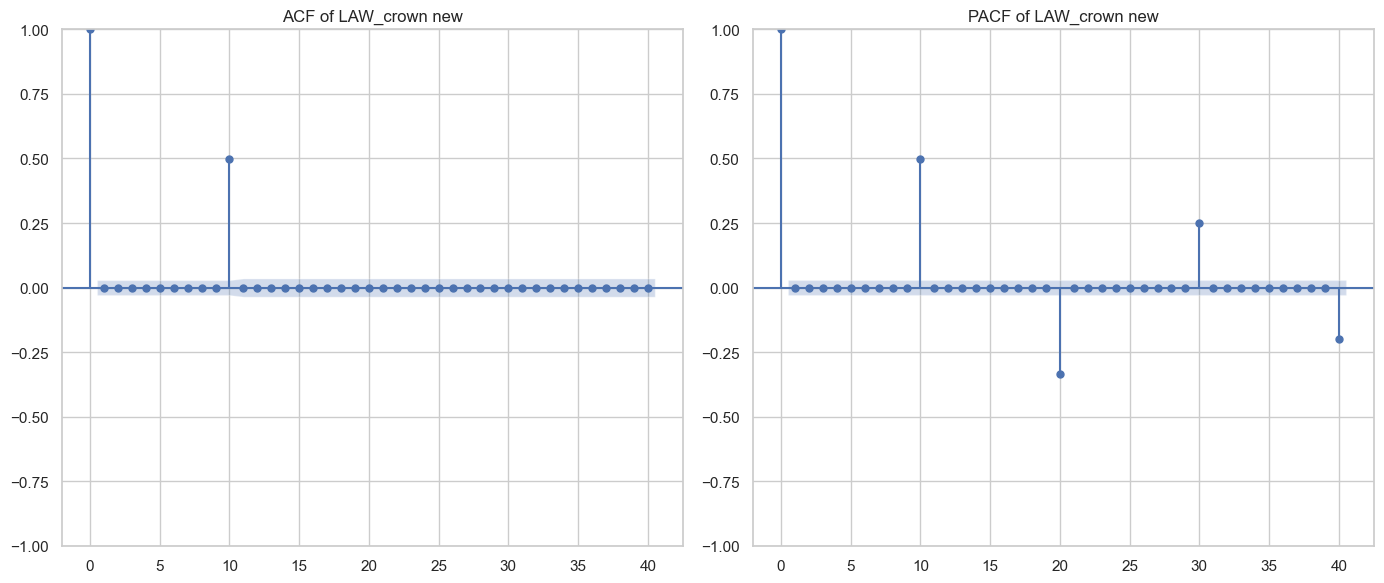

Processing column: LAW_superfund


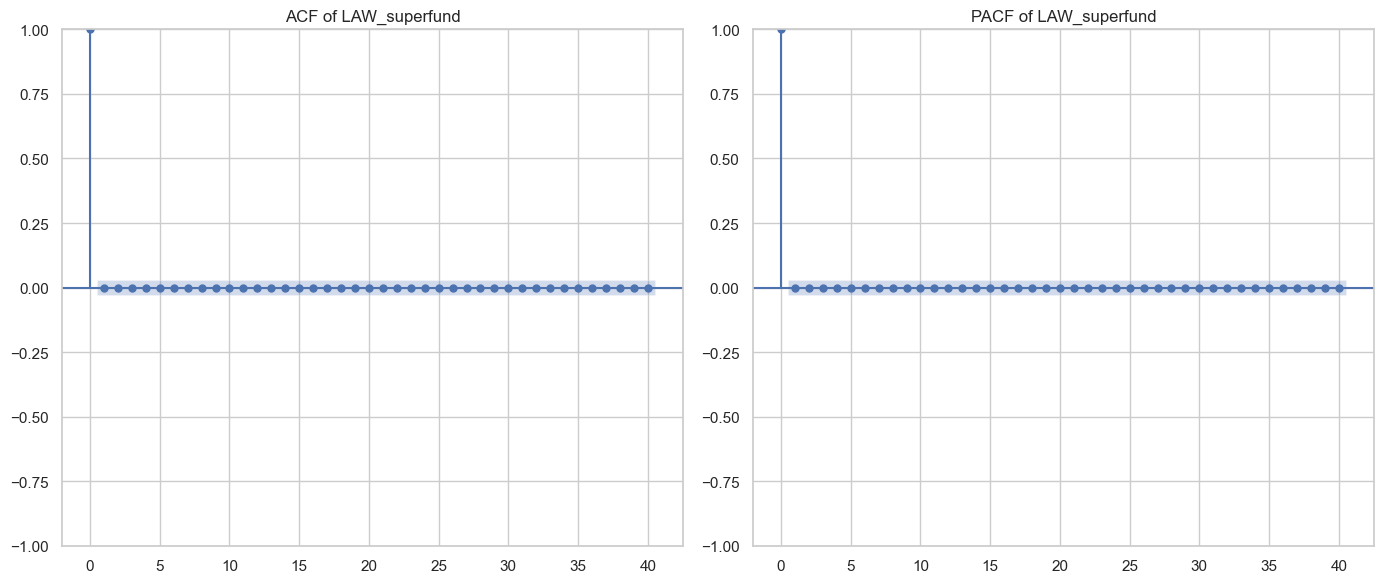

Processing column: LAW_west ham


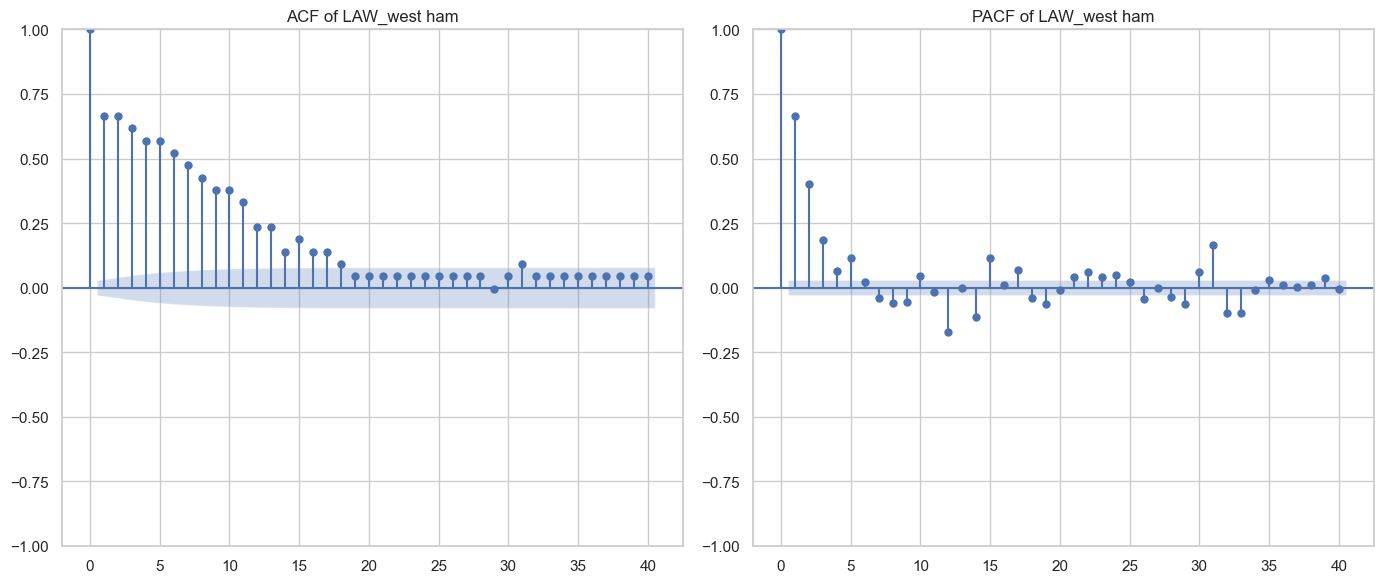

Processing column: LOC_europe


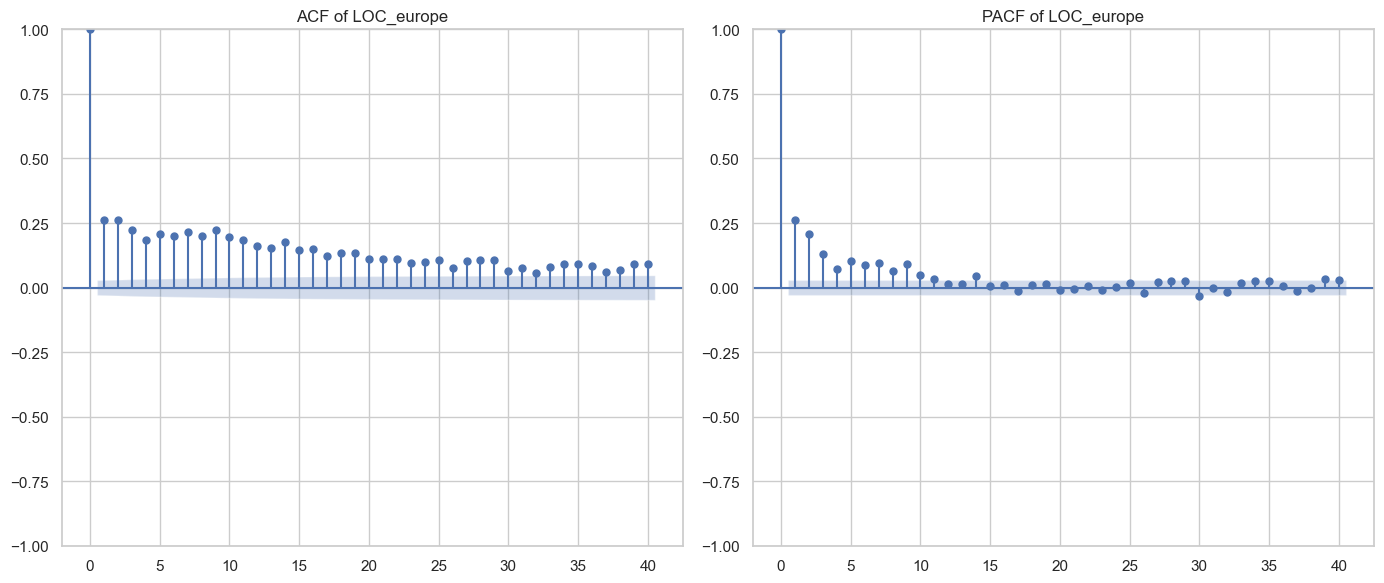

Processing column: LOC_middle east


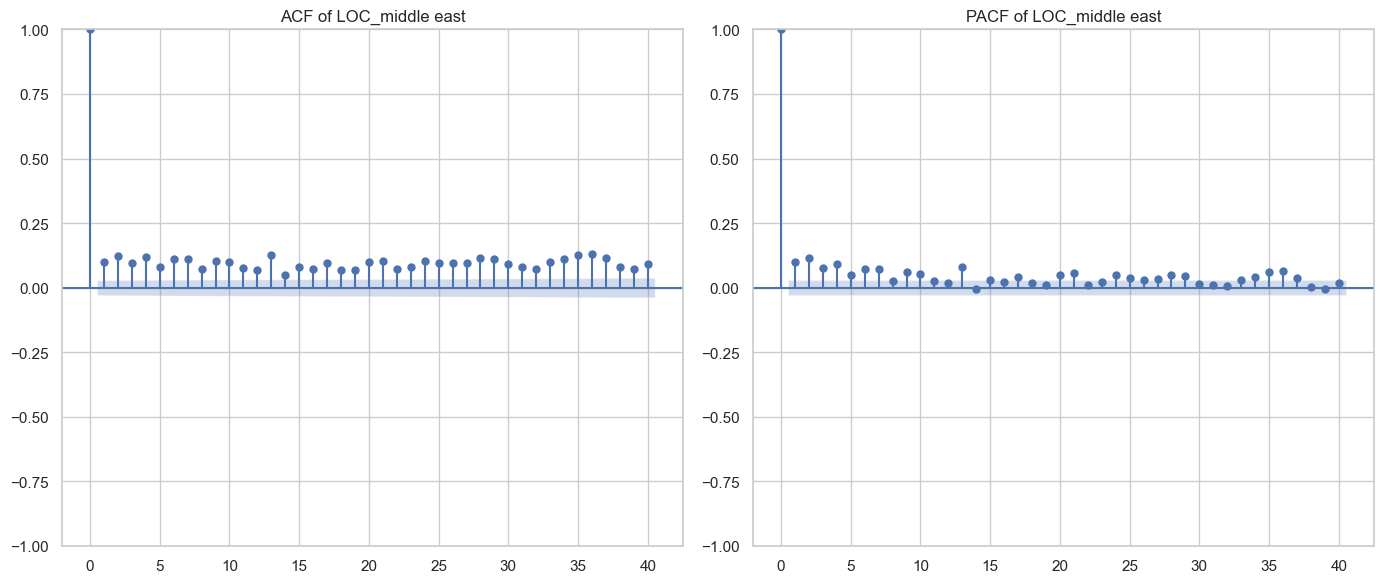

Processing column: LOC_africa


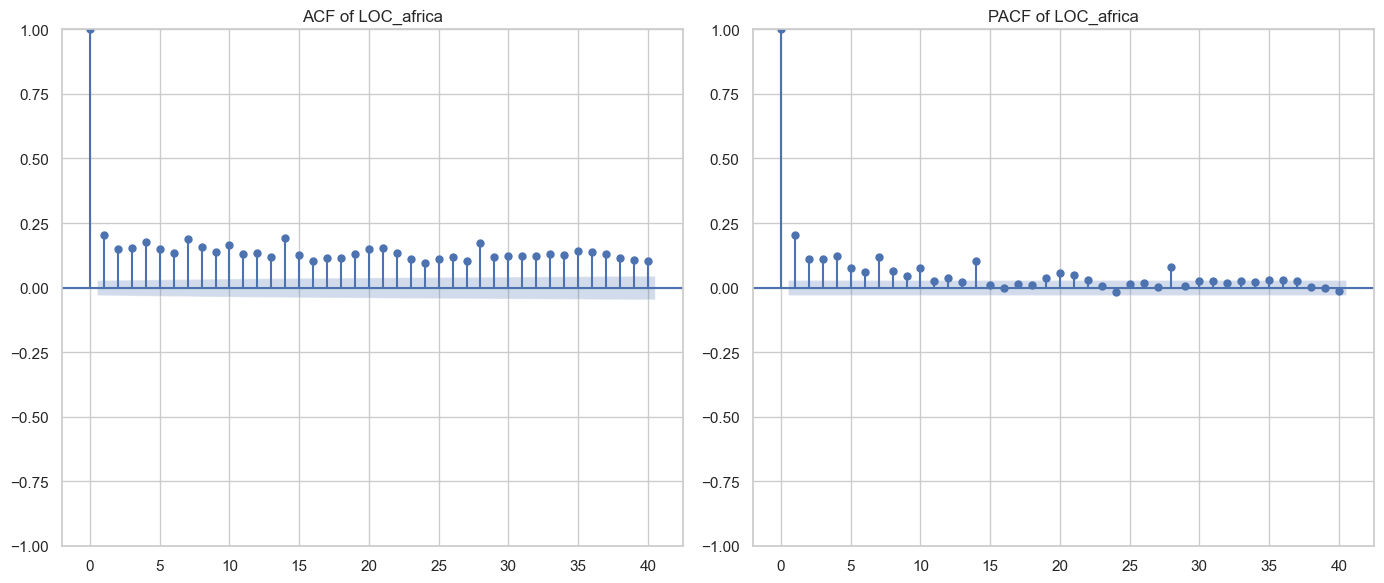

Processing column: LOC_caribbean


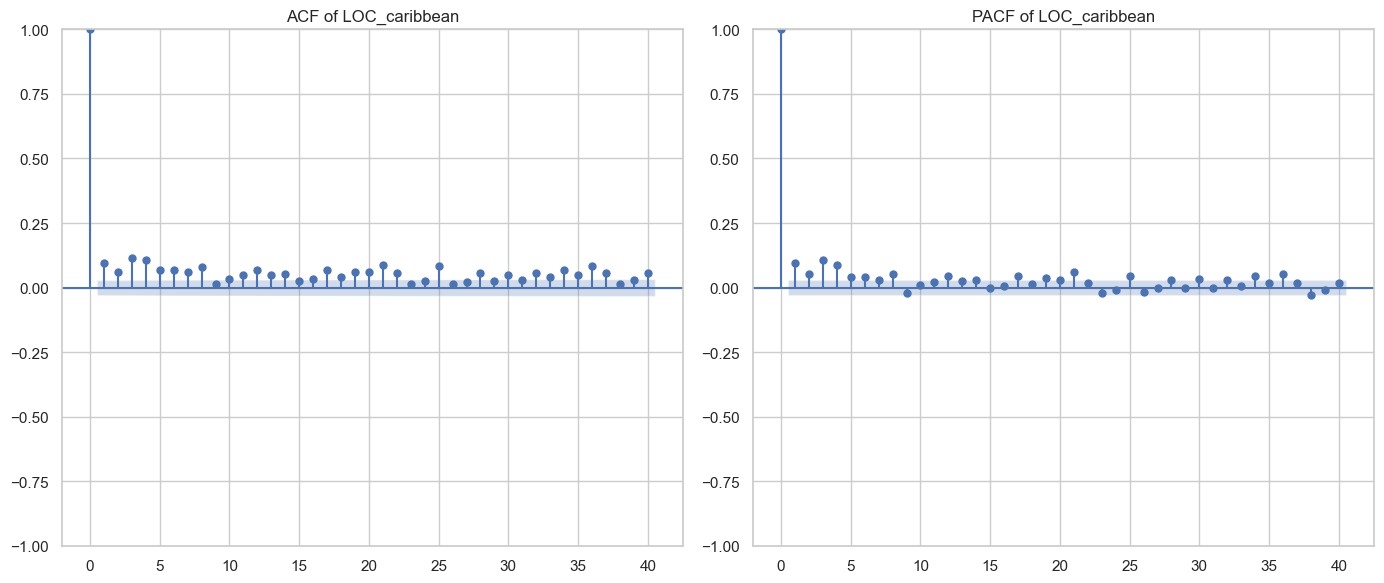

Processing column: LOC_asia


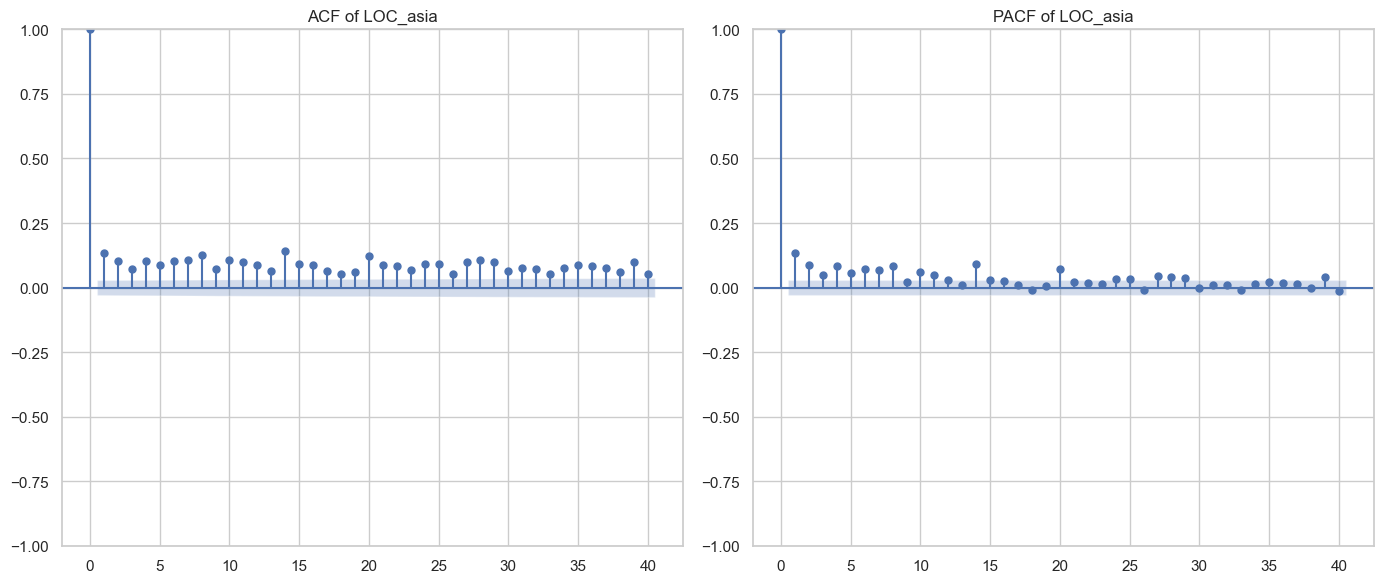

Processing column: MONEY_mike penny


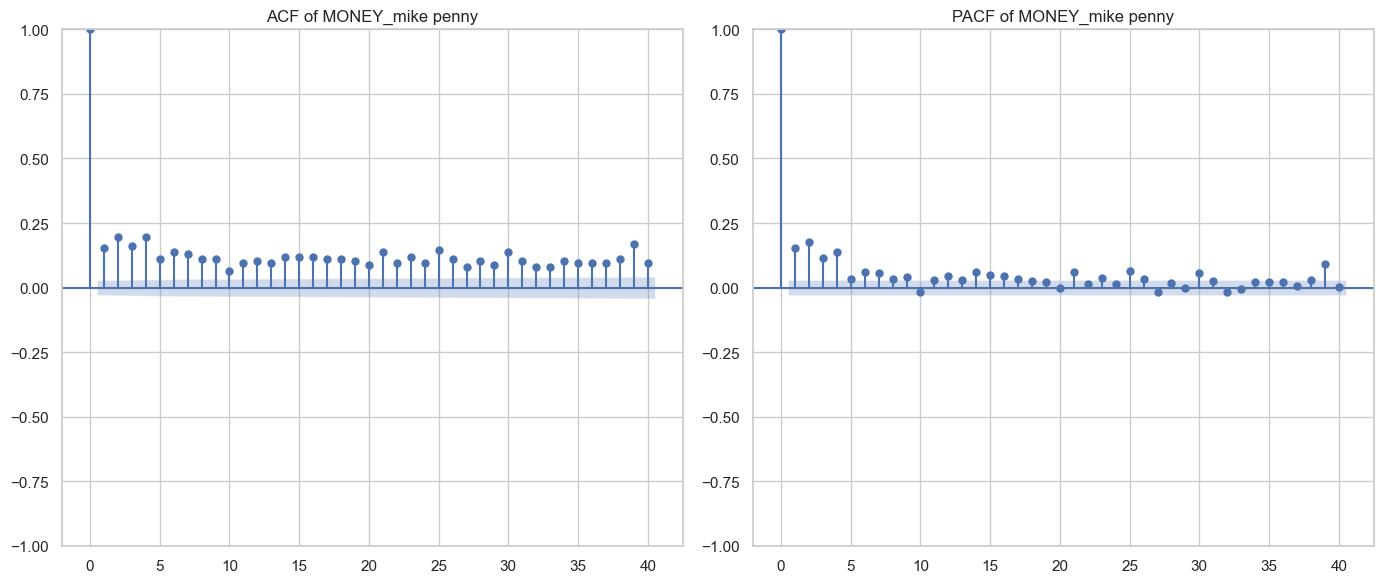

Processing column: MONEY_million dollar


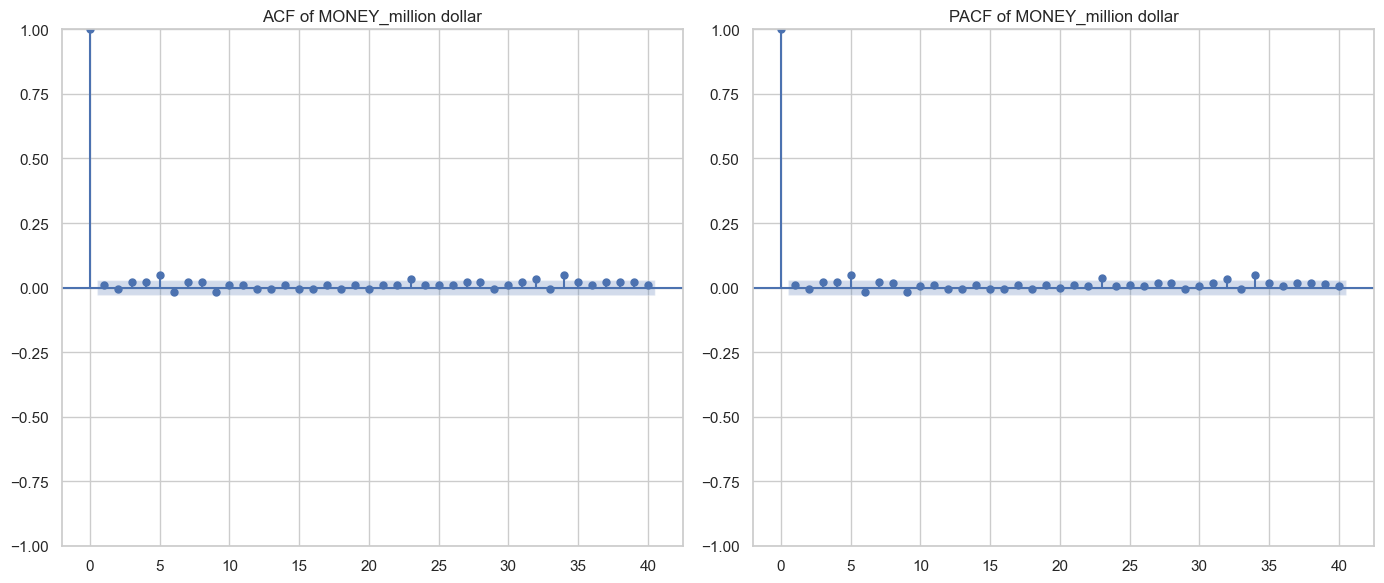

Processing column: MONEY_billion dollar


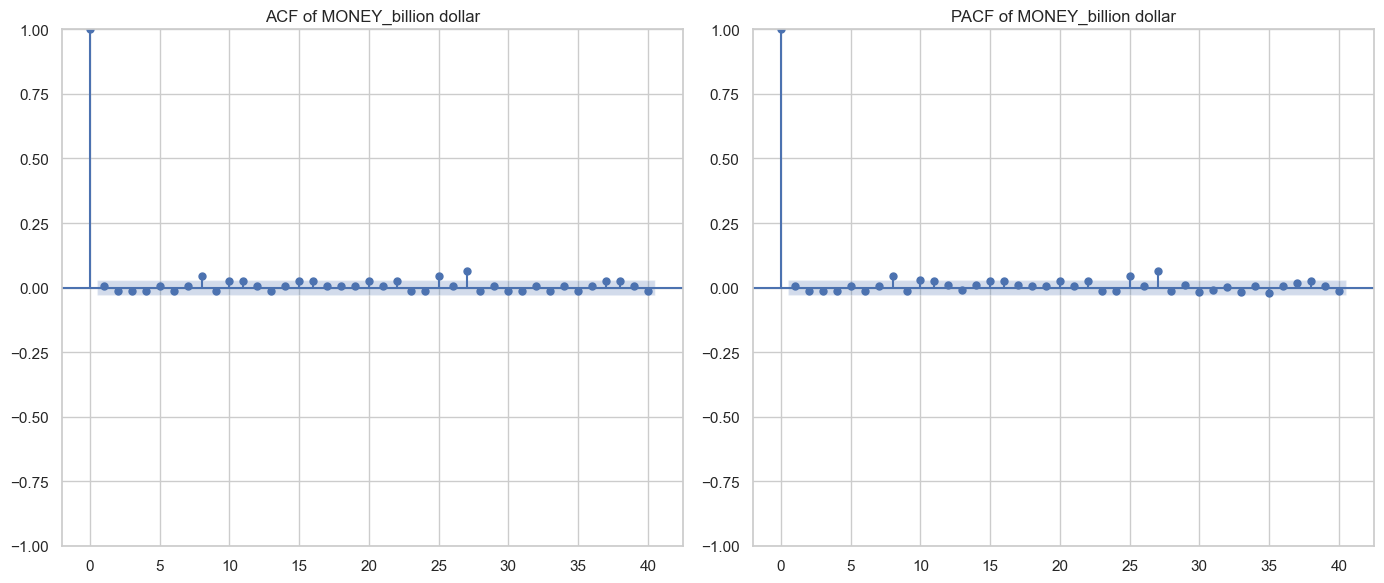

Processing column: MONEY_thousand dollar


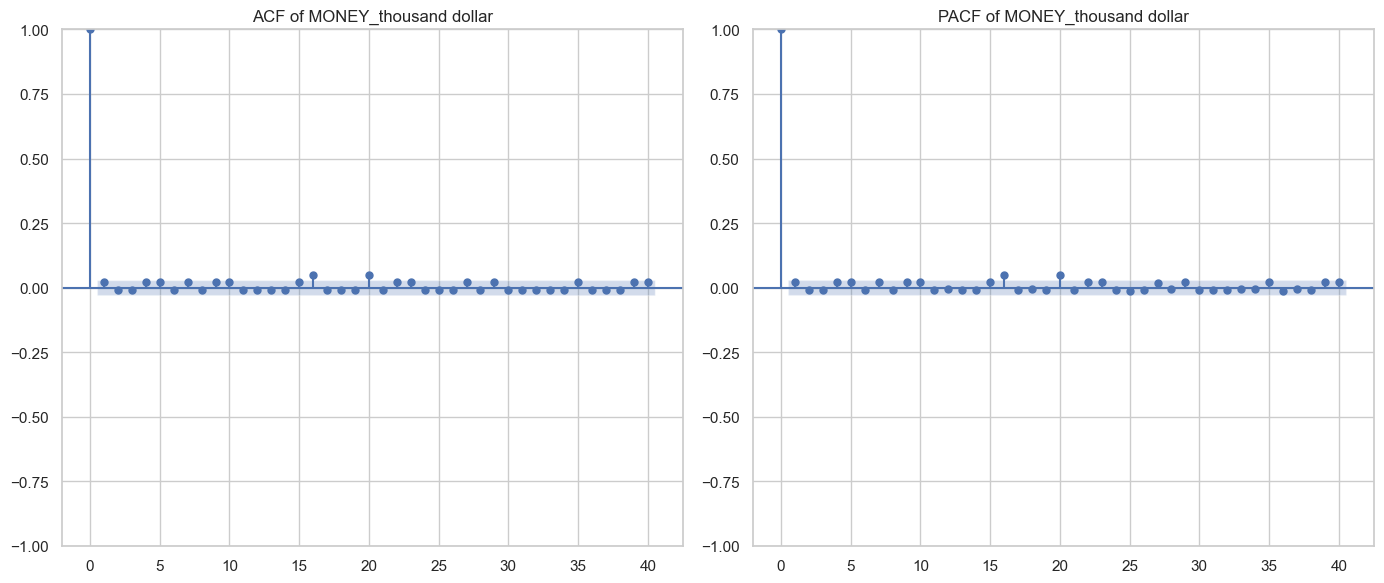

Processing column: MONEY_every penny


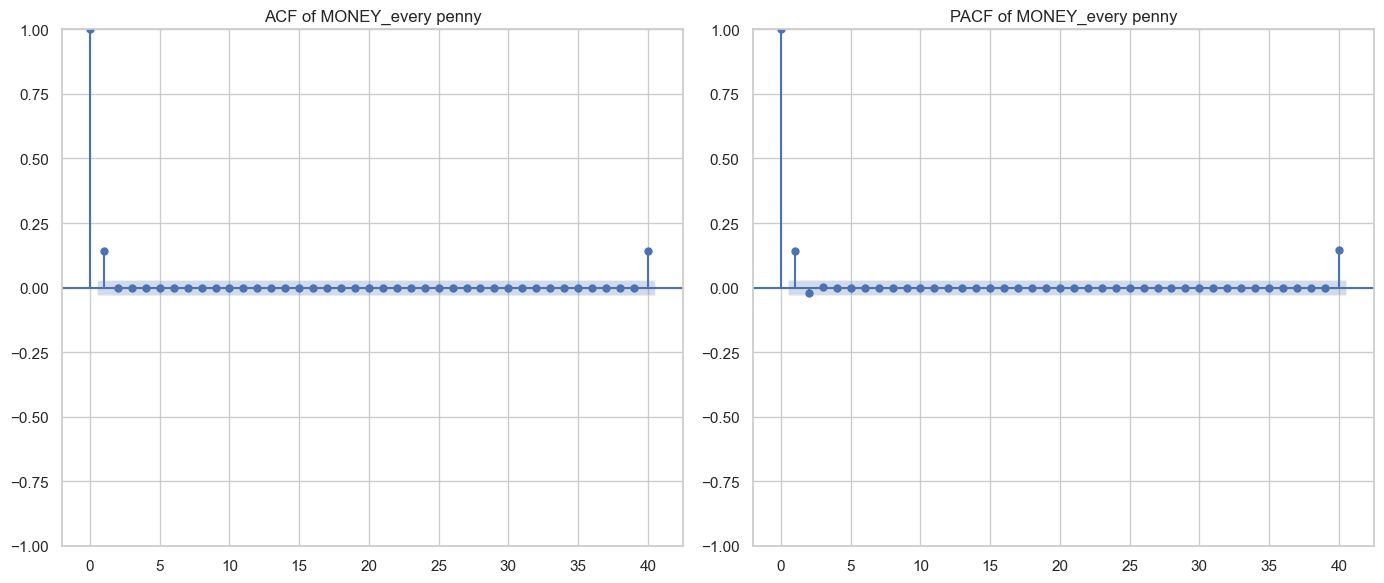

Processing column: NORP_american


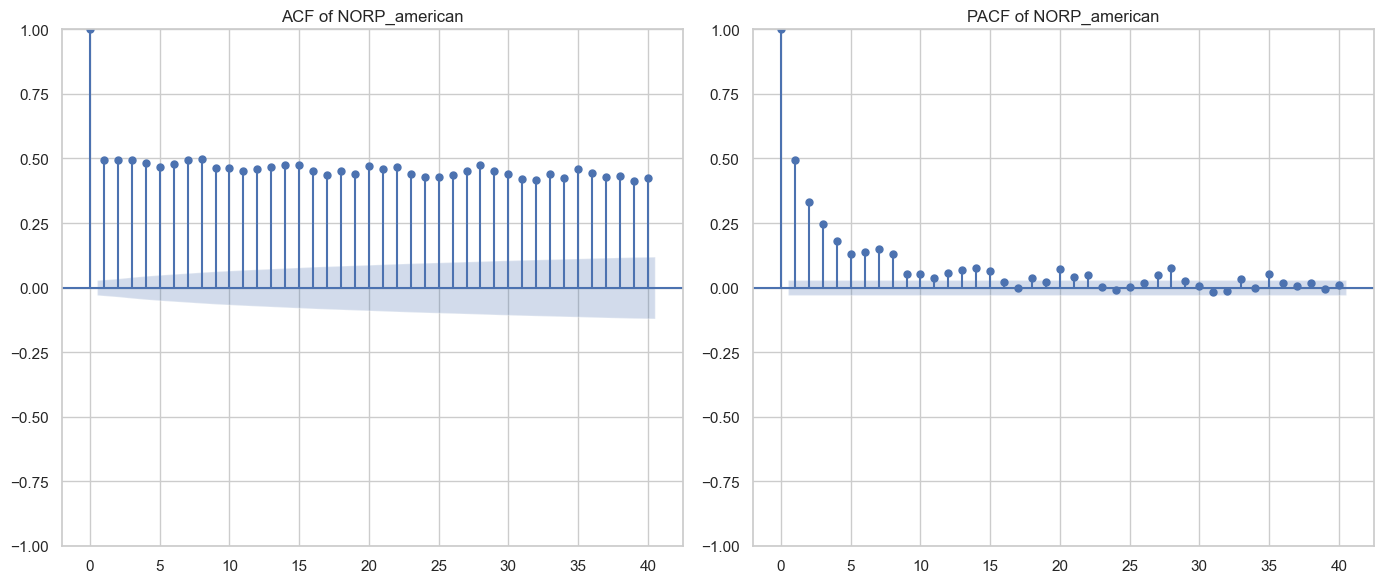

Processing column: NORP_republican


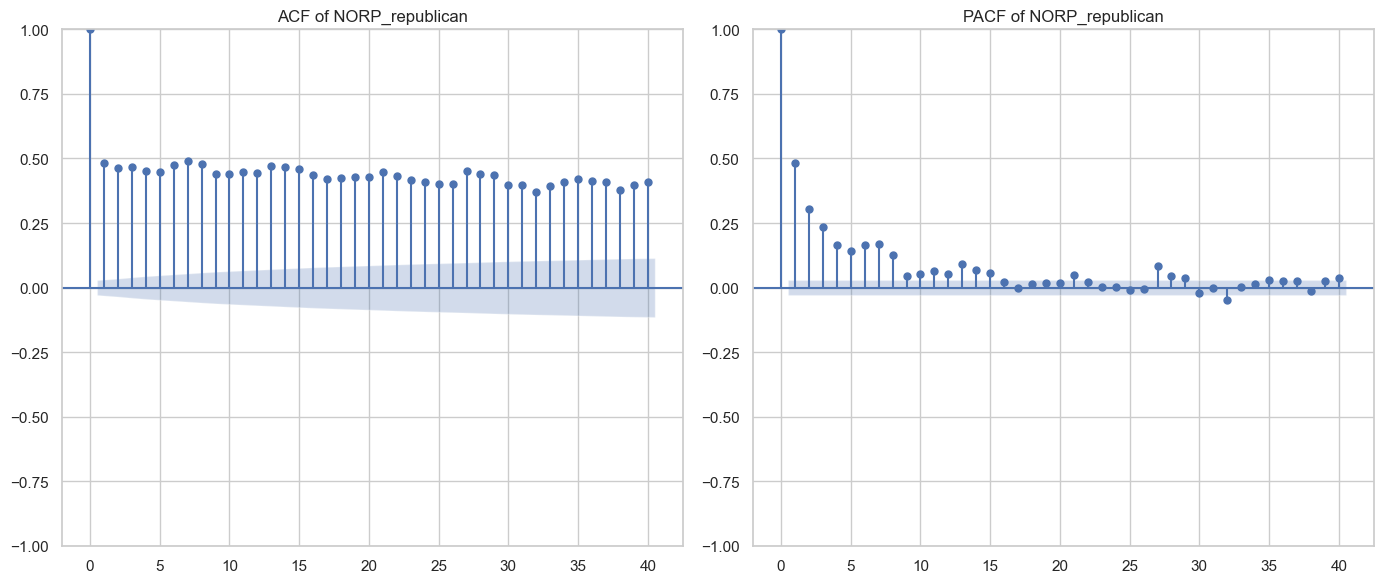

Processing column: NORP_democrat


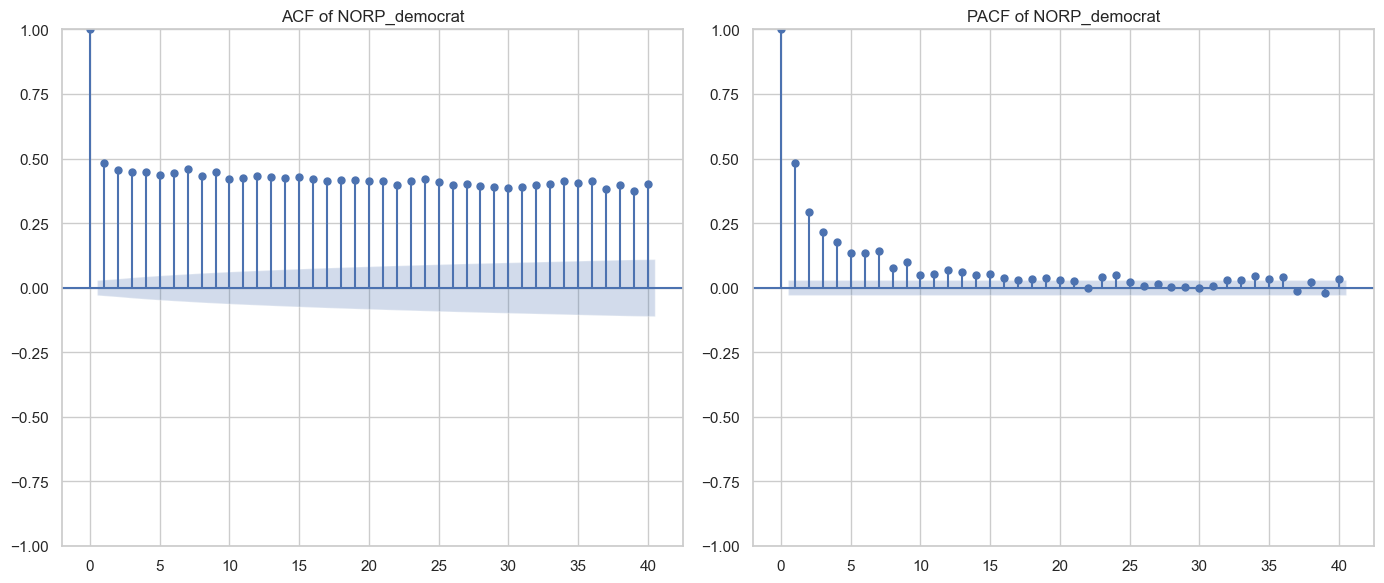

Processing column: NORP_russian


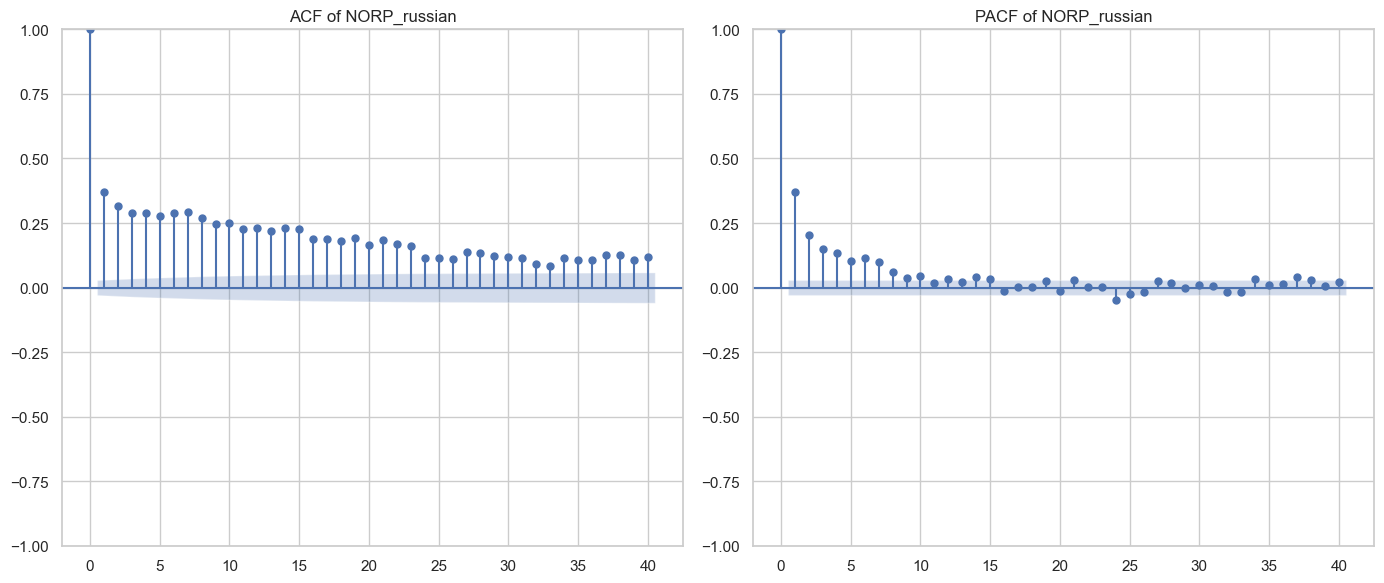

Processing column: NORP_muslim


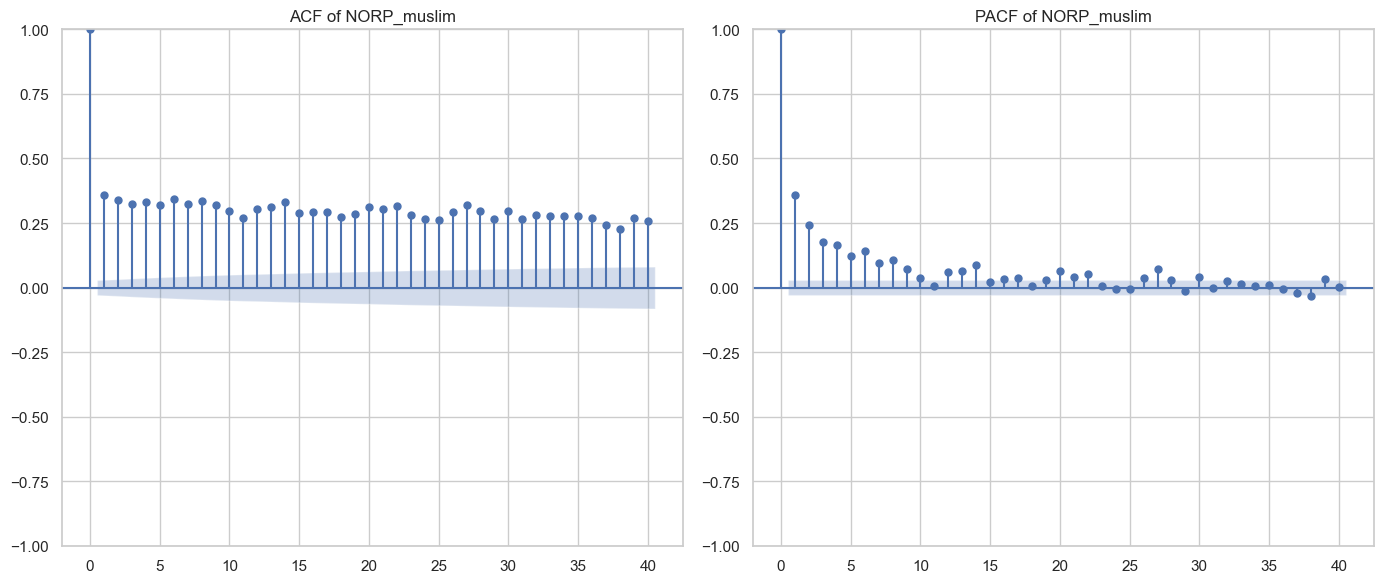

Processing column: ORDINAL_first


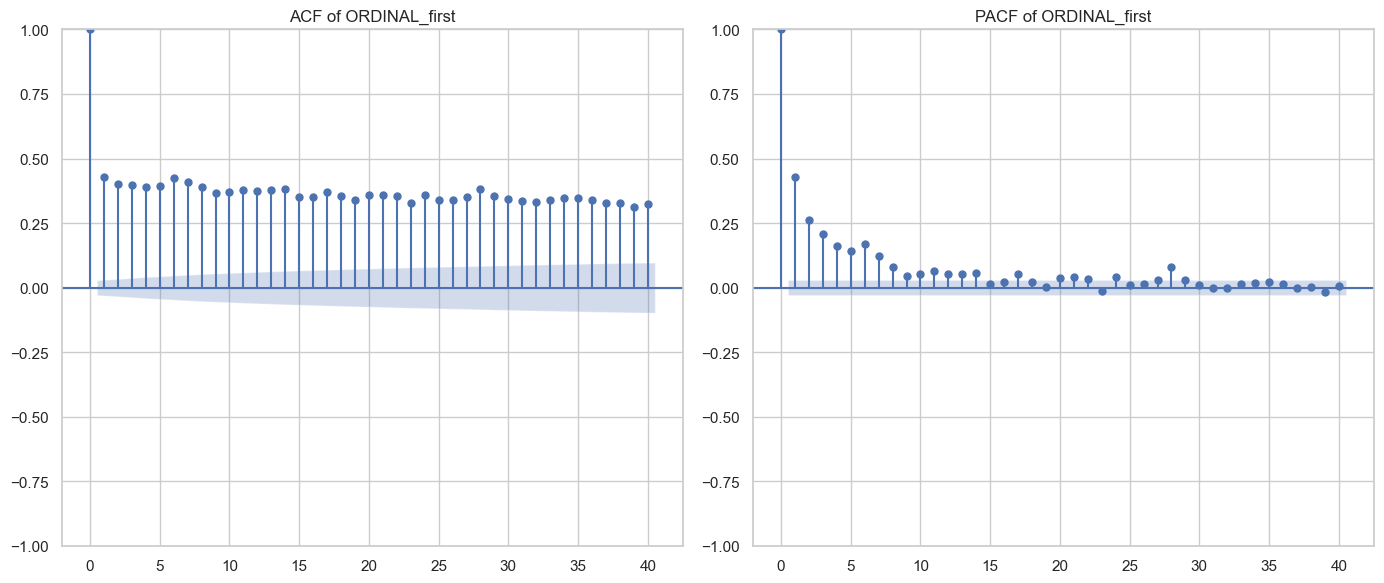

Processing column: ORDINAL_second


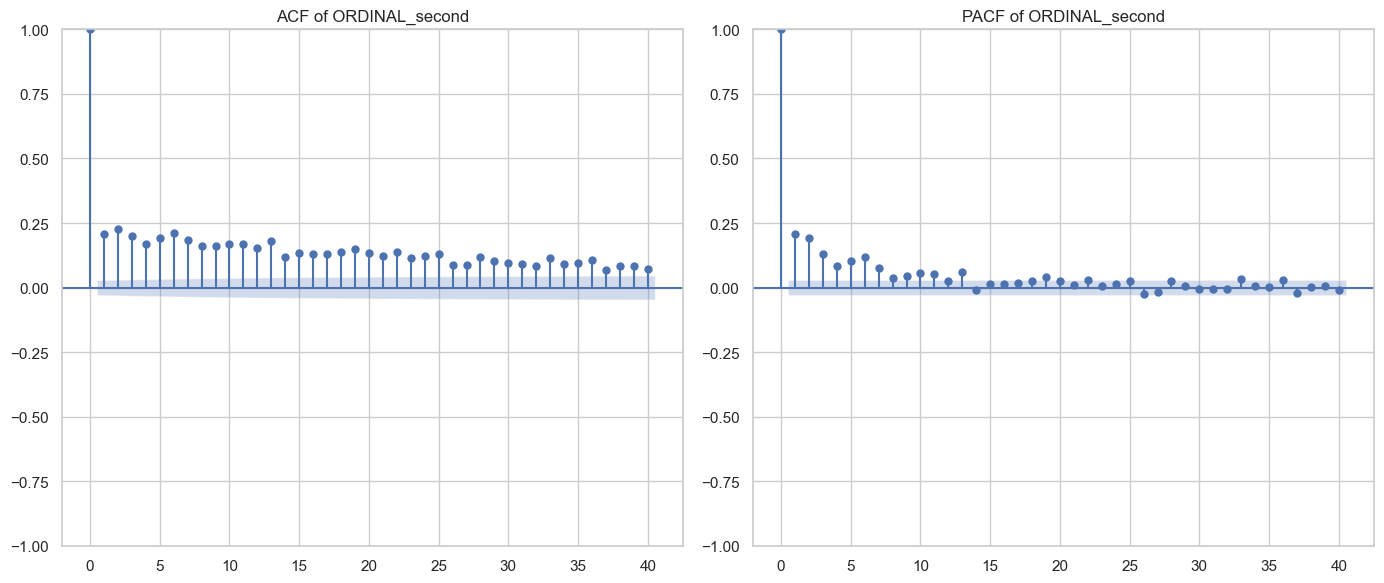

Processing column: ORDINAL_third


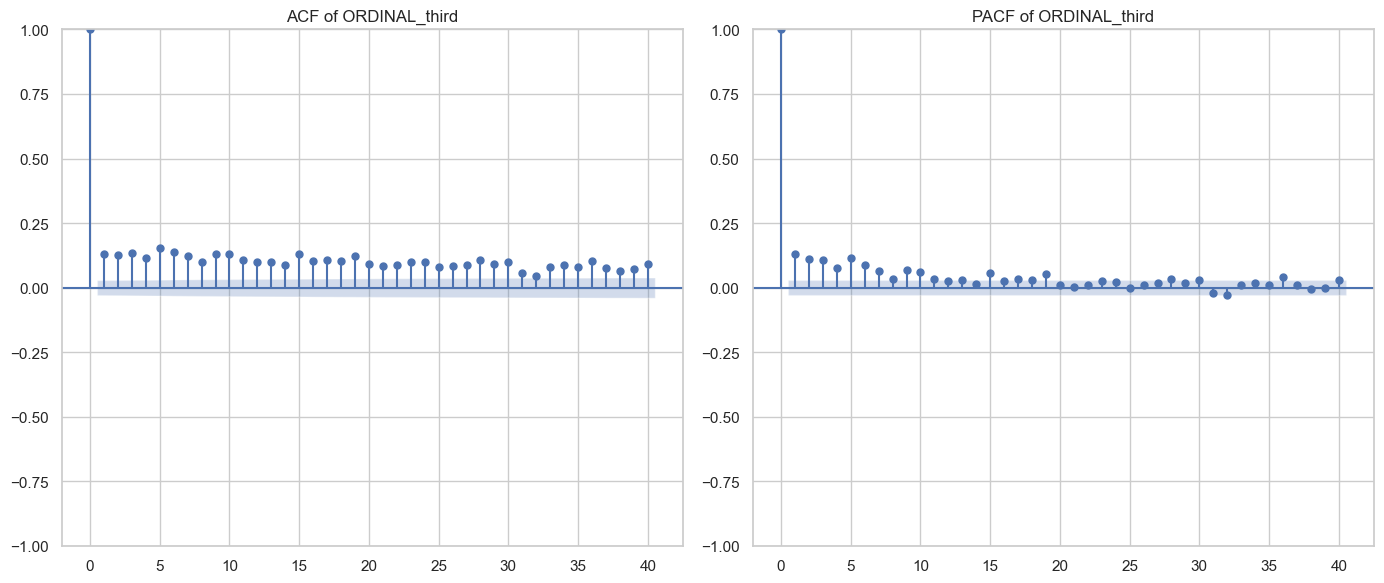

Processing column: ORDINAL_fourth


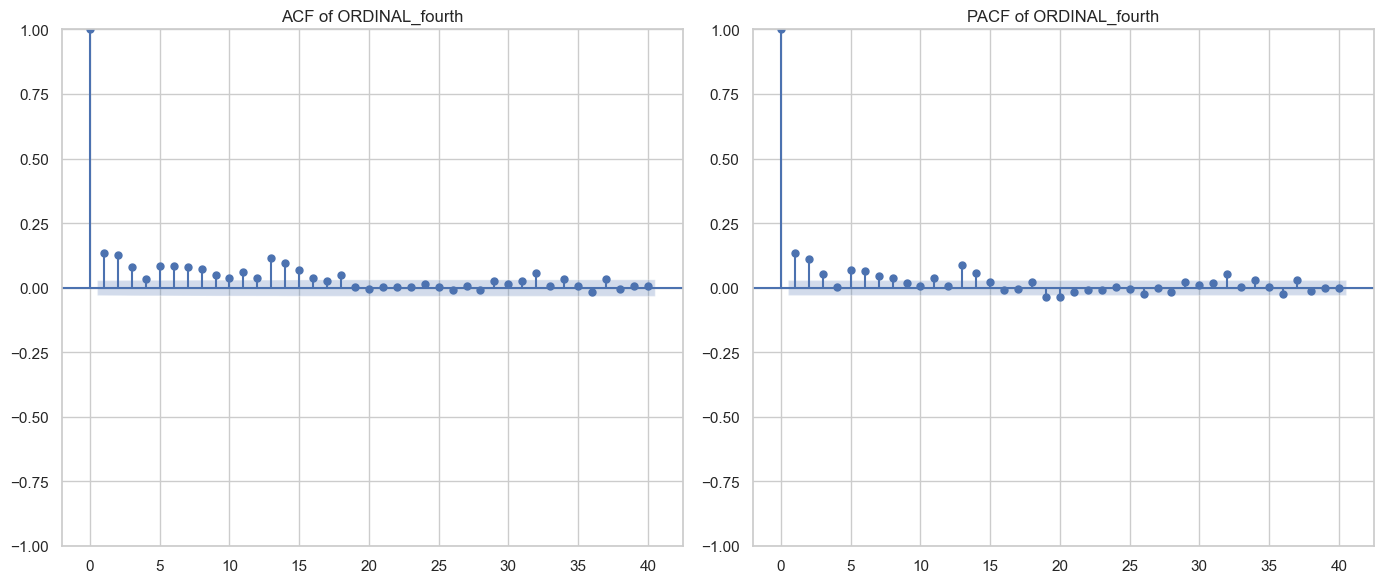

Processing column: ORDINAL_fifth


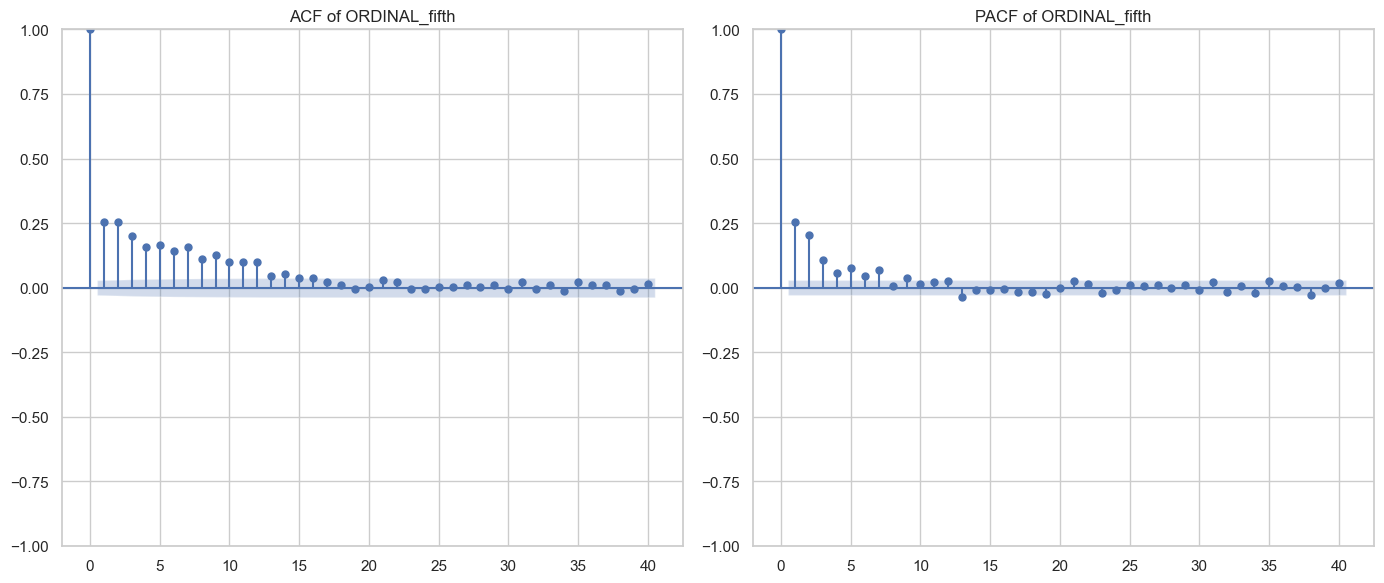

Processing column: ORG_gop


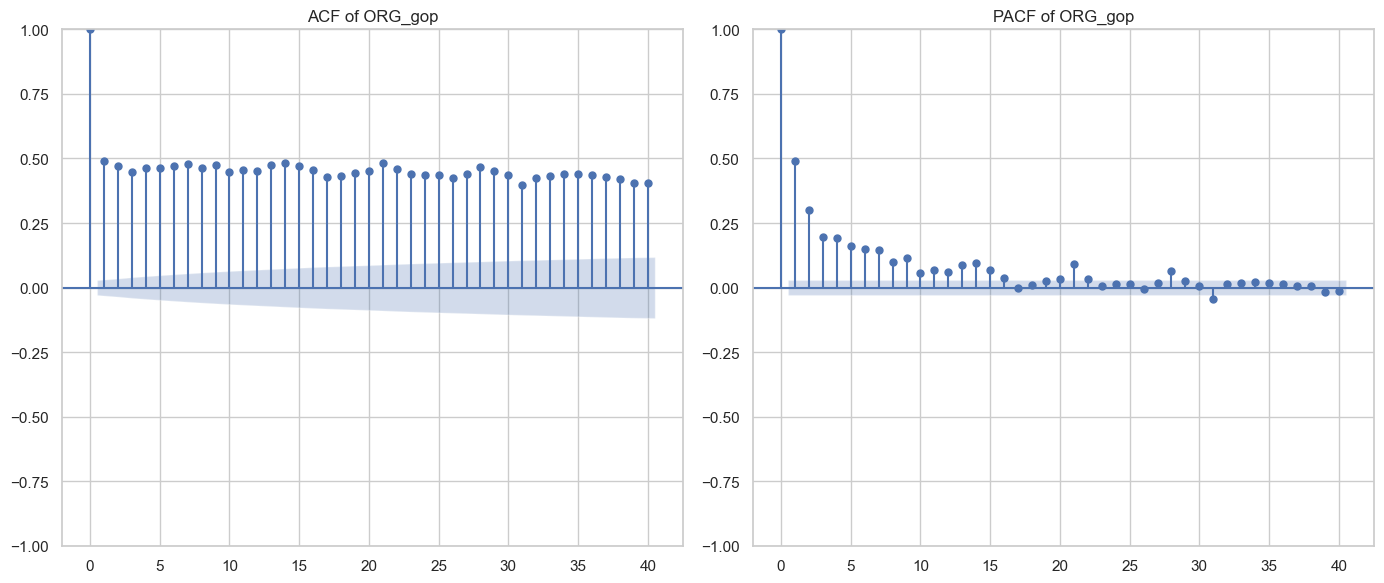

Processing column: ORG_senate


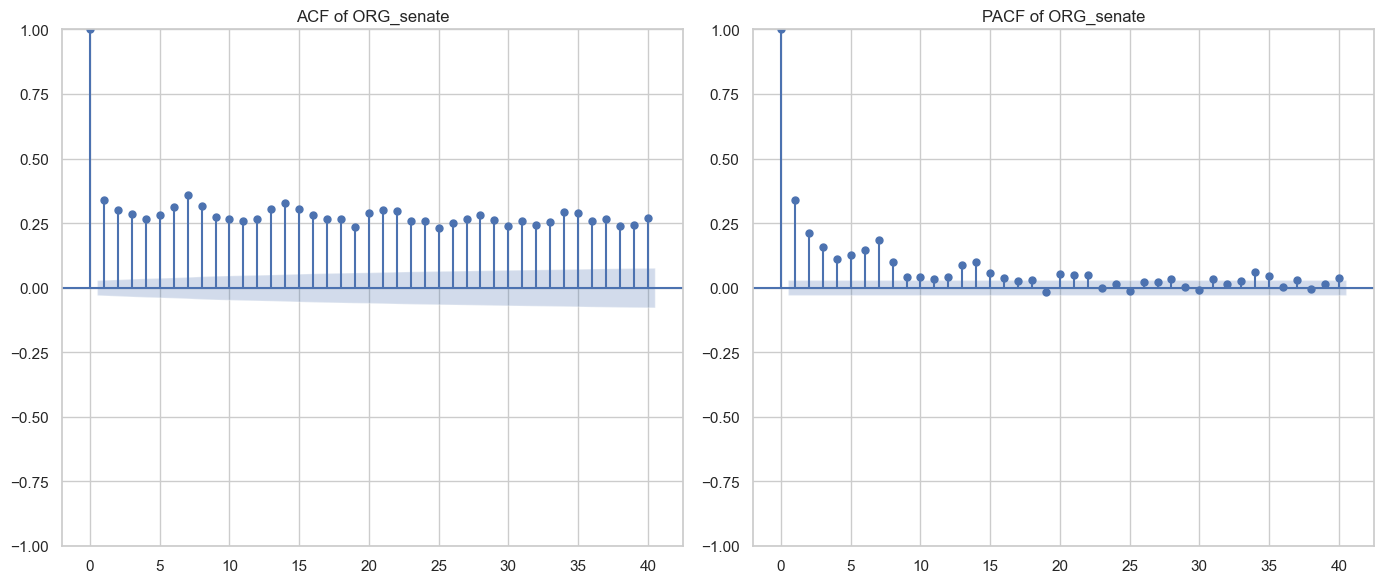

Processing column: ORG_white house


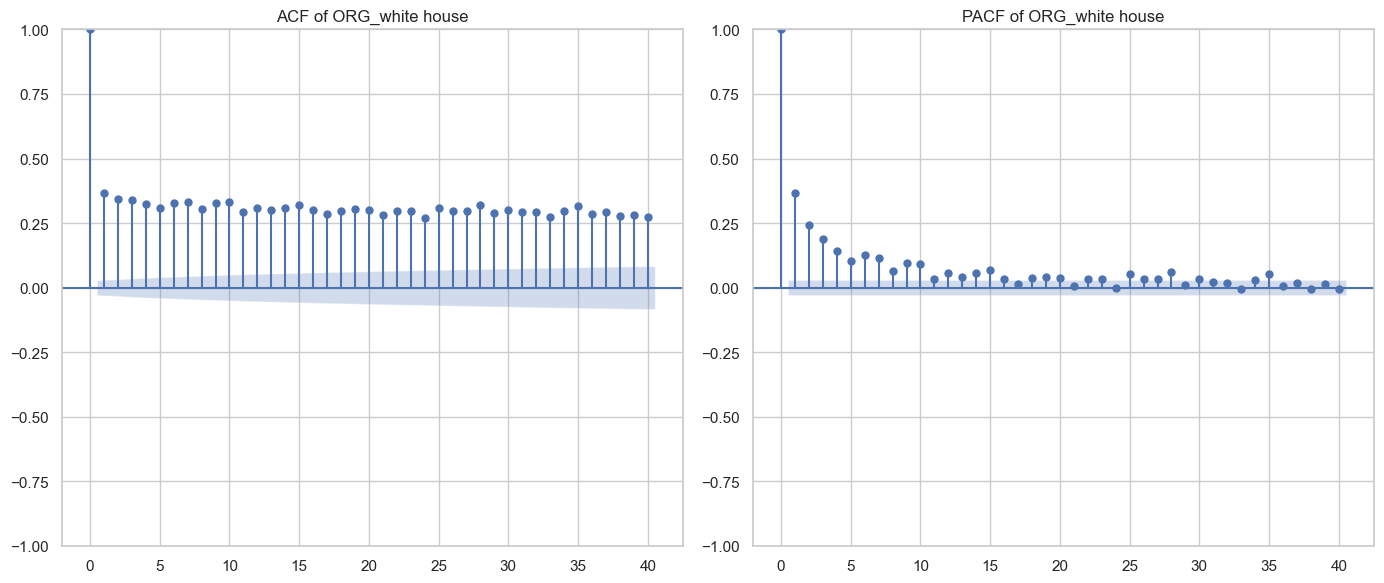

Processing column: ORG_congress


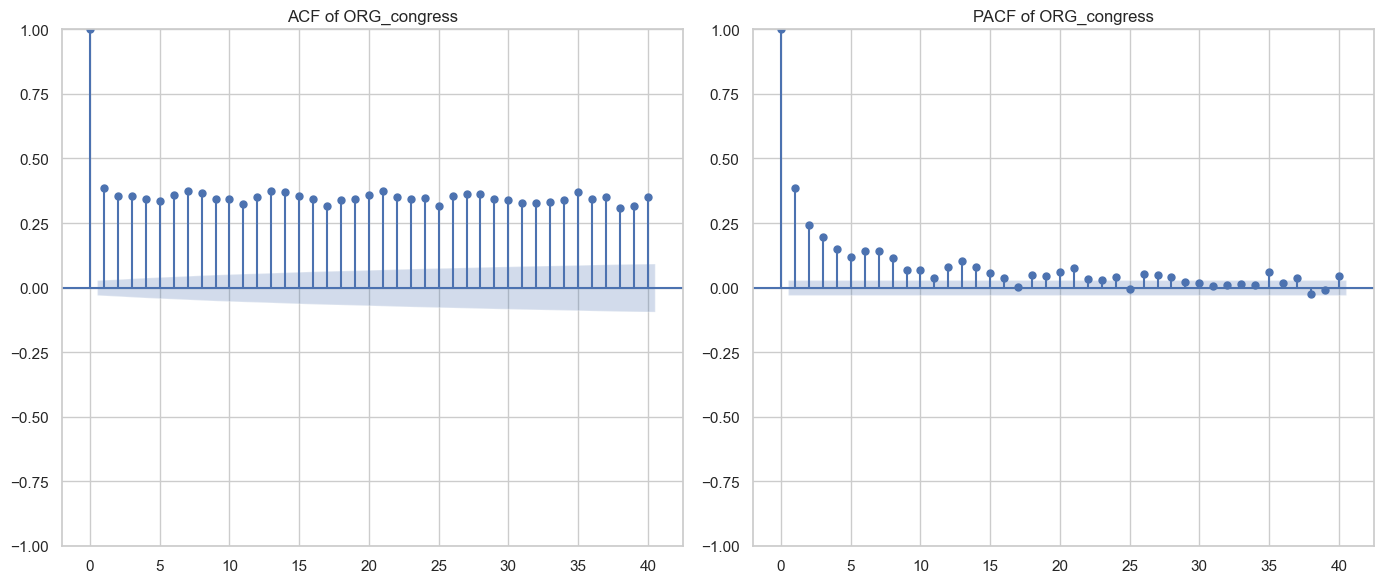

Processing column: ORG_supreme court


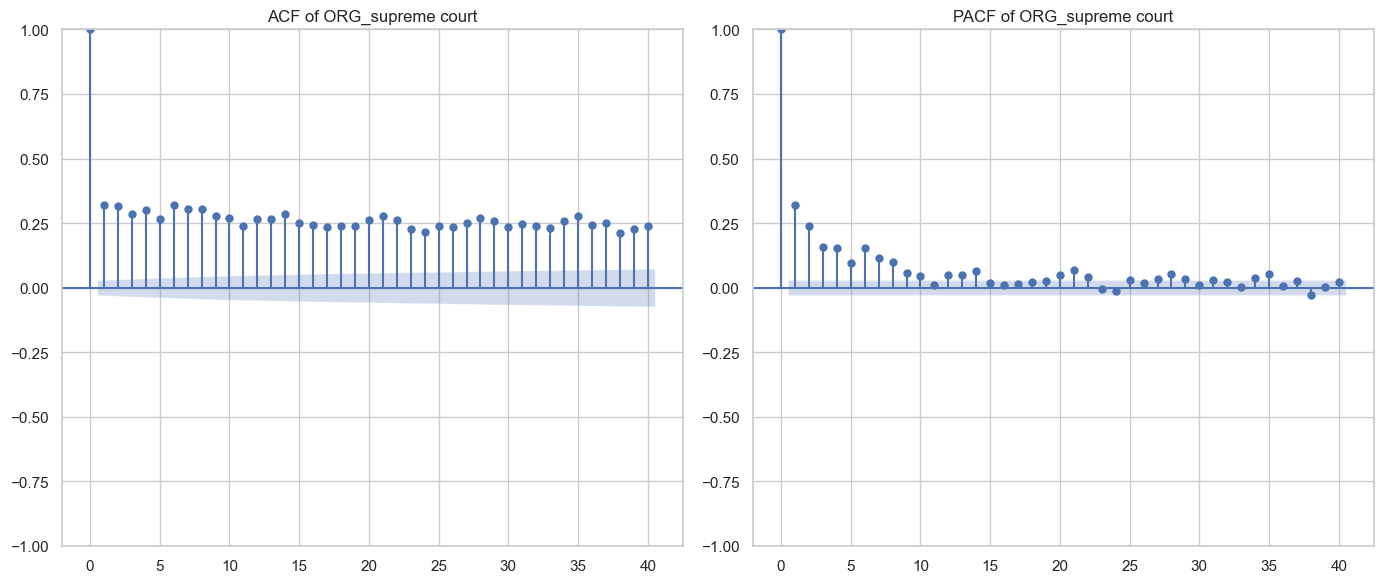

Processing column: PERCENT_one percent


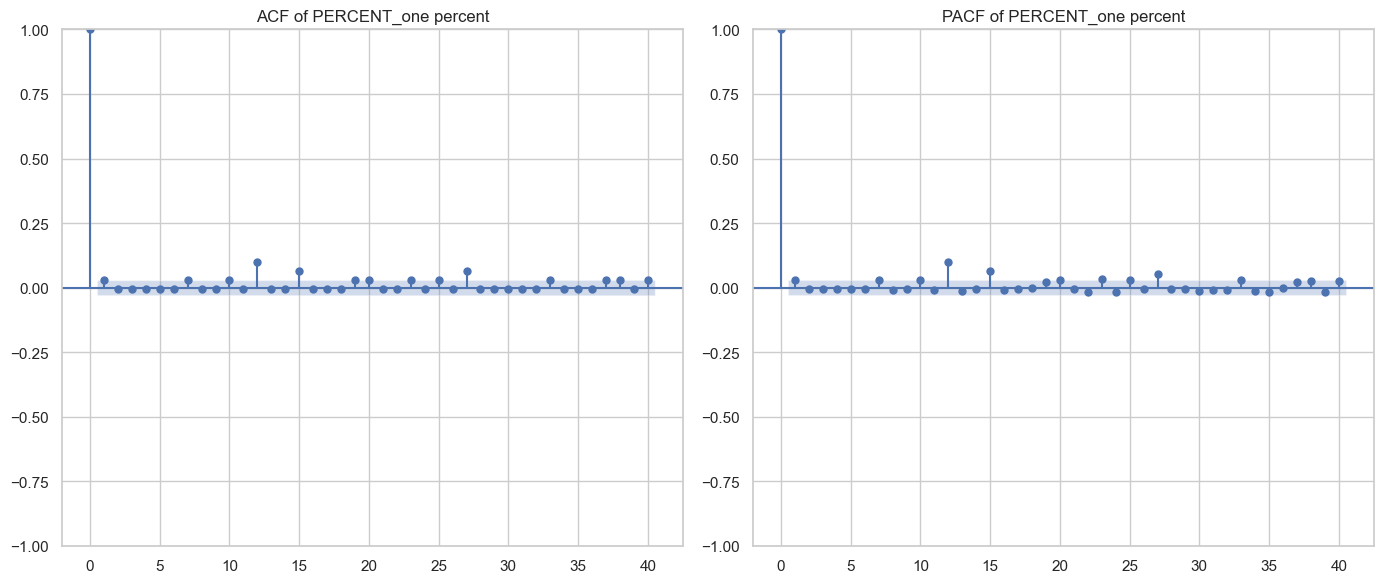

Processing column: PERCENT_five percent


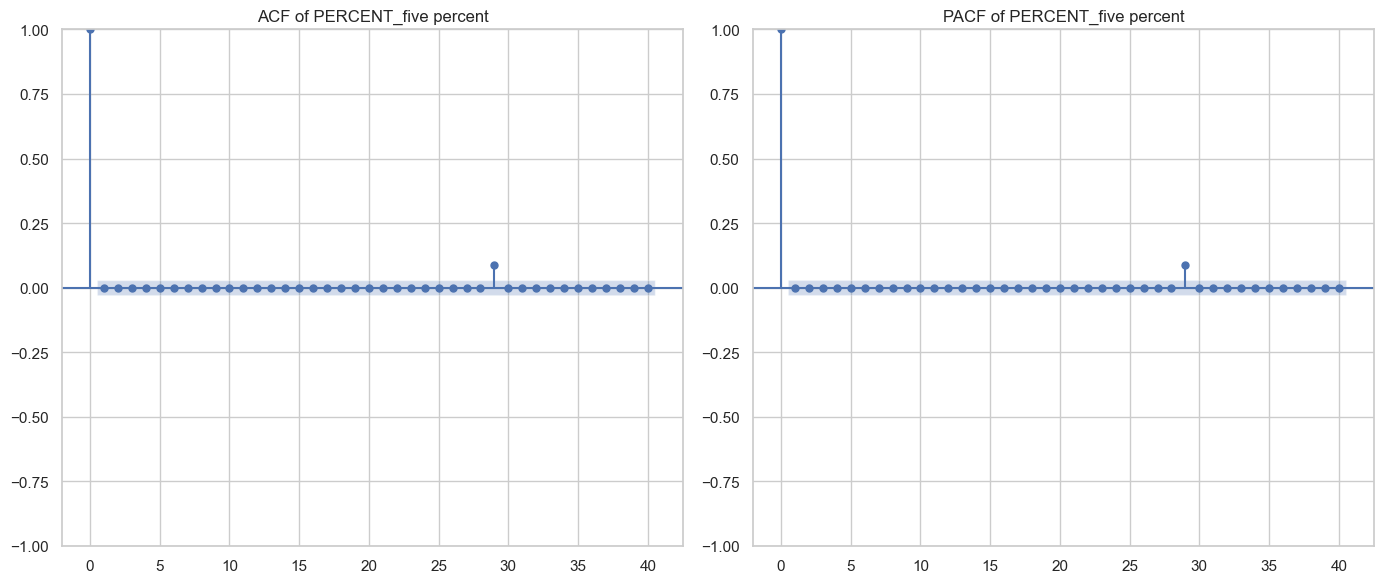

Processing column: PERCENT_eight percent


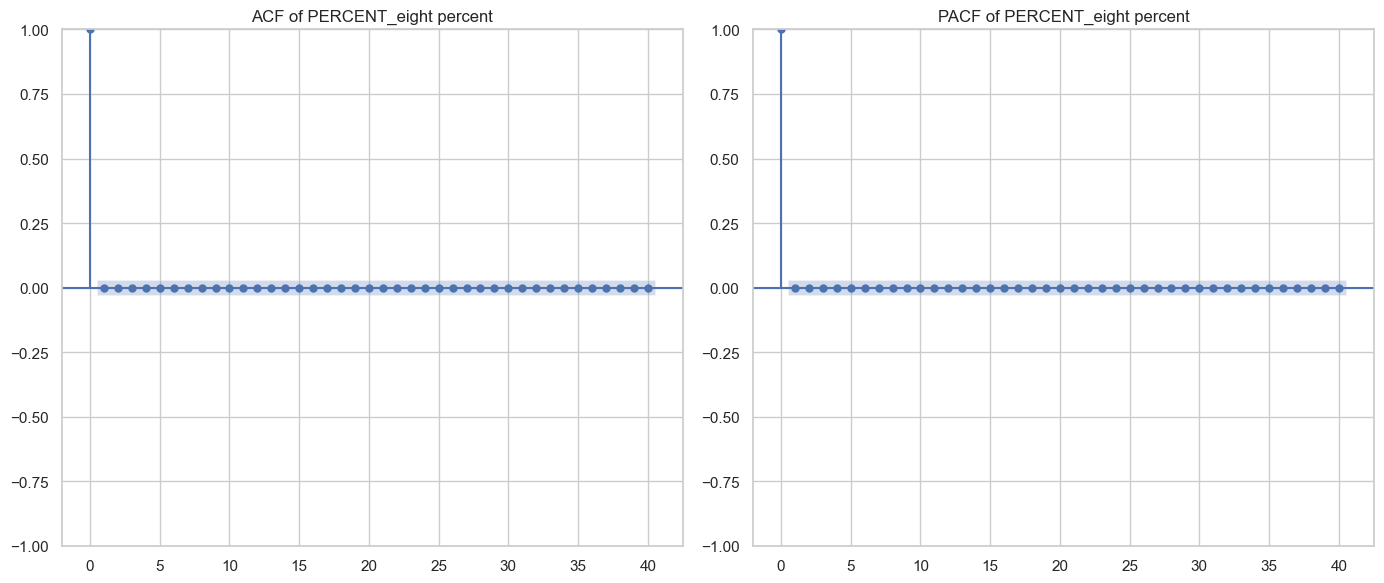

Processing column: PERCENT_three percent


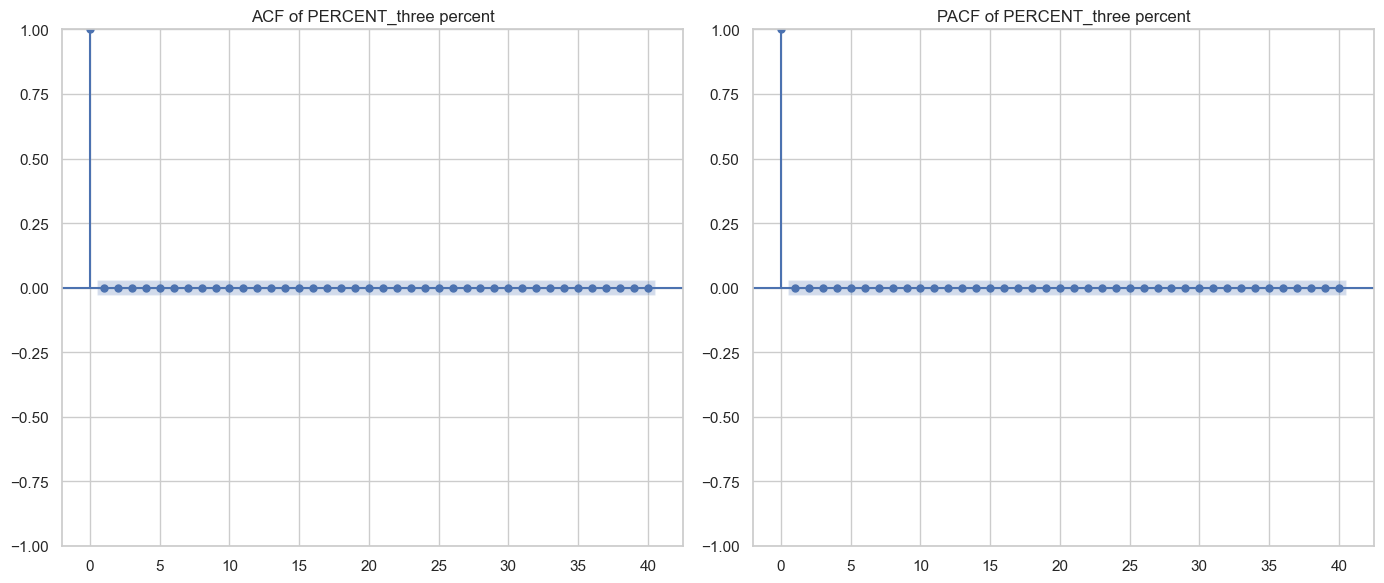

Processing column: PERCENT_four percent


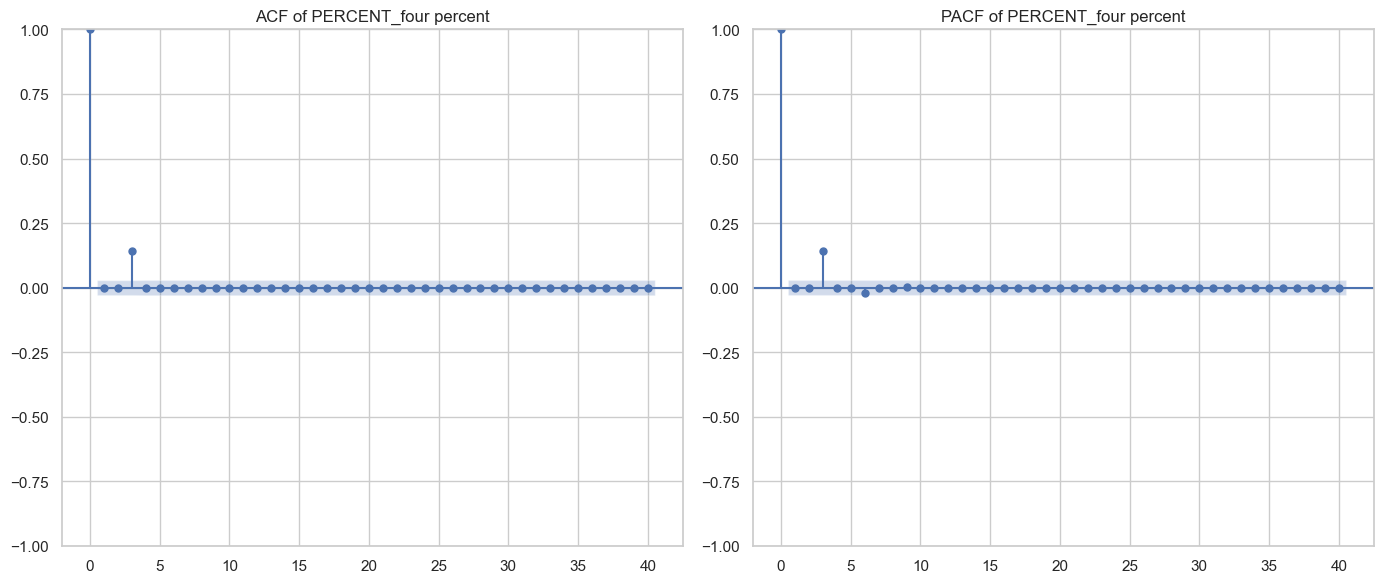

Processing column: PERSON_donald trump


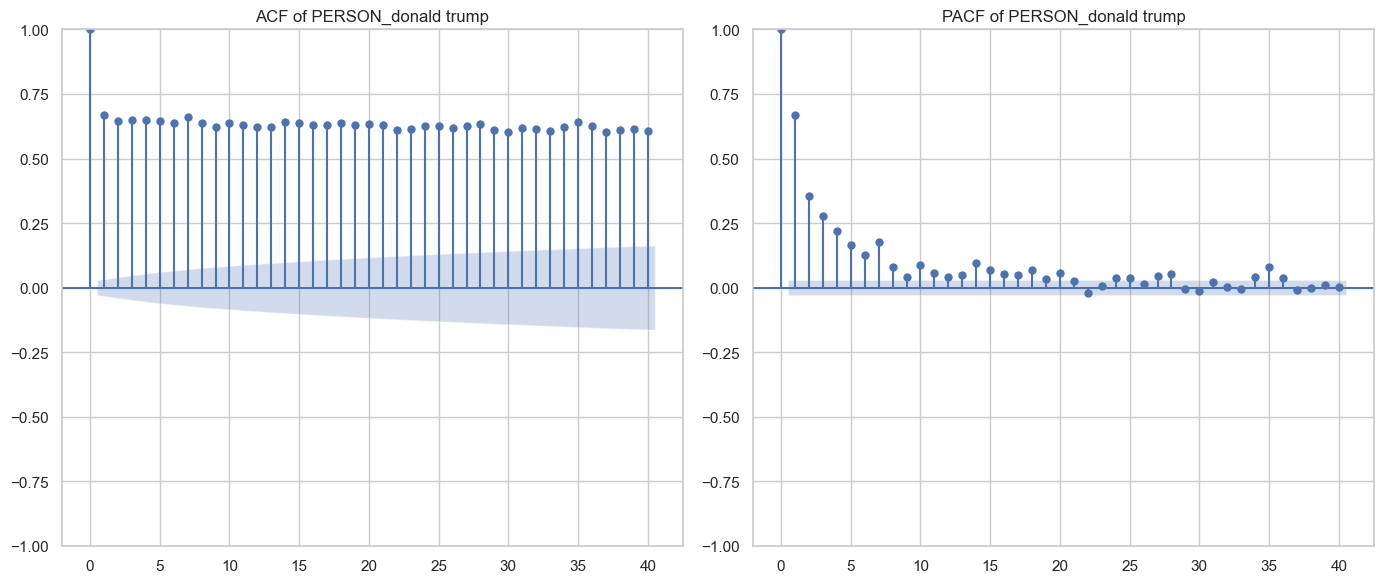

Processing column: PERSON_hillary clinton


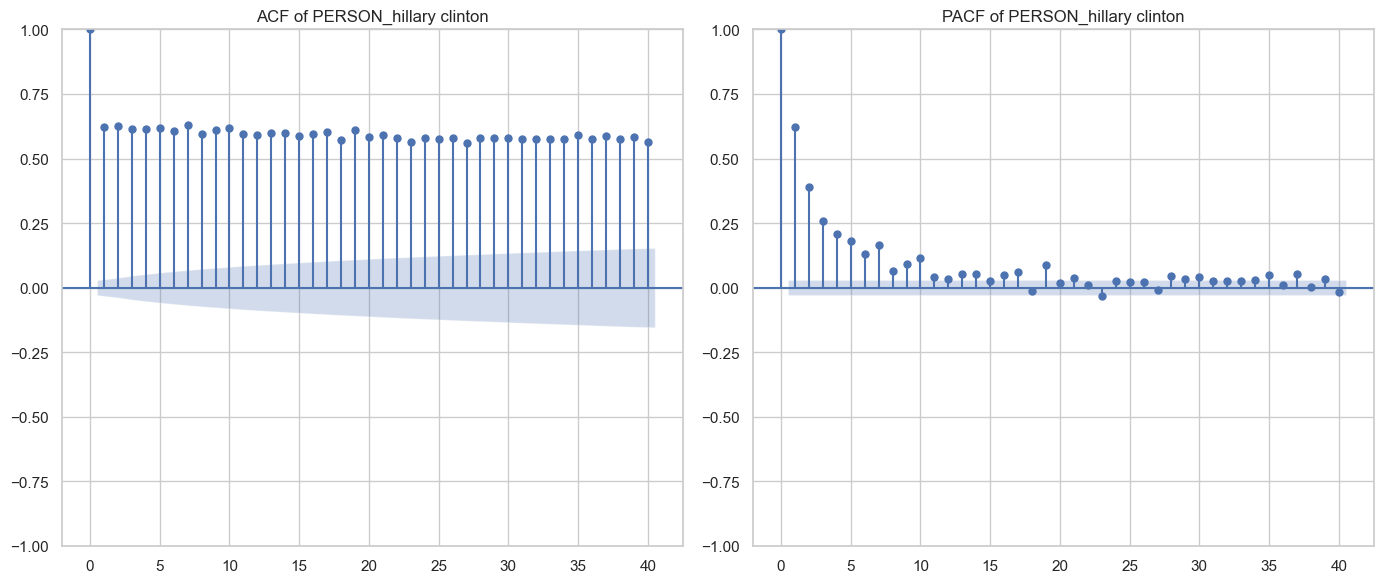

Processing column: PERSON_clinton


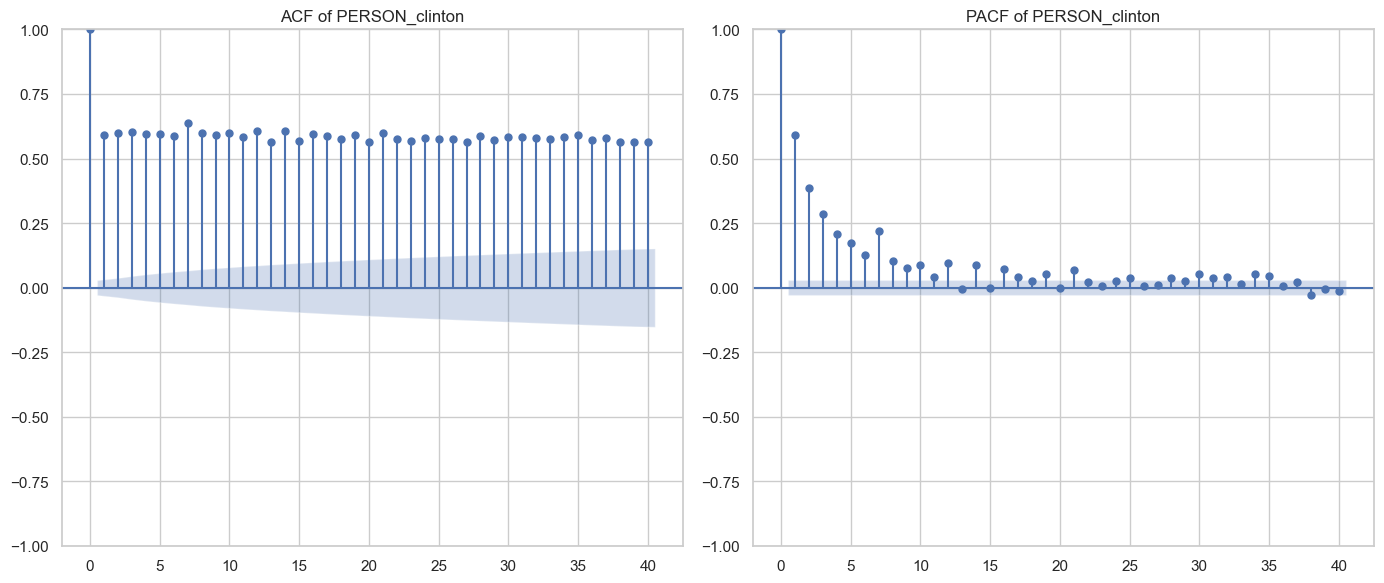

Processing column: PERSON_bernie


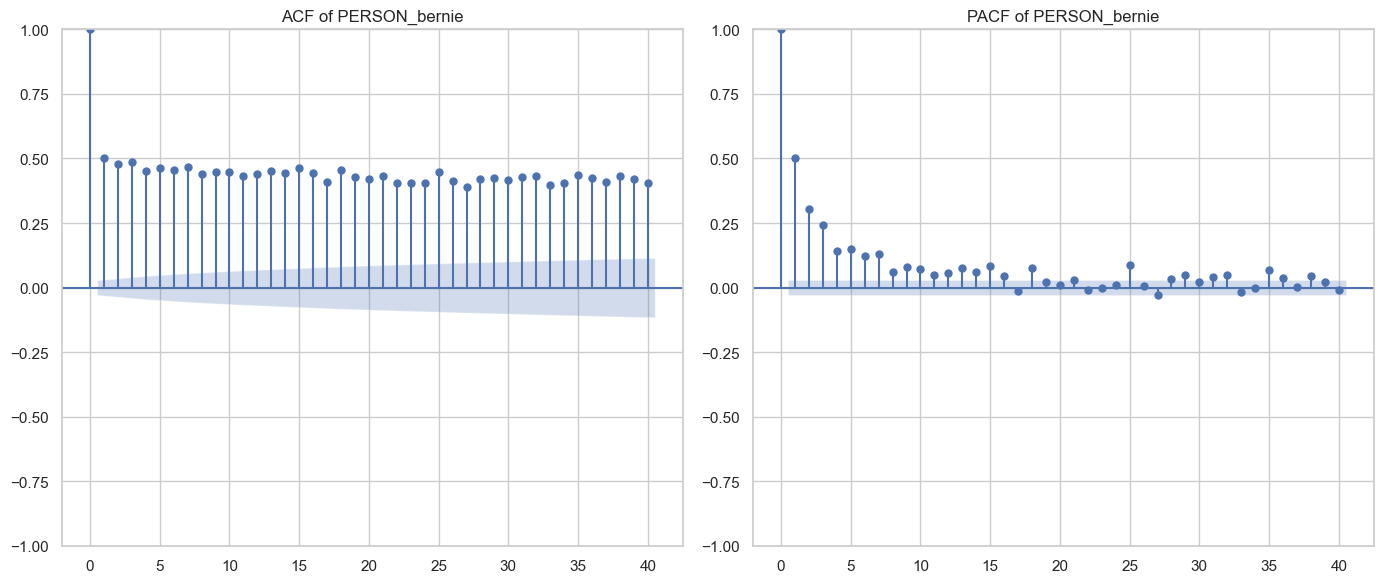

Processing column: PERSON_putin


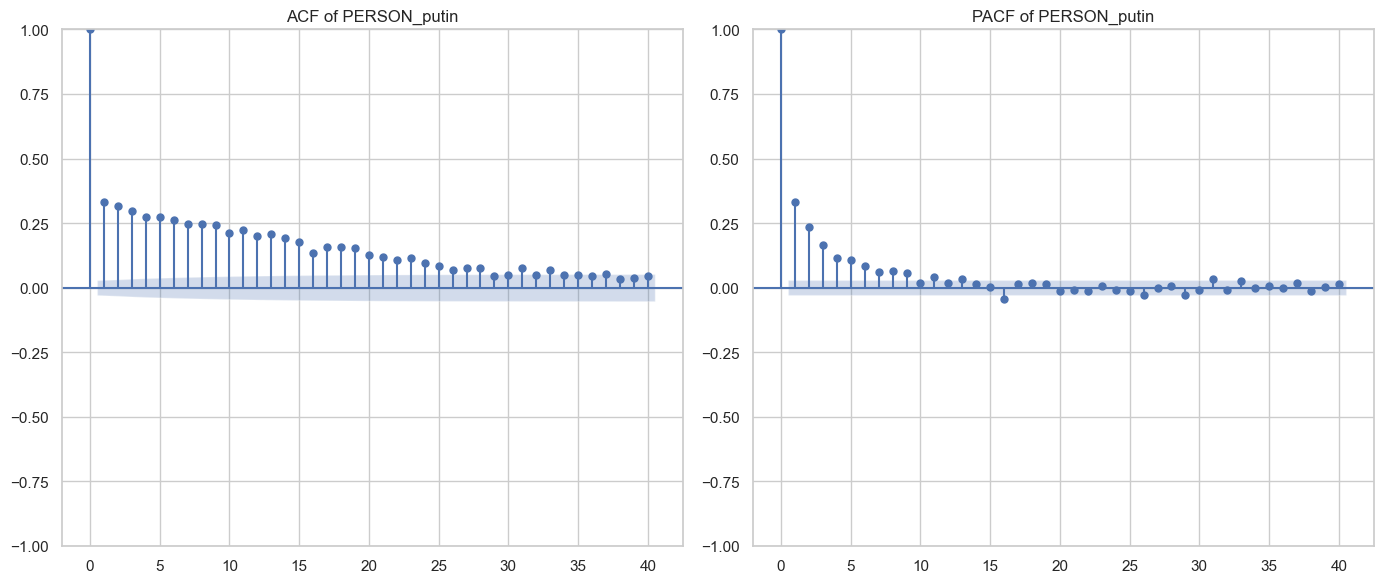

Processing column: PRODUCT_cole


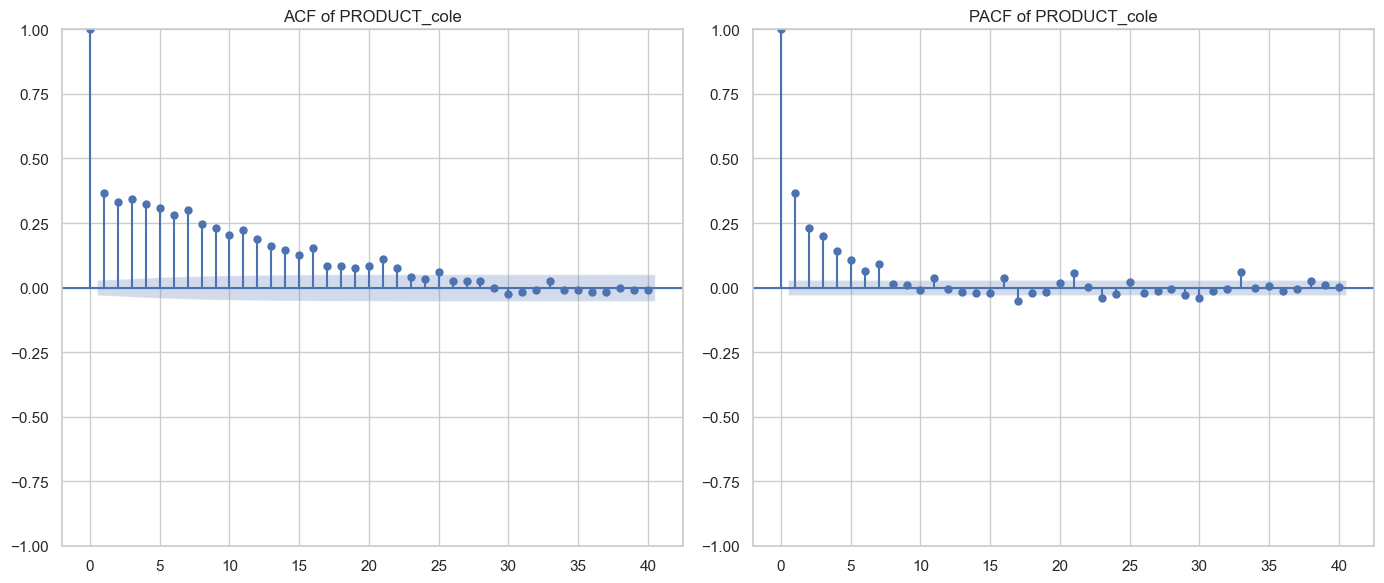

Processing column: PRODUCT_harry


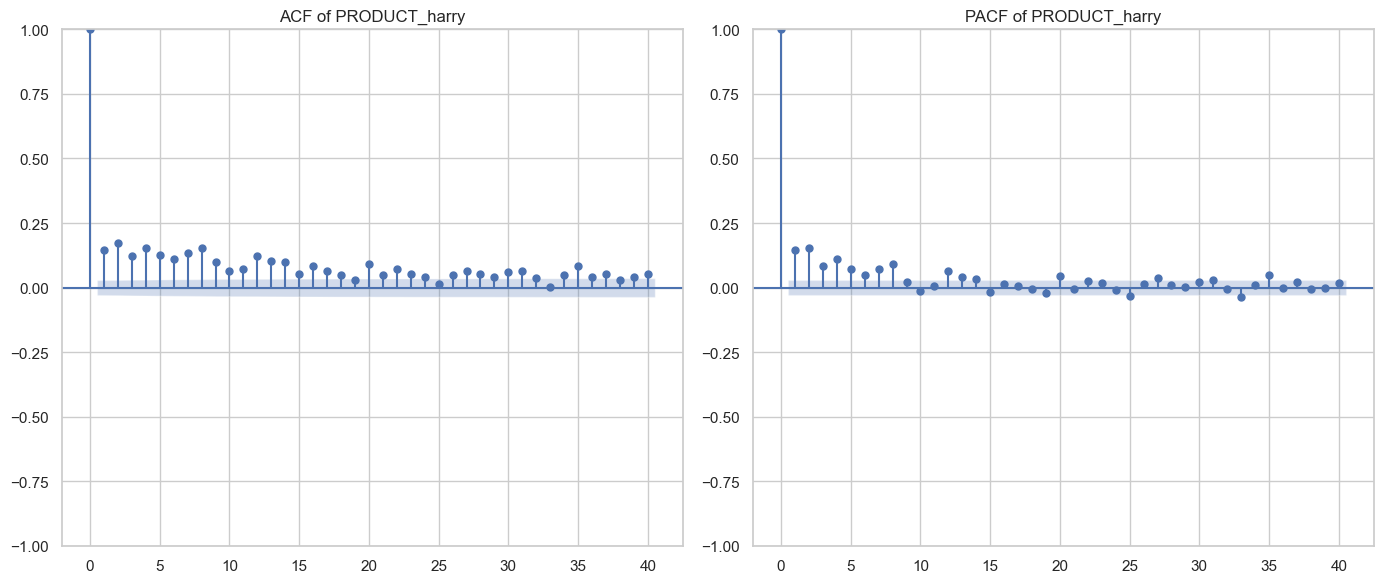

Processing column: PRODUCT_bmw


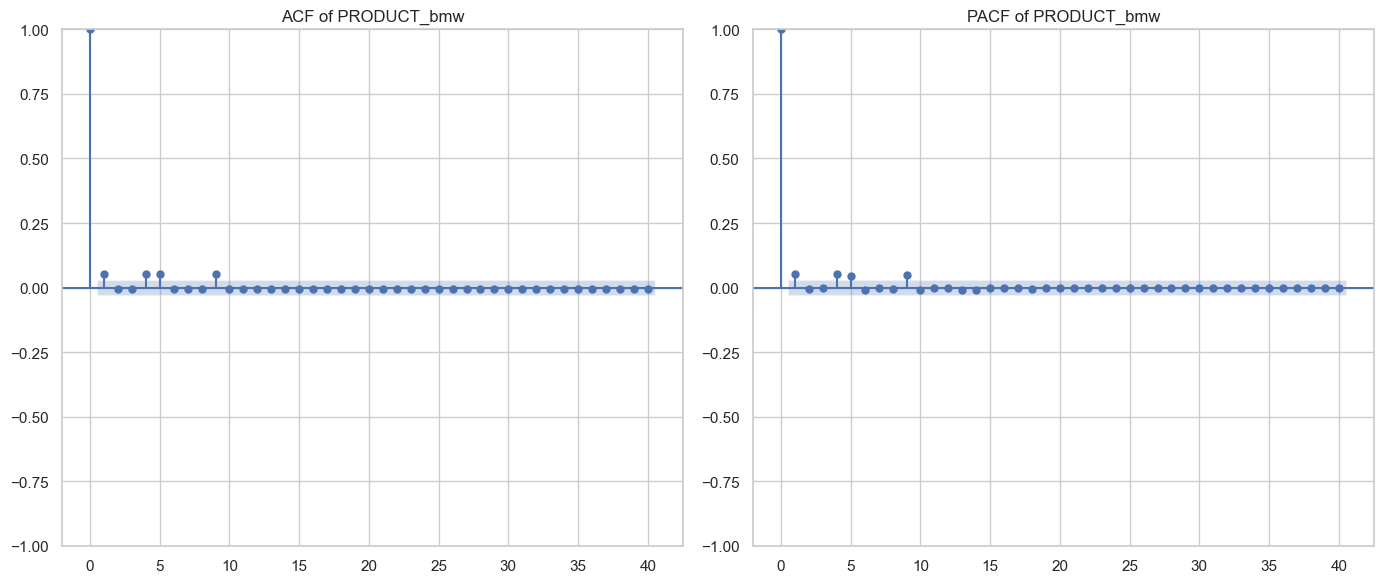

Processing column: PRODUCT_datesjustin


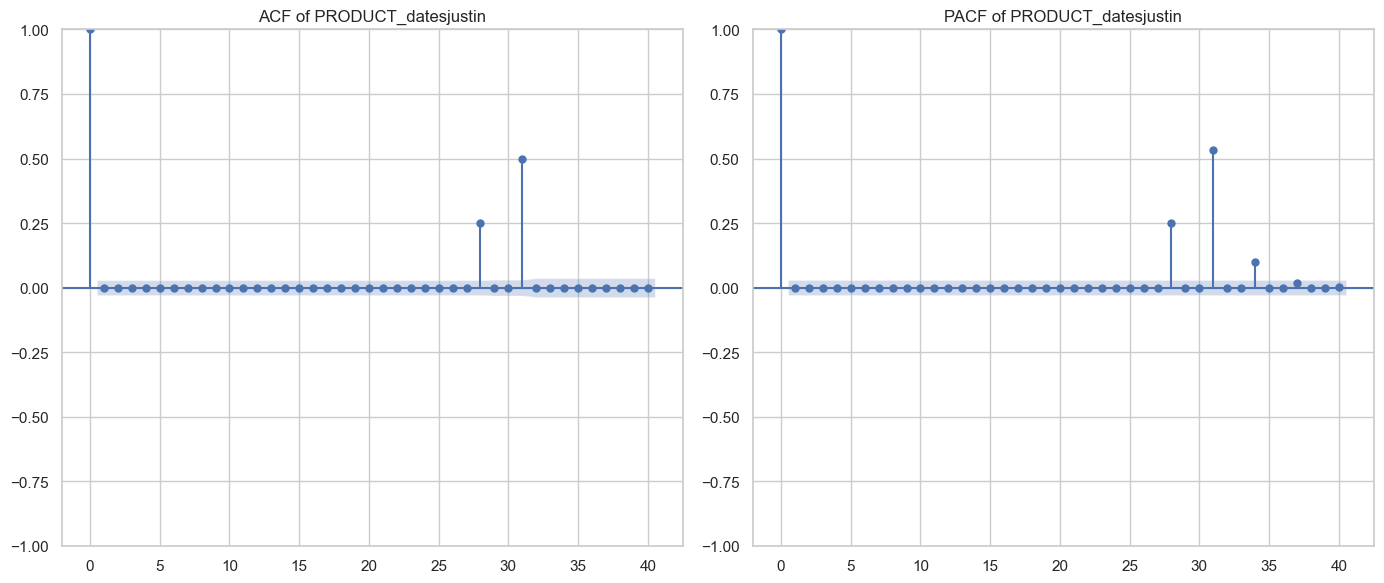

Processing column: PRODUCT_kalanick


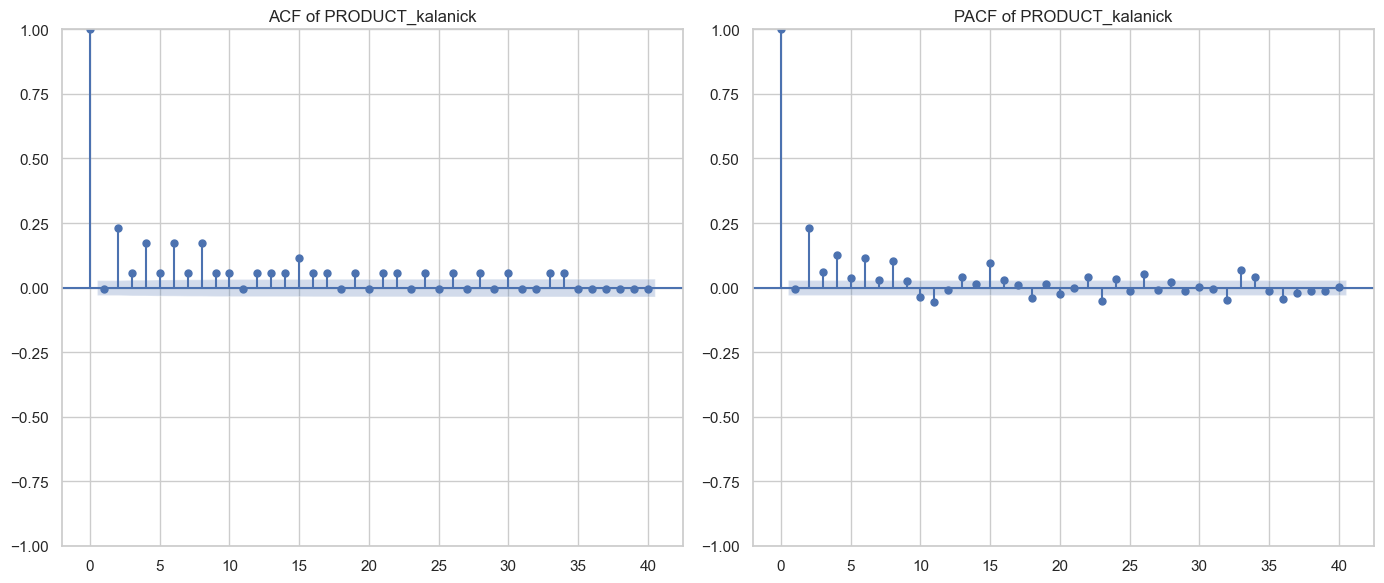

Processing column: QUANTITY_thousand mile


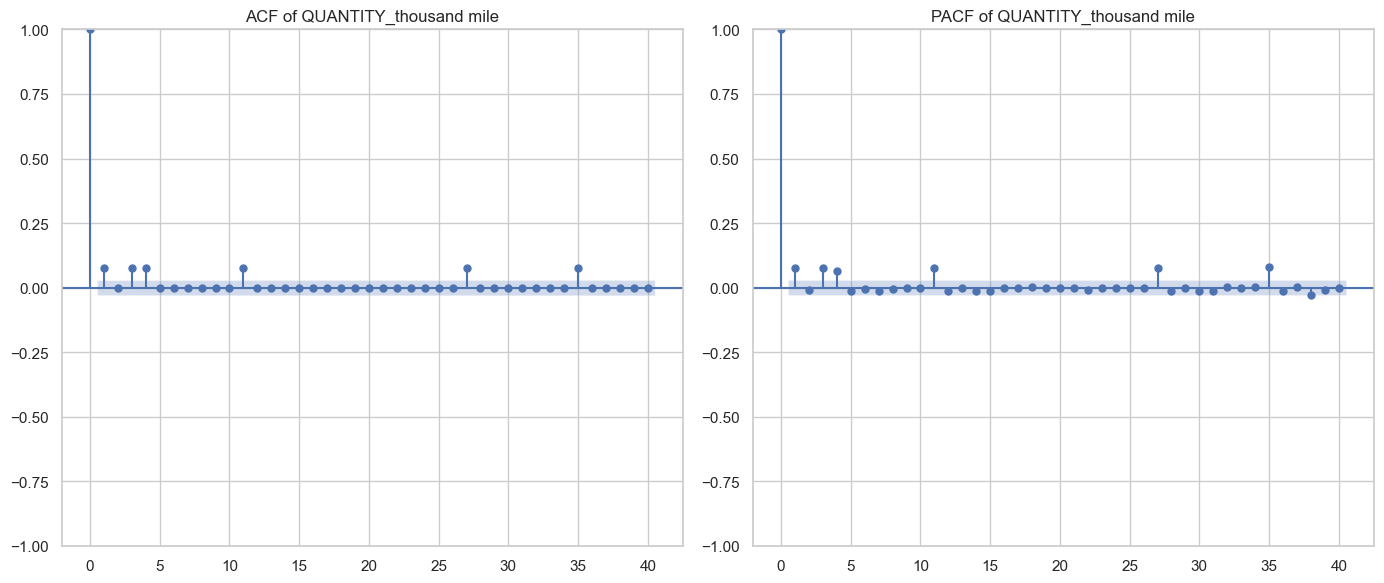

Processing column: QUANTITY_gallon


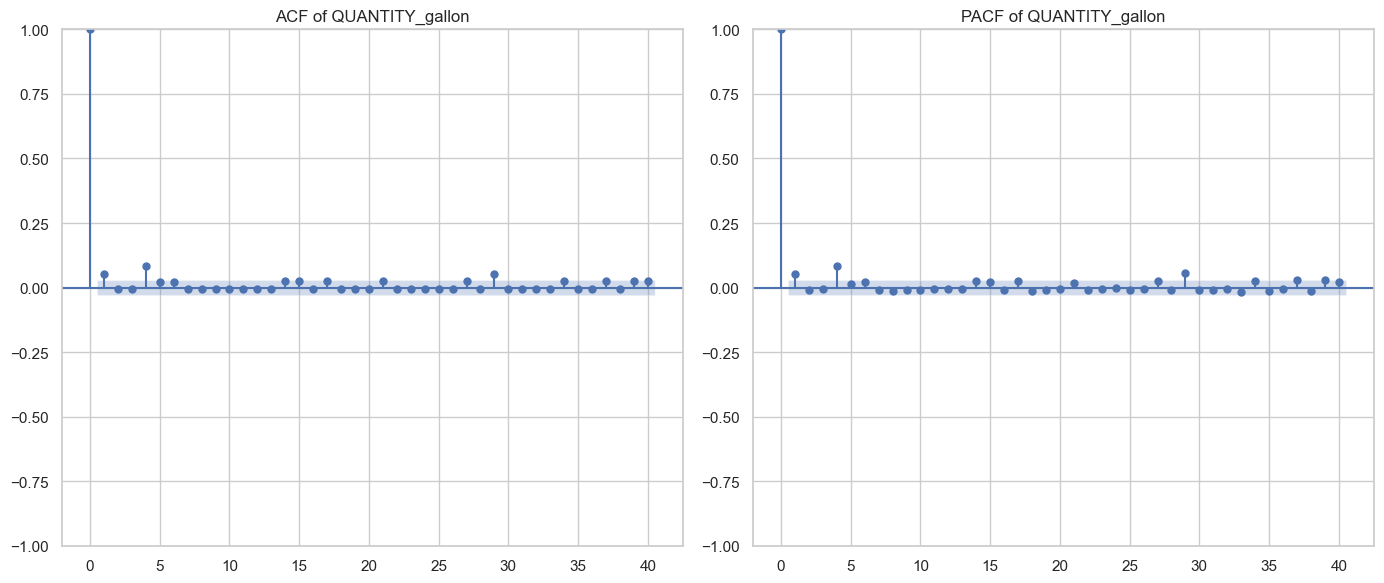

Processing column: QUANTITY_hundred mile


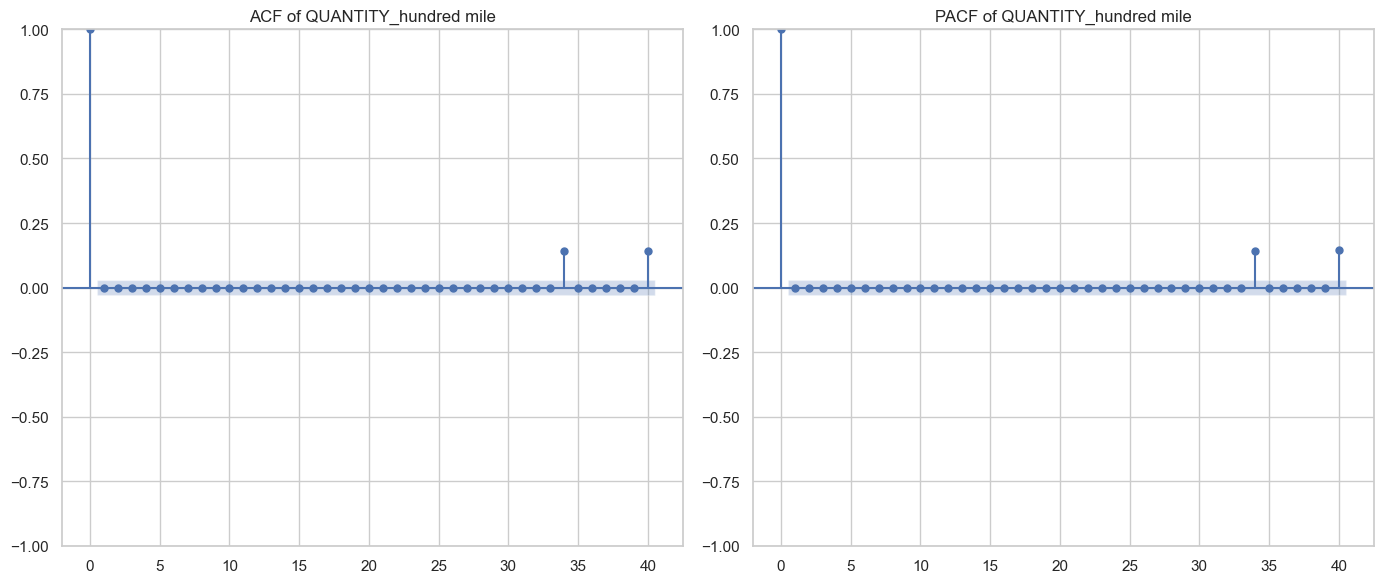

Processing column: QUANTITY_mile


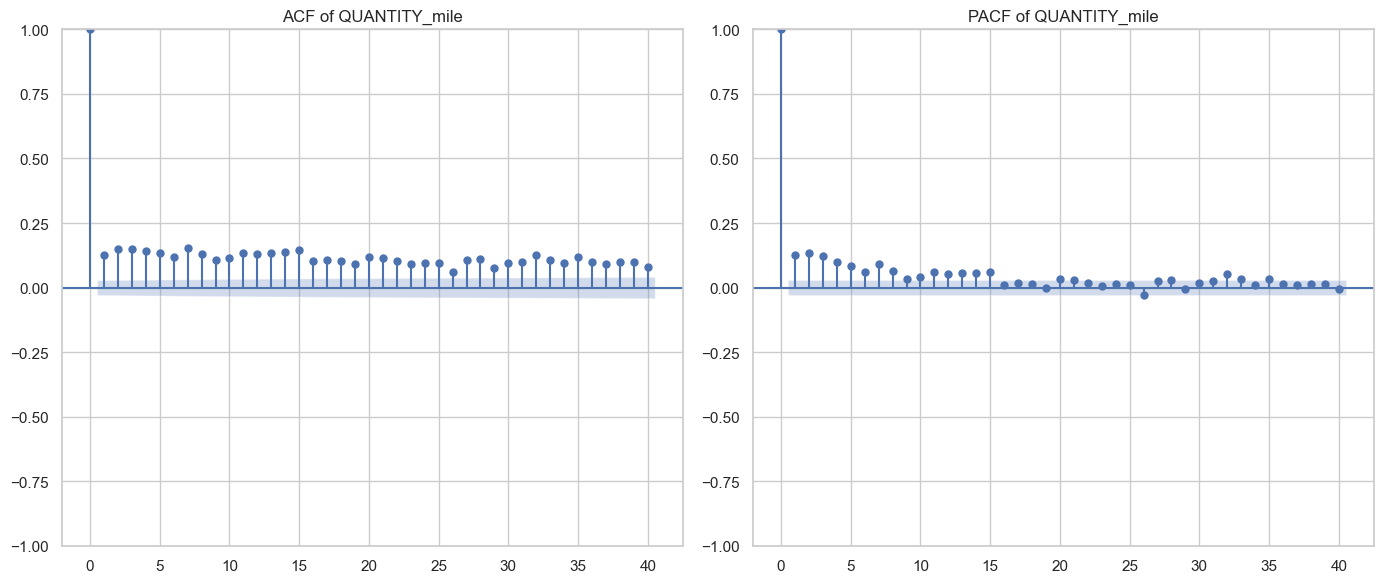

Processing column: QUANTITY_two mile


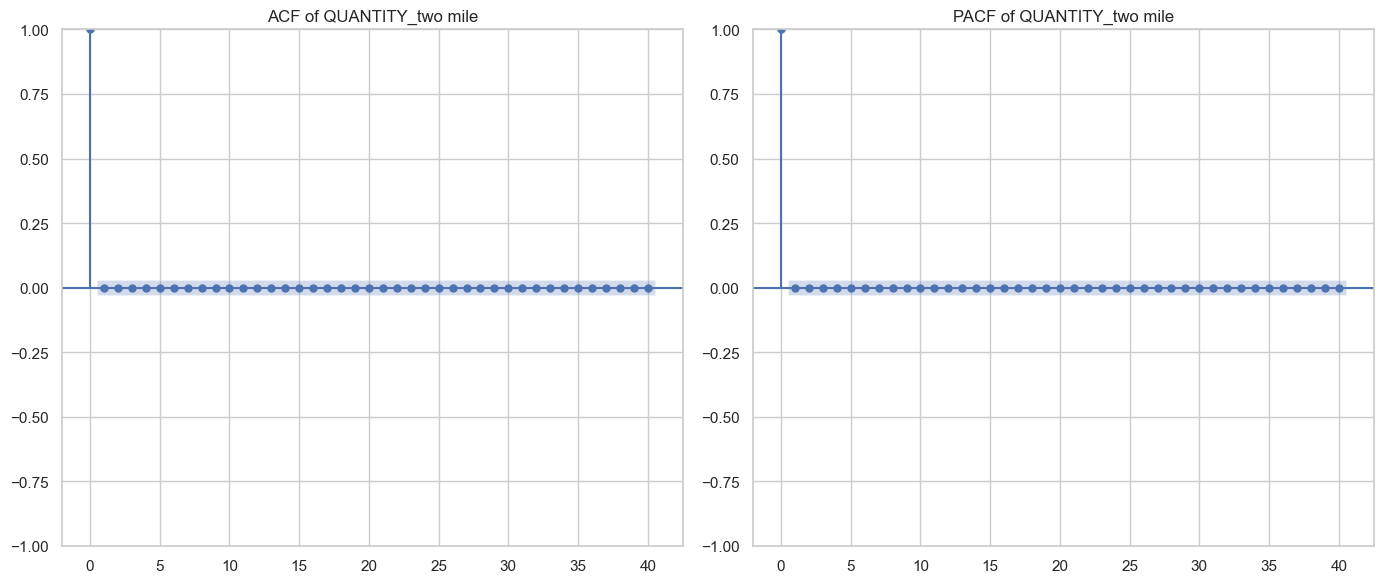

Processing column: TIME_morning


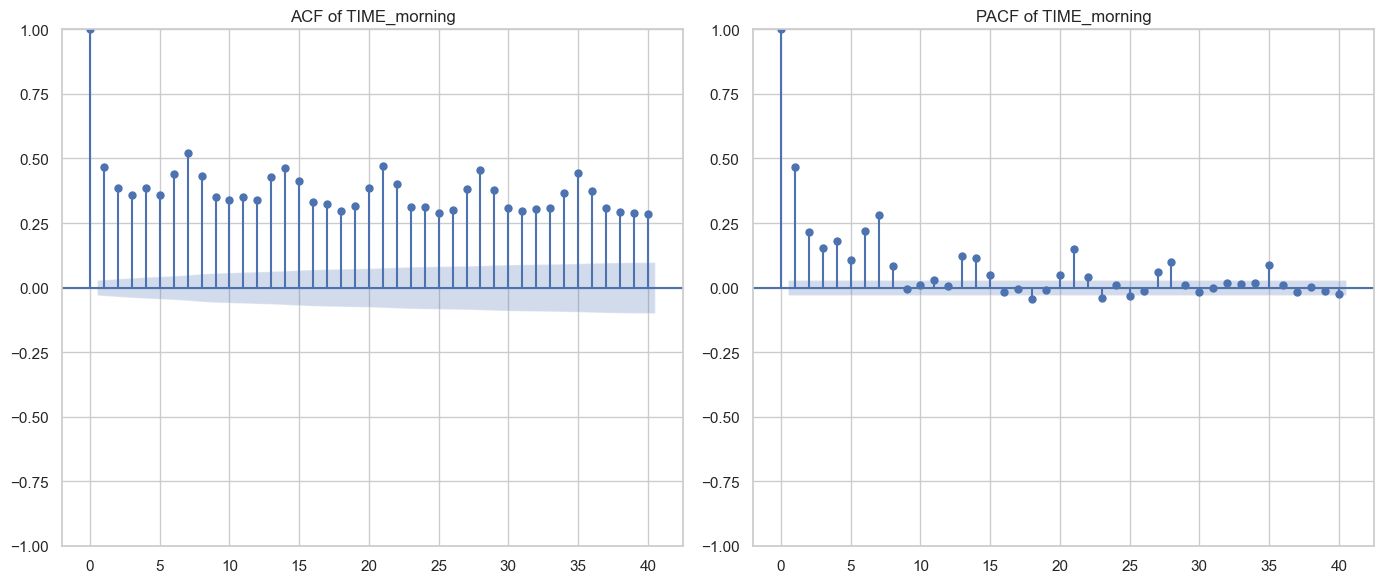

Processing column: TIME_night


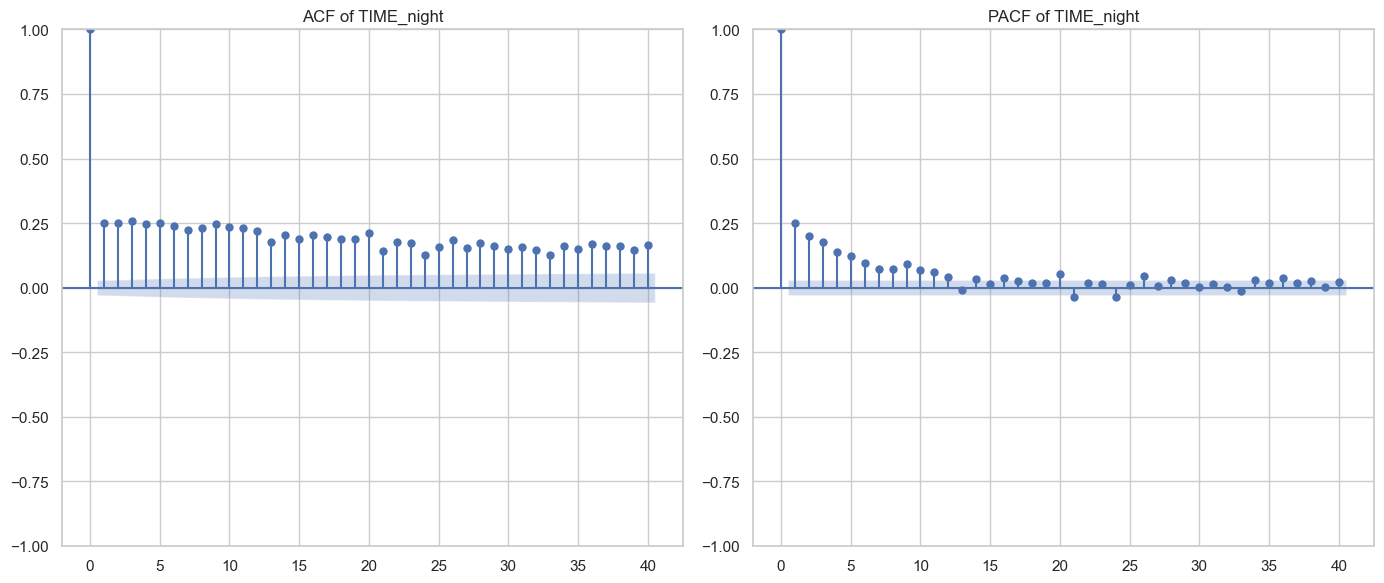

Processing column: TIME_hour


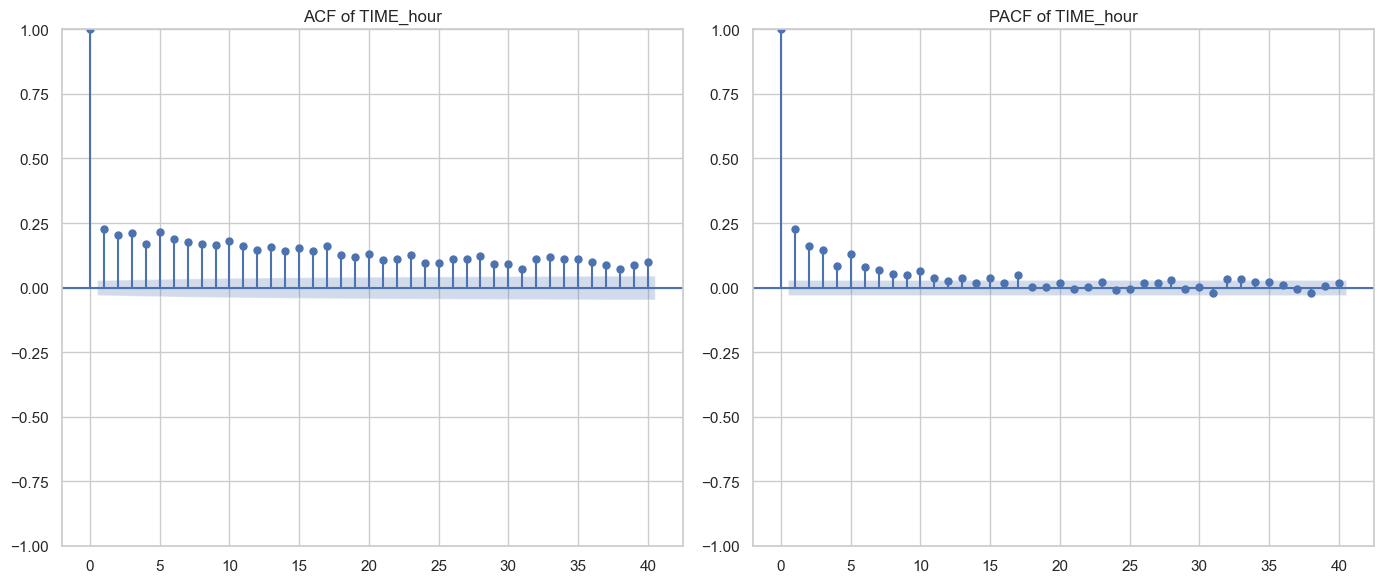

Processing column: TIME_tonight


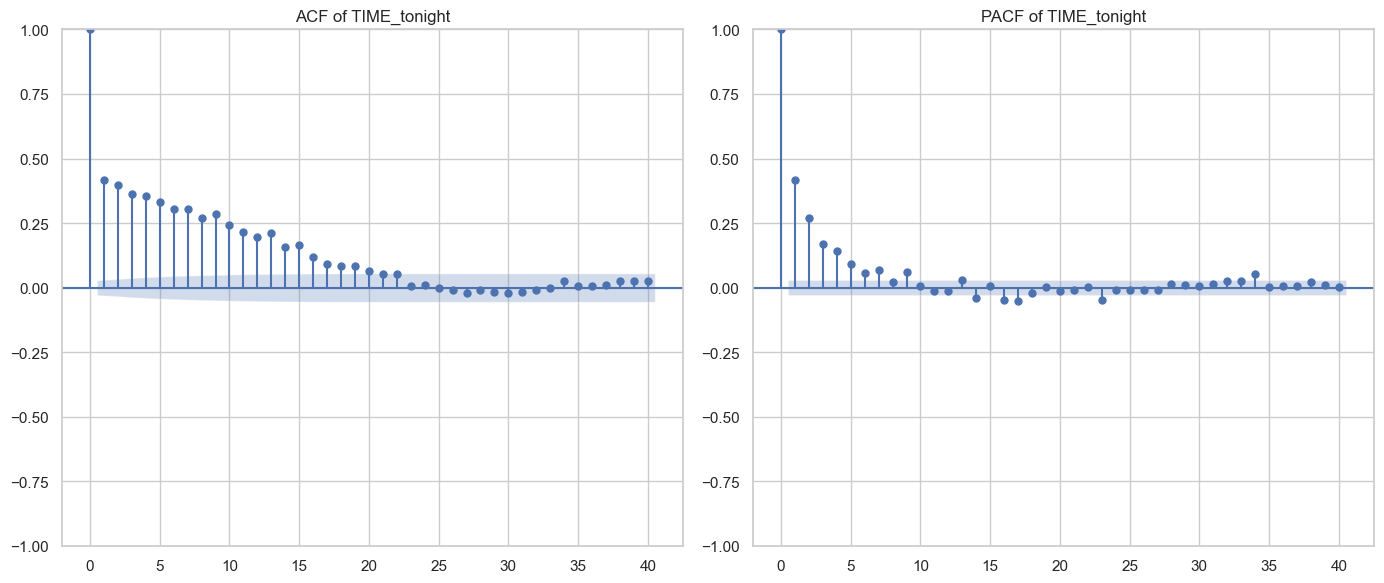

Processing column: TIME_evening


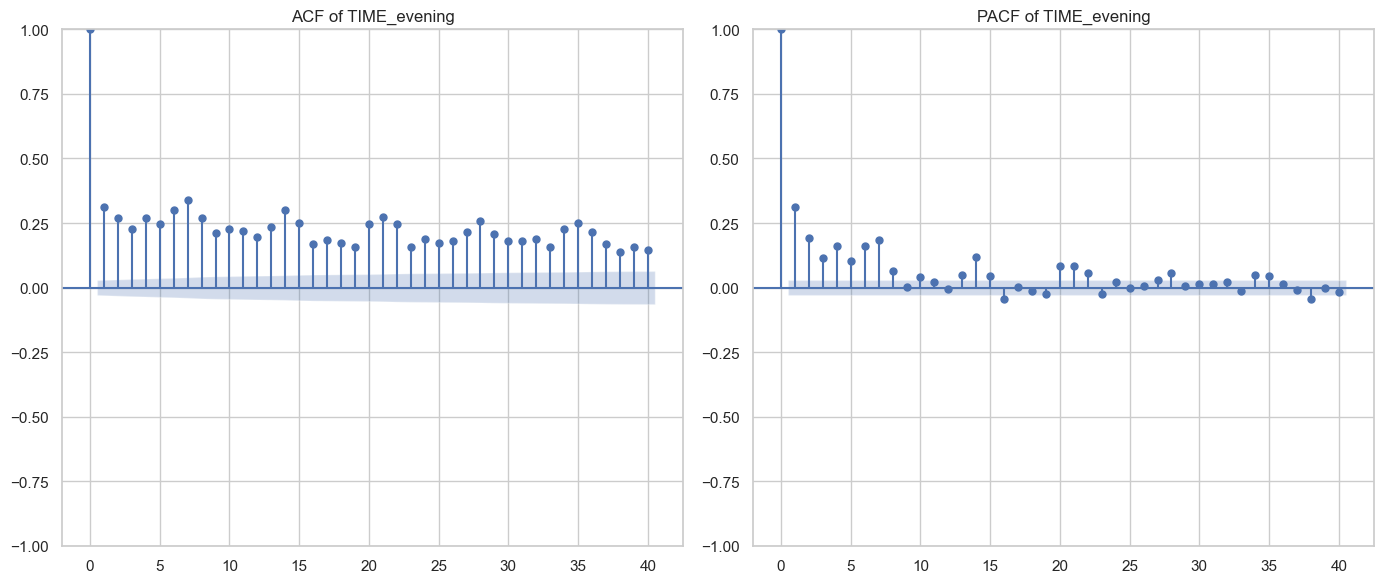

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

merged_df['time_index'] = merged_df['date']

merged_df.drop(columns=['date'],inplace=True)
# Convert 'Date' to index
merged_df.set_index('time_index', inplace=True)

# Iterate through numerical columns
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    print(f"Processing column: {column}")

    # Extract time series data
    time_series = merged_df[column]

    # Plot ACF
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plot_acf(time_series, ax=plt.gca(), lags=40)
    plt.title(f'ACF of {column}')

    # Plot PACF
    plt.subplot(1, 2, 2)
    plot_pacf(time_series, ax=plt.gca(), lags=40)
    plt.title(f'PACF of {column}')

    # Show plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Merge DataFrames on the date column
# merged_df = pd.merge(stocks_grouped_df, df_clean, on='date', how='inner')
# merged_df.columns

# Feature Engineering

Feature Selection First, Then Rolling Window
Scenario: You have a large number of features, and you want to reduce dimensionality or identify the most relevant features before applying the rolling window.
Advantages:
Efficiency: Reduces the computational load when applying rolling windows, especially if your feature set is large.

# create_time_features

In [26]:
def create_time_features(df: pd.DataFrame) -> pd.DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['week'] = df['date'].dt.isocalendar().week
    df['dayofweek'] = df['date'].dt.dayofweek
    return df

In [27]:
# Create time features
merged_df = create_time_features(merged_df)
merged_df

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\2296711472.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = df['date'].dt.year
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\2296711472.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['week'] = df['date'].dt.isocalendar().week
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\2296711472.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

date    Price     Open     High      Low     Vol.  Change %  \
0    2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
1    2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2    2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
3    2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
4    2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...         ...      ...      ...      ...      ...      ...       ...   
4949 2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
4950 2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
4951 2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
4952 2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
4953 2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

      vader_sentiment  textblob_sentiment  is_event  ...  TIME_morning  \
0              0.9946            0.129496       1.0  ...           0.0   
1              0.9946            0.129496       1.0  ...           0.0   
2              0.9946            0.129496       1.0  ...           0.0   
3              0.9946            0.129496       1.0  ...           0.0   
4              0.9946            0.129496       1.0  ...           0.0   
...               ...                 ...       ...  ...           ...   
4949          -0.8779            0.005556       1.0  ...           0.0   
4950          -0.8779            0.005556       1.0  ...           0.0   
4951          -0.8779            0.005556       1.0  ...           0.0   
4952          -0.8779            0.005556       1.0  ...           0.0   
4953          -0.8779            0.005556       1.0  ...           0.0   

      TIME_night  TIME_hour  TIME_tonight  TIME_evening  quarter  month  year  \
0            0.0        0.0           0.0           1.0        1      1  2012   
1            0.0        0.0           0.0           1.0        1      1  2012   
2            0.0        0.0           0.0           1.0        1      1  2012   
3            0.0        0.0           0.0           1.0        1      1  2012   
4            0.0        0.0           0.0           1.0        1      1  2012   
...          ...        ...           ...           ...      ...    ...   ...   
4949         0.0        0.0           0.0           0.0        3      8  2024   
4950         0.0        0.0           0.0           0.0        3      8  2024   
4951         0.0        0.0           0.0           0.0        3      8  2024   
4952         0.0        0.0           0.0           0.0        3      8  2024   
4953         0.0        0.0           0.0           0.0        3      8  2024   

      week  dayofweek  
0        1          1  
1        1          2  
2        1          3  
3        1          4  
4        1          5  
...    ...        ...  
4949    35          0  
4950    35          1  
4951    35          2  
4952    35          3  
4953    35          4  

[4954 rows x 103 columns]

In [28]:
merged_df['time_index'] = merged_df['date']
# merged_df.drop(columns=['date'],inplace=True)
# Convert 'Date' to index
merged_df.set_index('time_index', inplace=True)
merged_df

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\3572640782.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['time_index'] = merged_df['date']


date    Price     Open     High      Low     Vol.  Change %  \
time_index                                                                     
2012-01-03 2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
2012-01-04 2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2012-01-05 2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
2012-01-06 2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
2012-01-07 2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...               ...      ...      ...      ...      ...      ...       ...   
2024-08-26 2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
2024-08-27 2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
2024-08-28 2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
2024-08-29 2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
2024-08-30 2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

            vader_sentiment  textblob_sentiment  is_event  ...  TIME_morning  \
time_index                                                 ...                 
2012-01-03           0.9946            0.129496       1.0  ...           0.0   
2012-01-04           0.9946            0.129496       1.0  ...           0.0   
2012-01-05           0.9946            0.129496       1.0  ...           0.0   
2012-01-06           0.9946            0.129496       1.0  ...           0.0   
2012-01-07           0.9946            0.129496       1.0  ...           0.0   
...                     ...                 ...       ...  ...           ...   
2024-08-26          -0.8779            0.005556       1.0  ...           0.0   
2024-08-27          -0.8779            0.005556       1.0  ...           0.0   
2024-08-28          -0.8779            0.005556       1.0  ...           0.0   
2024-08-29          -0.8779            0.005556       1.0  ...           0.0   
2024-08-30          -0.8779            0.005556       1.0  ...           0.0   

            TIME_night  TIME_hour  TIME_tonight  TIME_evening  quarter  month  \
time_index                                                                      
2012-01-03         0.0        0.0           0.0           1.0        1      1   
2012-01-04         0.0        0.0           0.0           1.0        1      1   
2012-01-05         0.0        0.0           0.0           1.0        1      1   
2012-01-06         0.0        0.0           0.0           1.0        1      1   
2012-01-07         0.0        0.0           0.0           1.0        1      1   
...                ...        ...           ...           ...      ...    ...   
2024-08-26         0.0        0.0           0.0           0.0        3      8   
2024-08-27         0.0        0.0           0.0           0.0        3      8   
2024-08-28         0.0        0.0           0.0           0.0        3      8   
2024-08-29         0.0        0.0           0.0           0.0        3      8   
2024-08-30         0.0        0.0           0.0           0.0        3      8   

            year  week  dayofweek  
time_index                         
2012-01-03  2012     1          1  
2012-01-04  2012     1          2  
2012-01-05  2012     1          3  
2012-01-06  2012     1          4  
2012-01-07  2012     1          5  
...          ...   ...        ...  
2024-08-26  2024    35          0  
2024-08-27  2024    35          1  
2024-08-28  2024    35          2  
2024-08-29  2024    35          3  
2024-08-30  2024    35          4  

[4954 rows x 103 columns]

In [29]:
feat_df = merged_df.drop(columns=['date'])

In [30]:
print(f'Length of feat {len(feat_df.columns)}')

Length of feat 102


# Feature Engineering for Regressor Models
For regressor models, you can use a broader range of features:

Original Features: Like Price, Volume, High, Low, etc.
Lagged Features: Similar to time series models, but potentially using more lags and other transformations.
Sentiment Features: Features derived from text analysis (e.g., vader_sentiment, textblob_sentiment).
Categorical Features: Such as is_event, day_of_week, quarter, etc.
Interaction Features: Features created by combining other features (e.g., Price * Volume).

In [31]:
feat_df['Price_Volume'] = feat_df['Price'] * feat_df['Vol.']
feat_df['Open_High_Low'] = feat_df['High'] + feat_df['Low'] + feat_df['Open']
feat_df['Price_Range'] = feat_df['High'] - feat_df['Low']
feat_df['Price_Per_Volume'] = feat_df['Price'] / feat_df['Vol.']
feat_df['High_Low_Ratio'] = feat_df['High'] / feat_df['Low']
feat_df['Change_Volume'] = feat_df['Change %'] * feat_df['Vol.']
feat_df['Change_High'] = feat_df['Change %'] * feat_df['High']
feat_df['Change_Low'] = feat_df['Change %'] * feat_df['Low']
feat_df

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\1881606508.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feat_df['Price_Volume'] = feat_df['Price'] * feat_df['Vol.']
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\1881606508.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  feat_df['Open_High_Low'] = feat_df['High'] + feat_df['Low'] + feat_df['Open']
C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_8268\1881606508.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Price     Open     High      Low     Vol.  Change %  \
time_index                                                          
2012-01-03  5699.91  5572.28  5699.91  5572.28   778.53      2.29   
2012-01-04  5668.45  5699.91  5719.83  5646.36   696.94     -0.55   
2012-01-05  5624.26  5668.45  5689.33  5614.38   794.28     -0.78   
2012-01-06  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
2012-01-07  5649.68  5624.26  5682.78  5623.36   705.02      0.45   
...             ...      ...      ...      ...      ...       ...   
2024-08-26  8327.78  8288.00  8331.90  8288.00   614.51      0.48   
2024-08-27  8345.46  8327.78  8400.43  8327.78   772.31      0.21   
2024-08-28  8343.85  8345.46  8362.74  8322.28   608.50     -0.02   
2024-08-29  8379.64  8343.85  8392.40  8336.58   590.01      0.43   
2024-08-30  8376.63  8379.64  8414.37  8363.74  1080.00     -0.04   

            vader_sentiment  textblob_sentiment  is_event  topic_12  ...  \
time_index                                                           ...   
2012-01-03           0.9946            0.129496       1.0  0.534414  ...   
2012-01-04           0.9946            0.129496       1.0  0.534414  ...   
2012-01-05           0.9946            0.129496       1.0  0.534414  ...   
2012-01-06           0.9946            0.129496       1.0  0.534414  ...   
2012-01-07           0.9946            0.129496       1.0  0.534414  ...   
...                     ...                 ...       ...       ...  ...   
2024-08-26          -0.8779            0.005556       1.0  0.000000  ...   
2024-08-27          -0.8779            0.005556       1.0  0.000000  ...   
2024-08-28          -0.8779            0.005556       1.0  0.000000  ...   
2024-08-29          -0.8779            0.005556       1.0  0.000000  ...   
2024-08-30          -0.8779            0.005556       1.0  0.000000  ...   

            week  dayofweek  Price_Volume  Open_High_Low  Price_Range  \
time_index                                                              
2012-01-03     1          1  4.437551e+06       16844.47       127.63   
2012-01-04     1          2  3.950570e+06       17066.10        73.47   
2012-01-05     1          3  4.467237e+06       16972.16        74.95   
2012-01-06     1          4  3.983137e+06       16930.40        59.42   
2012-01-07     1          5  3.983137e+06       16930.40        59.42   
...          ...        ...           ...            ...          ...   
2024-08-26    35          0  5.117504e+06       24907.90        43.90   
2024-08-27    35          1  6.445282e+06       25055.99        72.65   
2024-08-28    35          2  5.077233e+06       25030.48        40.46   
2024-08-29    35          3  4.944071e+06       25072.83        55.82   
2024-08-30    35          4  9.046760e+06       25157.75        50.63   

            Price_Per_Volume  High_Low_Ratio  Change_Volume  Change_High  \
time_index                                                                 
2012-01-03          7.321375        1.022904      1782.8337   13052.7939   
2012-01-04          8.133340        1.013012      -383.3170   -3145.9065   
2012-01-05          7.080954        1.013350      -619.5384   -4437.6774   
2012-01-06          8.013503        1.010567       317.2590    2557.2510   
2012-01-07          8.013503        1.010567       317.2590    2557.2510   
...                      ...             ...            ...          ...   
2024-08-26         13.551903        1.005297       294.9648    3999.3120   
2024-08-27         10.805842        1.008724       162.1851    1764.0903   
2024-08-28         13.712161        1.004862       -12.1700    -167.2548   
2024-08-29         14.202539        1.006696       253.7043    3608.7320   
2024-08-30          7.756139        1.006054       -43.2000    -336.5748   

            Change_Low  
time_index              
2012-01-03  12760.5212  
2012-01-04  -3105.4980  
2012-01-05  -4379.2164  
2012-01-06   2530.5120  
2012-01-07   2530.5120  
...          

In [32]:
feat_df_copy = feat_df.copy()

A correlation matrix measures the linear relationship between pairs of variables (features). For time series forecasting, especially when dealing with multivariate data (like stock prices combined with news sentiment), it helps identify which features have a strong linear relationship with the target variable (e.g., future stock prices).

# ADF Test: Best for ensuring the stationarity of your time series data, which is crucial for certain types of forecasting models.
Correlation Matrix: Best for selecting relevant features when working with multivariate time series data, especially when combining stock prices with other indicators like sentiment.

In [33]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return result[1]

The ADF test is used to check for stationarity in a time series. Stationarity is a crucial property in time series forecasting, particularly for models like ARIMA, where non-stationary data can lead to poor model performance.

In [34]:
selected_features = []
# Iterate through each column in the DataFrame
for column in feat_df.columns:
    # Check if the column is constant
    if feat_df[column].nunique() > 1:
        p_value = adf_test(feat_df[column])
        if p_value < 0.05:  # Assuming 5% significance level
            selected_features.append(column)
    else:
        print(f"Skipping constant column: {column}")

selected_features

['Vol.',
 'Change %',
 'vader_sentiment',
 'textblob_sentiment',
 'is_event',
 'topic_15',
 'topic_4',
 'topic_1',
 'topic_8',
 'topic_7',
 'topic_10',
 'topic_6',
 'topic_9',
 'topic_3',
 'topic_0',
 'CARDINAL_one',
 'CARDINAL_two',
 'CARDINAL_million',
 'CARDINAL_three',
 'CARDINAL_six',
 'EVENT_vietnam',
 'EVENT_wwii',
 'EVENT_super bowl',
 'EVENT_hurricane katrina',
 'EVENT_iraq war',
 'FAC_guantanamo',
 'FAC_uva',
 'FAC_notre dame',
 'FAC_north london',
 'FAC_nikki haley',
 'GPE_london',
 'GPE_russia',
 'GPE_america',
 'GPE_california',
 'GPE_china',
 'LAW_rico',
 'LAW_camilla wear',
 'LAW_crown new',
 'LAW_superfund',
 'LAW_west ham',
 'LOC_europe',
 'LOC_middle east',
 'LOC_africa',
 'LOC_caribbean',
 'LOC_asia',
 'MONEY_mike penny',
 'MONEY_million dollar',
 'MONEY_billion dollar',
 'MONEY_thousand dollar',
 'MONEY_every penny',
 'NORP_american',
 'NORP_republican',
 'NORP_democrat',
 'NORP_russian',
 'NORP_muslim',
 'ORDINAL_first',
 'ORDINAL_second',
 'ORDINAL_third',
 'ORDIN


# Correlation-Based Feature Selection
Use Case: Identify features that have a strong correlation with the target variable (e.g., Price, Change %) while minimizing multicollinearity.
Implementation: Calculate the correlation between each feature and the target variable, then select features that have high correlation with the target and low correlation with each other.
Why: This method is particularly useful in financial data where you often want to remove redundant features (e.g., High, Low, Open might be highly correlated).

In [35]:

# Calculate the correlation matrix
corr_matrix = feat_df[selected_features + ["Price"]].corr()
corr_target = abs(corr_matrix["Price"])  # Example: Target is 'Price'

# Select features with correlation above a threshold, e.g., 0.1
relevant_features = corr_target[corr_target > 0.1]
selected_columns = relevant_features.index.tolist()

selected_columns

['vader_sentiment',
 'textblob_sentiment',
 'is_event',
 'topic_15',
 'CARDINAL_one',
 'CARDINAL_two',
 'CARDINAL_million',
 'CARDINAL_three',
 'FAC_north london',
 'FAC_nikki haley',
 'GPE_russia',
 'GPE_america',
 'LOC_europe',
 'LOC_africa',
 'NORP_american',
 'ORDINAL_first',
 'ORDINAL_second',
 'PERSON_bernie',
 'PERSON_putin',
 'QUANTITY_mile',
 'TIME_night',
 'TIME_hour',
 'Price_Volume',
 'Price_Range',
 'Price_Per_Volume',
 'High_Low_Ratio',
 'Price']

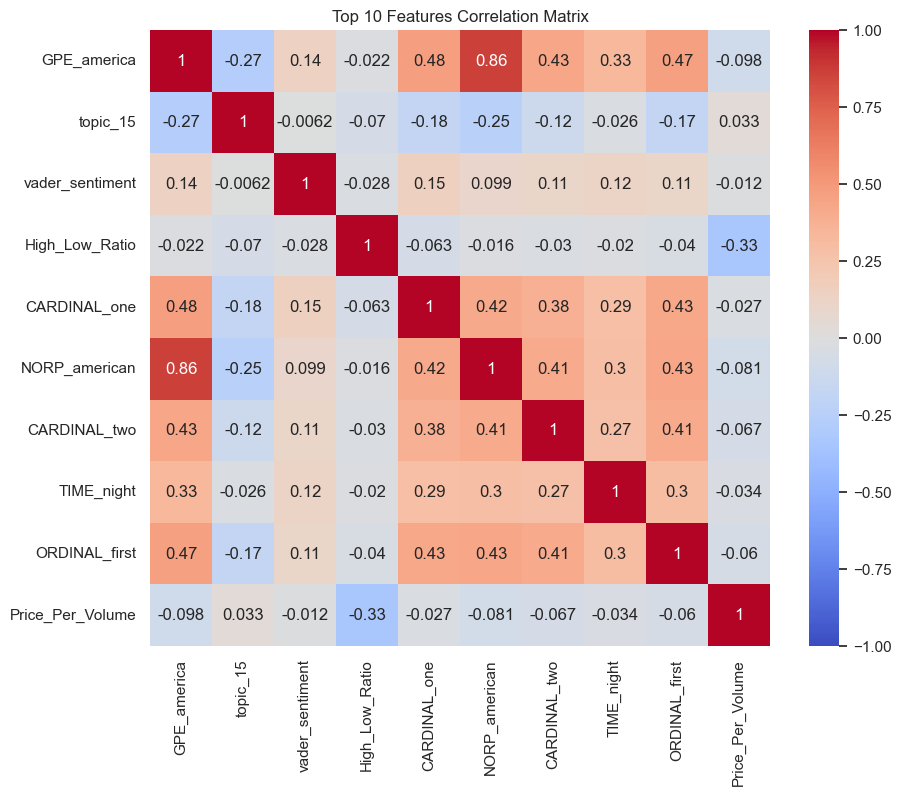

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `feat_df` is your DataFrame and 'Price' is the target variable
# Step 1: Calculate the correlation matrix
corr_matrix = feat_df[selected_features + ["Price"]].corr()

# Step 2: Select the top 10 features most correlated with 'Price'
corr_target = abs(corr_matrix["Price"])
top_10_features = corr_target.sort_values(ascending=False).index[1:11]  # [1:11] excludes 'Price' itself

# Step 3: Create a correlation matrix of these top 10 features
top_corr_matrix = corr_matrix.loc[top_10_features, top_10_features]

# Step 4: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Top 10 Features Correlation Matrix")
plt.show()


In [37]:
len(selected_columns)

27

# These features might have shown high multicollinearity with the target variable (Price) or with each other. For example, High and Low are often highly correlated with Open and Close prices.
In feature selection, if two or more features are highly correlated, one might be removed to reduce redundancy and improve model interpretability and performance. This is because highly correlated features do not provide additional information to the model and can sometimes lead to overfitting.

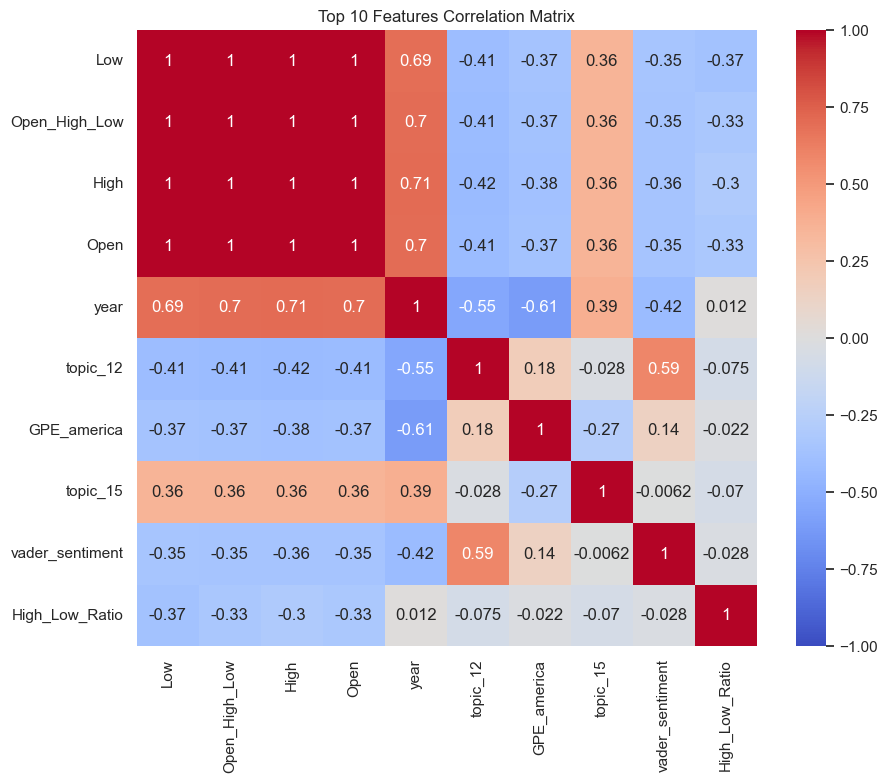

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `feat_df` is your DataFrame and 'Price' is the target variable
# Step 1: Calculate the correlation matrix
corr_matrix = feat_df.corr()

# Step 2: Select the top 10 features most correlated with 'Price'
corr_target = abs(corr_matrix["Price"])
top_10_features = corr_target.sort_values(ascending=False).index[1:11]  # [1:11] excludes 'Price' itself

# Step 3: Create a correlation matrix of these top 10 features
top_corr_matrix = corr_matrix.loc[top_10_features, top_10_features]

# Step 4: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Top 10 Features Correlation Matrix")
plt.show()


##  Choose lag features for - Selected Columns which are correlated
## Stocks - As it will be continuous Data & Rolling Average will be useful
## News - As some news impact stays for morning/next day or even for a week/month and it affects the buy/sell stock trading

### Stocks: Use short-term and medium-term lags along with rolling averages to capture trends and seasonality.
### News: Use immediate and longer-term lags along with rolling averages to capture the impact of news on stock prices.

# generate_lag_features

In [39]:
merged_df = feat_df[selected_columns]
merged_df

vader_sentiment  textblob_sentiment  is_event  topic_15  \
time_index                                                            
2012-01-03           0.9946            0.129496       1.0  0.129553   
2012-01-04           0.9946            0.129496       1.0  0.129553   
2012-01-05           0.9946            0.129496       1.0  0.129553   
2012-01-06           0.9946            0.129496       1.0  0.129553   
2012-01-07           0.9946            0.129496       1.0  0.129553   
...                     ...                 ...       ...       ...   
2024-08-26          -0.8779            0.005556       1.0  0.000000   
2024-08-27          -0.8779            0.005556       1.0  0.000000   
2024-08-28          -0.8779            0.005556       1.0  0.000000   
2024-08-29          -0.8779            0.005556       1.0  0.000000   
2024-08-30          -0.8779            0.005556       1.0  0.000000   

            CARDINAL_one  CARDINAL_two  CARDINAL_million  CARDINAL_three  \
time_index                                                                 
2012-01-03           1.0           1.0               0.0             0.0   
2012-01-04           1.0           1.0               0.0             0.0   
2012-01-05           1.0           1.0               0.0             0.0   
2012-01-06           1.0           1.0               0.0             0.0   
2012-01-07           1.0           1.0               0.0             0.0   
...                  ...           ...               ...             ...   
2024-08-26           1.0           0.0               0.0             0.0   
2024-08-27           1.0           0.0               0.0             0.0   
2024-08-28           1.0           0.0               0.0             0.0   
2024-08-29           1.0           0.0               0.0             0.0   
2024-08-30           1.0           0.0               0.0             0.0   

            FAC_north london  FAC_nikki haley  ...  PERSON_bernie  \
time_index                                     ...                  
2012-01-03               0.0              0.0  ...            0.0   
2012-01-04               0.0              0.0  ...            0.0   
2012-01-05               0.0              0.0  ...            0.0   
2012-01-06               0.0              0.0  ...            0.0   
2012-01-07               0.0              0.0  ...            0.0   
...                      ...              ...  ...            ...   
2024-08-26               0.0              1.0  ...            0.0   
2024-08-27               0.0              1.0  ...            0.0   
2024-08-28               0.0              1.0  ...            0.0   
2024-08-29               0.0              1.0  ...            0.0   
2024-08-30               0.0              1.0  ...            0.0   

            PERSON_putin  QUANTITY_mile  TIME_night  TIME_hour  Price_Volume  \
time_index                                                                     
2012-01-03           0.0            1.0         0.0        0.0  4.437551e+06   
2012-01-04           0.0            1.0         0.0        0.0  3.950570e+06   
2012-01-05           0.0            1.0         0.0        0.0  4.467237e+06   
2012-01-06           0.0            1.0         0.0        0.0  3.983137e+06   
2012-01-07           0.0            1.0         0.0        0.0  3.983137e+06   
...                  ...            ...         ...        ...           ...   
2024-08-26           0.0            0.0         0.0        0.0  5.117504e+06   
2024-08-27           0.0            0.0         0.0        0.0  6.445282e+06   
2024-08-28           0.0            0.0         0.0        0.0  5.077233e+06   
2024-08-29           0.0            0.0         0.0        0.0  4.944071e+06   
2024-08-30           0.0            0.0         0.0        0.0  9.046760e+06   

            Price_Range  Price_Per_Volume  High_Low_Ratio    Price  
time_index                                                          
2012-01-03       127.6

In [40]:
merged_df_copy = merged_df.copy()


In [41]:
merged_df = merged_df[selected_columns]

In [42]:
def generate_lag_features(df: pd.DataFrame, target_col: str) -> pd.DataFrame:
    df = df.copy()  # Avoid modifying the original DataFrame
    df[target_col+'_lag_1d'] = df[target_col].shift(1)
    df[target_col+'_lag_2d'] = df[target_col].shift(2)
    df[target_col+'_lag_4d'] = df[target_col].shift(4)
    df[target_col+'_lag_8d'] = df[target_col].shift(8)
    df[target_col+'_lag_10d'] = df[target_col].shift(10)
    df[target_col+'_lag_12d'] = df[target_col].shift(12)

   # Stock Data Rolling Averages
    df[target_col+'_RollingAvg_3d'] = df[target_col].rolling(window=3).mean()
    df[target_col+'_RollingAvg_5d'] = df[target_col].rolling(window=5).mean()
    df[target_col+'_RollingAvg_7d'] = df[target_col].rolling(window=7).mean()
    df[target_col+'_RollingAvg_14d'] = df[target_col].rolling(window=14).mean()

    df.fillna(df[target_col].mean(), inplace=True)  # Handle NaNs by filling with the mean
    return df


In [43]:
merged_df = generate_lag_features(merged_df, target_col = 'Price')

In [44]:
merged_df_copy

vader_sentiment  textblob_sentiment  is_event  topic_15  \
time_index                                                            
2012-01-03           0.9946            0.129496       1.0  0.129553   
2012-01-04           0.9946            0.129496       1.0  0.129553   
2012-01-05           0.9946            0.129496       1.0  0.129553   
2012-01-06           0.9946            0.129496       1.0  0.129553   
2012-01-07           0.9946            0.129496       1.0  0.129553   
...                     ...                 ...       ...       ...   
2024-08-26          -0.8779            0.005556       1.0  0.000000   
2024-08-27          -0.8779            0.005556       1.0  0.000000   
2024-08-28          -0.8779            0.005556       1.0  0.000000   
2024-08-29          -0.8779            0.005556       1.0  0.000000   
2024-08-30          -0.8779            0.005556       1.0  0.000000   

            CARDINAL_one  CARDINAL_two  CARDINAL_million  CARDINAL_three  \
time_index                                                                 
2012-01-03           1.0           1.0               0.0             0.0   
2012-01-04           1.0           1.0               0.0             0.0   
2012-01-05           1.0           1.0               0.0             0.0   
2012-01-06           1.0           1.0               0.0             0.0   
2012-01-07           1.0           1.0               0.0             0.0   
...                  ...           ...               ...             ...   
2024-08-26           1.0           0.0               0.0             0.0   
2024-08-27           1.0           0.0               0.0             0.0   
2024-08-28           1.0           0.0               0.0             0.0   
2024-08-29           1.0           0.0               0.0             0.0   
2024-08-30           1.0           0.0               0.0             0.0   

            FAC_north london  FAC_nikki haley  ...  PERSON_bernie  \
time_index                                     ...                  
2012-01-03               0.0              0.0  ...            0.0   
2012-01-04               0.0              0.0  ...            0.0   
2012-01-05               0.0              0.0  ...            0.0   
2012-01-06               0.0              0.0  ...            0.0   
2012-01-07               0.0              0.0  ...            0.0   
...                      ...              ...  ...            ...   
2024-08-26               0.0              1.0  ...            0.0   
2024-08-27               0.0              1.0  ...            0.0   
2024-08-28               0.0              1.0  ...            0.0   
2024-08-29               0.0              1.0  ...            0.0   
2024-08-30               0.0              1.0  ...            0.0   

            PERSON_putin  QUANTITY_mile  TIME_night  TIME_hour  Price_Volume  \
time_index                                                                     
2012-01-03           0.0            1.0         0.0        0.0  4.437551e+06   
2012-01-04           0.0            1.0         0.0        0.0  3.950570e+06   
2012-01-05           0.0            1.0         0.0        0.0  4.467237e+06   
2012-01-06           0.0            1.0         0.0        0.0  3.983137e+06   
2012-01-07           0.0            1.0         0.0        0.0  3.983137e+06   
...                  ...            ...         ...        ...           ...   
2024-08-26           0.0            0.0         0.0        0.0  5.117504e+06   
2024-08-27           0.0            0.0         0.0        0.0  6.445282e+06   
2024-08-28           0.0            0.0         0.0        0.0  5.077233e+06   
2024-08-29           0.0            0.0         0.0        0.0  4.944071e+06   
2024-08-30           0.0            0.0         0.0        0.0  9.046760e+06   

            Price_Range  Price_Per_Volume  High_Low_Ratio    Price  
time_index                                                          
2012-01-03       127.6

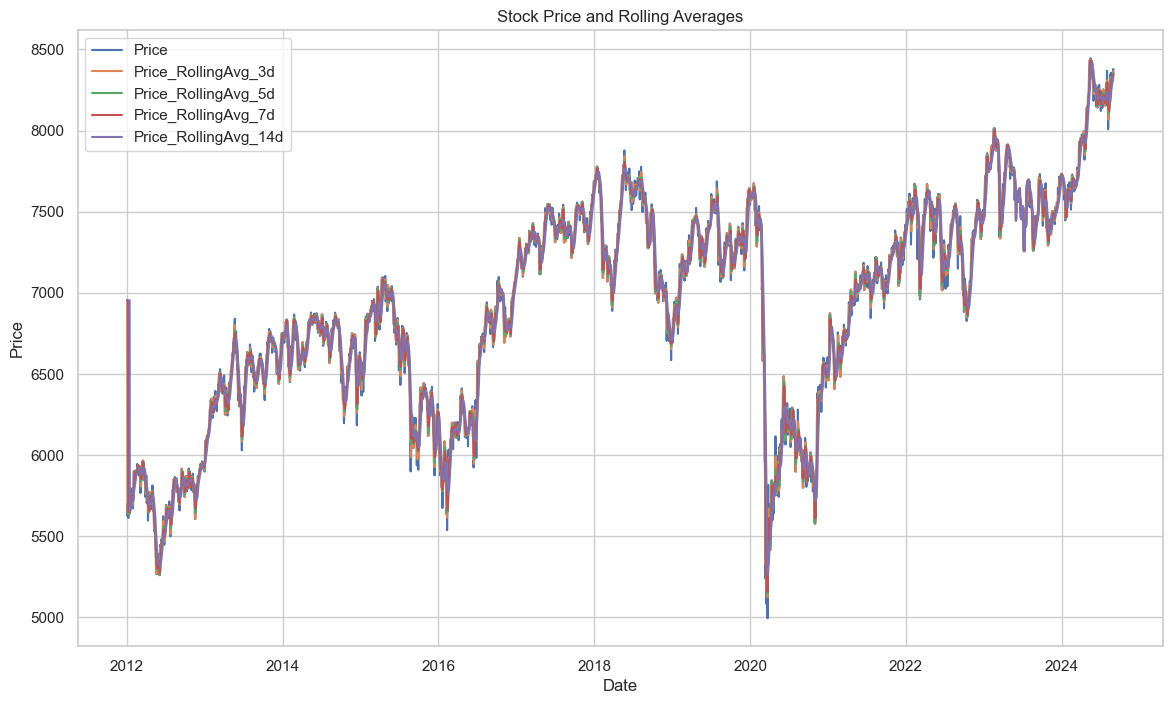

In [45]:
import matplotlib.pyplot as plt

# Define the features you want to plot
features_to_plot = [
    'Price',
    'Price_RollingAvg_3d',
    'Price_RollingAvg_5d',
    'Price_RollingAvg_7d',
    'Price_RollingAvg_14d'
]

# Plot each feature
plt.figure(figsize=(14, 8))

for feature in features_to_plot:
    plt.plot(merged_df[feature], label=feature)

plt.title('Stock Price and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# Loop through columns and print names excluding 'Price' and 'date'
for col in merged_df.columns:
    if 'Price' not in col   and col != 'date':
        print(col)
        merged_df = generate_lag_features(merged_df, target_col = col)

vader_sentiment
textblob_sentiment
is_event
topic_15
CARDINAL_one
CARDINAL_two
CARDINAL_million
CARDINAL_three
FAC_north london
FAC_nikki haley
GPE_russia
GPE_america
LOC_europe
LOC_africa
NORP_american
ORDINAL_first
ORDINAL_second
PERSON_bernie
PERSON_putin
QUANTITY_mile
TIME_night
TIME_hour
High_Low_Ratio


In [47]:
# merged_df['date'] = merged_df_copy['date']
merged_df

vader_sentiment  textblob_sentiment  is_event  topic_15  \
time_index                                                            
2012-01-03           0.9946            0.129496       1.0  0.129553   
2012-01-04           0.9946            0.129496       1.0  0.129553   
2012-01-05           0.9946            0.129496       1.0  0.129553   
2012-01-06           0.9946            0.129496       1.0  0.129553   
2012-01-07           0.9946            0.129496       1.0  0.129553   
...                     ...                 ...       ...       ...   
2024-08-26          -0.8779            0.005556       1.0  0.000000   
2024-08-27          -0.8779            0.005556       1.0  0.000000   
2024-08-28          -0.8779            0.005556       1.0  0.000000   
2024-08-29          -0.8779            0.005556       1.0  0.000000   
2024-08-30          -0.8779            0.005556       1.0  0.000000   

            CARDINAL_one  CARDINAL_two  CARDINAL_million  CARDINAL_three  \
time_index                                                                 
2012-01-03           1.0           1.0               0.0             0.0   
2012-01-04           1.0           1.0               0.0             0.0   
2012-01-05           1.0           1.0               0.0             0.0   
2012-01-06           1.0           1.0               0.0             0.0   
2012-01-07           1.0           1.0               0.0             0.0   
...                  ...           ...               ...             ...   
2024-08-26           1.0           0.0               0.0             0.0   
2024-08-27           1.0           0.0               0.0             0.0   
2024-08-28           1.0           0.0               0.0             0.0   
2024-08-29           1.0           0.0               0.0             0.0   
2024-08-30           1.0           0.0               0.0             0.0   

            FAC_north london  FAC_nikki haley  ...  High_Low_Ratio_lag_1d  \
time_index                                     ...                          
2012-01-03               0.0              0.0  ...               1.011463   
2012-01-04               0.0              0.0  ...               1.022904   
2012-01-05               0.0              0.0  ...               1.013012   
2012-01-06               0.0              0.0  ...               1.013350   
2012-01-07               0.0              0.0  ...               1.010567   
...                      ...              ...  ...                    ...   
2024-08-26               0.0              1.0  ...               1.005297   
2024-08-27               0.0              1.0  ...               1.005297   
2024-08-28               0.0              1.0  ...               1.008724   
2024-08-29               0.0              1.0  ...               1.004862   
2024-08-30               0.0              1.0  ...               1.006696   

            High_Low_Ratio_lag_2d  High_Low_Ratio_lag_4d  \
time_index                                                 
2012-01-03               1.011463               1.011463   
2012-01-04               1.011463               1.011463   
2012-01-05               1.022904               1.011463   
2012-01-06               1.013012               1.011463   
2012-01-07               1.013350               1.022904   
...                           ...                    ...   
2024-08-26               1.005297               1.005021   
2024-08-27               1.005297               1.005297   
2024-08-28               1.005297               1.005297   
2024-08-29               1.008724               1.005297   
2024-08-30               1.004862               1.005297   

            High_Low_Ratio_lag_8d  High_Low_Ratio_lag_10d  \
time_index                                                  
2012-01-03               1.011463                1.011463   
2012-01-04               1.011463                1.011463   
2012-01-05               1.011463                1.011463   
2012-01-06 

In [48]:
# merged_df['time_index'] = merged_df['date']

# merged_df.drop(columns=['date'],inplace=True)
# # Convert 'Date' to index
# merged_df.set_index('time_index', inplace=True)

In [49]:
merged_df

vader_sentiment  textblob_sentiment  is_event  topic_15  \
time_index                                                            
2012-01-03           0.9946            0.129496       1.0  0.129553   
2012-01-04           0.9946            0.129496       1.0  0.129553   
2012-01-05           0.9946            0.129496       1.0  0.129553   
2012-01-06           0.9946            0.129496       1.0  0.129553   
2012-01-07           0.9946            0.129496       1.0  0.129553   
...                     ...                 ...       ...       ...   
2024-08-26          -0.8779            0.005556       1.0  0.000000   
2024-08-27          -0.8779            0.005556       1.0  0.000000   
2024-08-28          -0.8779            0.005556       1.0  0.000000   
2024-08-29          -0.8779            0.005556       1.0  0.000000   
2024-08-30          -0.8779            0.005556       1.0  0.000000   

            CARDINAL_one  CARDINAL_two  CARDINAL_million  CARDINAL_three  \
time_index                                                                 
2012-01-03           1.0           1.0               0.0             0.0   
2012-01-04           1.0           1.0               0.0             0.0   
2012-01-05           1.0           1.0               0.0             0.0   
2012-01-06           1.0           1.0               0.0             0.0   
2012-01-07           1.0           1.0               0.0             0.0   
...                  ...           ...               ...             ...   
2024-08-26           1.0           0.0               0.0             0.0   
2024-08-27           1.0           0.0               0.0             0.0   
2024-08-28           1.0           0.0               0.0             0.0   
2024-08-29           1.0           0.0               0.0             0.0   
2024-08-30           1.0           0.0               0.0             0.0   

            FAC_north london  FAC_nikki haley  ...  High_Low_Ratio_lag_1d  \
time_index                                     ...                          
2012-01-03               0.0              0.0  ...               1.011463   
2012-01-04               0.0              0.0  ...               1.022904   
2012-01-05               0.0              0.0  ...               1.013012   
2012-01-06               0.0              0.0  ...               1.013350   
2012-01-07               0.0              0.0  ...               1.010567   
...                      ...              ...  ...                    ...   
2024-08-26               0.0              1.0  ...               1.005297   
2024-08-27               0.0              1.0  ...               1.005297   
2024-08-28               0.0              1.0  ...               1.008724   
2024-08-29               0.0              1.0  ...               1.004862   
2024-08-30               0.0              1.0  ...               1.006696   

            High_Low_Ratio_lag_2d  High_Low_Ratio_lag_4d  \
time_index                                                 
2012-01-03               1.011463               1.011463   
2012-01-04               1.011463               1.011463   
2012-01-05               1.022904               1.011463   
2012-01-06               1.013012               1.011463   
2012-01-07               1.013350               1.022904   
...                           ...                    ...   
2024-08-26               1.005297               1.005021   
2024-08-27               1.005297               1.005297   
2024-08-28               1.005297               1.005297   
2024-08-29               1.008724               1.005297   
2024-08-30               1.004862               1.005297   

            High_Low_Ratio_lag_8d  High_Low_Ratio_lag_10d  \
time_index                                                  
2012-01-03               1.011463                1.011463   
2012-01-04               1.011463                1.011463   
2012-01-05               1.011463                1.011463   
2012-01-06 

In [50]:
X = merged_df.drop(columns=['Price'])
y = merged_df['Price']

Tree-based models like RandomForestRegressor, ExtraTreesRegressor, and CatBoostRegressor are excellent for determining feature importance due to their ability to handle large datasets with many features.

In [51]:
!pip install catboost

In [52]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
import pandas as pd

# Assuming X is your feature matrix and y is your target variable
models = {
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "CatBoost": CatBoostRegressor()
}

feature_importances = pd.DataFrame()

for name, model in models.items():
    model.fit(X, y)
    feature_importances[name] = model.feature_importances_

feature_importances['mean_importance'] = feature_importances.mean(axis=1)
feature_importances.index = X.columns

# Sort features by their average importance across models
feature_importances = feature_importances.sort_values(by='mean_importance', ascending=False)

feature_importances


Learning rate set to 0.052721
0:	learn: 619.8441807	total: 225ms	remaining: 3m 44s
1:	learn: 590.8552905	total: 265ms	remaining: 2m 12s
2:	learn: 562.8125643	total: 331ms	remaining: 1m 50s
3:	learn: 537.0168363	total: 425ms	remaining: 1m 45s
4:	learn: 511.5071643	total: 469ms	remaining: 1m 33s
5:	learn: 487.5063265	total: 588ms	remaining: 1m 37s
6:	learn: 466.1697853	total: 628ms	remaining: 1m 29s
7:	learn: 444.1800232	total: 747ms	remaining: 1m 32s
8:	learn: 424.0451143	total: 787ms	remaining: 1m 26s
9:	learn: 405.3700621	total: 915ms	remaining: 1m 30s
10:	learn: 386.6908198	total: 964ms	remaining: 1m 26s
11:	learn: 368.5868203	total: 1.09s	remaining: 1m 29s
12:	learn: 351.5780970	total: 1.13s	remaining: 1m 25s
13:	learn: 336.0263462	total: 1.22s	remaining: 1m 26s
14:	learn: 320.7212053	total: 1.27s	remaining: 1m 23s
15:	learn: 306.6119847	total: 1.36s	remaining: 1m 23s
16:	learn: 292.9967139	total: 1.45s	remaining: 1m 23s
17:	learn: 279.8947632	total: 1.54s	remaining: 1m 24s
18:	lear

156:	learn: 48.9520986	total: 13.1s	remaining: 1m 10s
157:	learn: 48.8575407	total: 13.2s	remaining: 1m 10s
158:	learn: 48.8072248	total: 13.3s	remaining: 1m 10s
159:	learn: 48.6575628	total: 13.4s	remaining: 1m 10s
160:	learn: 48.5302990	total: 13.5s	remaining: 1m 10s
161:	learn: 48.4535199	total: 13.6s	remaining: 1m 10s
162:	learn: 48.3088650	total: 13.7s	remaining: 1m 10s
163:	learn: 48.2020235	total: 13.8s	remaining: 1m 10s
164:	learn: 48.1048947	total: 13.9s	remaining: 1m 10s
165:	learn: 47.9888783	total: 14s	remaining: 1m 10s
166:	learn: 47.8786235	total: 14.2s	remaining: 1m 10s
167:	learn: 47.7699677	total: 14.3s	remaining: 1m 10s
168:	learn: 47.6902064	total: 14.4s	remaining: 1m 10s
169:	learn: 47.5569644	total: 14.6s	remaining: 1m 11s
170:	learn: 47.4661685	total: 14.7s	remaining: 1m 11s
171:	learn: 47.4095503	total: 14.8s	remaining: 1m 11s
172:	learn: 47.3054950	total: 14.9s	remaining: 1m 11s
173:	learn: 47.2197314	total: 14.9s	remaining: 1m 10s
174:	learn: 47.1444044	total: 

313:	learn: 37.3347416	total: 27s	remaining: 59s
314:	learn: 37.2806221	total: 27.1s	remaining: 58.9s
315:	learn: 37.2666620	total: 27.2s	remaining: 58.9s
316:	learn: 37.2230749	total: 27.3s	remaining: 58.8s
317:	learn: 37.1420330	total: 27.4s	remaining: 58.7s
318:	learn: 37.0929656	total: 27.5s	remaining: 58.6s
319:	learn: 37.0721829	total: 27.6s	remaining: 58.6s
320:	learn: 37.0204656	total: 27.6s	remaining: 58.5s
321:	learn: 36.9753834	total: 27.7s	remaining: 58.3s
322:	learn: 36.9096354	total: 27.8s	remaining: 58.3s
323:	learn: 36.8341194	total: 27.8s	remaining: 58.1s
324:	learn: 36.7913232	total: 28s	remaining: 58.1s
325:	learn: 36.7383737	total: 28.1s	remaining: 58.1s
326:	learn: 36.6932534	total: 28.2s	remaining: 58s
327:	learn: 36.6638413	total: 28.2s	remaining: 57.8s
328:	learn: 36.6296423	total: 28.3s	remaining: 57.8s
329:	learn: 36.5789433	total: 28.4s	remaining: 57.6s
330:	learn: 36.5241051	total: 28.5s	remaining: 57.6s
331:	learn: 36.4589353	total: 28.5s	remaining: 57.4s
3

470:	learn: 31.0211344	total: 39.7s	remaining: 44.6s
471:	learn: 30.9812886	total: 39.8s	remaining: 44.5s
472:	learn: 30.9457670	total: 39.8s	remaining: 44.4s
473:	learn: 30.9194027	total: 39.9s	remaining: 44.3s
474:	learn: 30.8795283	total: 40s	remaining: 44.2s
475:	learn: 30.8501203	total: 40.1s	remaining: 44.1s
476:	learn: 30.8250854	total: 40.1s	remaining: 44s
477:	learn: 30.7924386	total: 40.2s	remaining: 43.9s
478:	learn: 30.7494631	total: 40.3s	remaining: 43.8s
479:	learn: 30.6955718	total: 40.3s	remaining: 43.7s
480:	learn: 30.6663202	total: 40.5s	remaining: 43.7s
481:	learn: 30.6305484	total: 40.5s	remaining: 43.5s
482:	learn: 30.5759810	total: 40.6s	remaining: 43.4s
483:	learn: 30.5327752	total: 40.7s	remaining: 43.3s
484:	learn: 30.4937121	total: 40.7s	remaining: 43.3s
485:	learn: 30.4625075	total: 40.8s	remaining: 43.2s
486:	learn: 30.4342778	total: 40.9s	remaining: 43s
487:	learn: 30.3753105	total: 41s	remaining: 43s
488:	learn: 30.3486006	total: 41s	remaining: 42.9s
489:	

628:	learn: 26.2197676	total: 53.6s	remaining: 31.6s
629:	learn: 26.1975618	total: 53.8s	remaining: 31.6s
630:	learn: 26.1747810	total: 53.9s	remaining: 31.5s
631:	learn: 26.1545411	total: 54s	remaining: 31.4s
632:	learn: 26.1279455	total: 54.1s	remaining: 31.4s
633:	learn: 26.1108677	total: 54.2s	remaining: 31.3s
634:	learn: 26.0912190	total: 54.3s	remaining: 31.2s
635:	learn: 26.0709982	total: 54.3s	remaining: 31.1s
636:	learn: 26.0524852	total: 54.5s	remaining: 31s
637:	learn: 26.0357767	total: 54.5s	remaining: 30.9s
638:	learn: 26.0119211	total: 54.6s	remaining: 30.8s
639:	learn: 26.0011850	total: 54.6s	remaining: 30.7s
640:	learn: 25.9791599	total: 54.7s	remaining: 30.6s
641:	learn: 25.9400135	total: 54.8s	remaining: 30.6s
642:	learn: 25.9236671	total: 54.9s	remaining: 30.5s
643:	learn: 25.8856226	total: 54.9s	remaining: 30.4s
644:	learn: 25.8646429	total: 55.1s	remaining: 30.3s
645:	learn: 25.8318626	total: 55.2s	remaining: 30.2s
646:	learn: 25.8000399	total: 55.2s	remaining: 30.

786:	learn: 22.6738690	total: 1m 8s	remaining: 18.5s
787:	learn: 22.6572216	total: 1m 8s	remaining: 18.4s
788:	learn: 22.6461145	total: 1m 8s	remaining: 18.3s
789:	learn: 22.6274954	total: 1m 8s	remaining: 18.3s
790:	learn: 22.6135742	total: 1m 8s	remaining: 18.2s
791:	learn: 22.6025958	total: 1m 8s	remaining: 18.1s
792:	learn: 22.5817343	total: 1m 9s	remaining: 18s
793:	learn: 22.5663948	total: 1m 9s	remaining: 18s
794:	learn: 22.5435611	total: 1m 9s	remaining: 17.9s
795:	learn: 22.5195698	total: 1m 9s	remaining: 17.8s
796:	learn: 22.4950186	total: 1m 9s	remaining: 17.7s
797:	learn: 22.4766542	total: 1m 9s	remaining: 17.6s
798:	learn: 22.4659662	total: 1m 9s	remaining: 17.5s
799:	learn: 22.4464504	total: 1m 9s	remaining: 17.4s
800:	learn: 22.4298798	total: 1m 9s	remaining: 17.4s
801:	learn: 22.4169056	total: 1m 10s	remaining: 17.3s
802:	learn: 22.3992153	total: 1m 10s	remaining: 17.2s
803:	learn: 22.3848406	total: 1m 10s	remaining: 17.1s
804:	learn: 22.3651845	total: 1m 10s	remaining:

941:	learn: 19.8961125	total: 1m 21s	remaining: 5.01s
942:	learn: 19.8820208	total: 1m 21s	remaining: 4.93s
943:	learn: 19.8685640	total: 1m 21s	remaining: 4.84s
944:	learn: 19.8549034	total: 1m 21s	remaining: 4.75s
945:	learn: 19.8411058	total: 1m 21s	remaining: 4.67s
946:	learn: 19.8266386	total: 1m 21s	remaining: 4.58s
947:	learn: 19.8072134	total: 1m 21s	remaining: 4.49s
948:	learn: 19.7906097	total: 1m 21s	remaining: 4.4s
949:	learn: 19.7811931	total: 1m 22s	remaining: 4.32s
950:	learn: 19.7593250	total: 1m 22s	remaining: 4.23s
951:	learn: 19.7433592	total: 1m 22s	remaining: 4.14s
952:	learn: 19.7289412	total: 1m 22s	remaining: 4.06s
953:	learn: 19.7082274	total: 1m 22s	remaining: 3.97s
954:	learn: 19.6892148	total: 1m 22s	remaining: 3.88s
955:	learn: 19.6736054	total: 1m 22s	remaining: 3.8s
956:	learn: 19.6509265	total: 1m 22s	remaining: 3.71s
957:	learn: 19.6394500	total: 1m 22s	remaining: 3.62s
958:	learn: 19.6250173	total: 1m 22s	remaining: 3.54s
959:	learn: 19.6107978	total: 

RandomForest    ExtraTrees   CatBoost  mean_importance
Price_lag_1d            5.038210e-01  1.115203e-01  21.282147     7.299163e+00
Price_lag_2d            8.840010e-04  1.415509e-01  18.604997     6.249144e+00
Price_RollingAvg_3d     4.917887e-01  1.345237e-01  15.281568     5.302627e+00
Price_RollingAvg_5d     6.508597e-04  1.364063e-01  10.138815     3.425291e+00
Price_RollingAvg_14d    9.304469e-05  8.139459e-02   7.991429     2.690972e+00
...                              ...           ...        ...              ...
ORDINAL_second          8.801093e-07  4.950473e-06   0.000000     1.943528e-06
PERSON_putin_lag_2d     7.093777e-07  5.075520e-06   0.000000     1.928299e-06
PERSON_bernie           5.689569e-07  4.019566e-06   0.000000     1.529508e-06
FAC_nikki haley_lag_1d  1.287899e-07  2.639400e-06   0.000000     9.227298e-07
is_event                8.969058e-08  9.073572e-08   0.000000     6.014210e-08

[266 rows x 4 columns]

In [53]:
feature_importances[feature_importances['mean_importance'] > 0.005]

RandomForest  ExtraTrees   CatBoost  \
Price_lag_1d                    0.503821    0.111520  21.282147   
Price_lag_2d                    0.000884    0.141551  18.604997   
Price_RollingAvg_3d             0.491789    0.134524  15.281568   
Price_RollingAvg_5d             0.000651    0.136406  10.138815   
Price_RollingAvg_14d            0.000093    0.081395   7.991429   
...                                  ...         ...        ...   
textblob_sentiment_lag_4d       0.000017    0.000018   0.016515   
vader_sentiment_lag_4d          0.000020    0.000012   0.016420   
LOC_africa_RollingAvg_14d       0.000003    0.000010   0.015683   
FAC_nikki haley_lag_8d          0.000004    0.000006   0.015410   
textblob_sentiment_lag_10d      0.000019    0.000016   0.015265   

                            mean_importance  
Price_lag_1d                       7.299163  
Price_lag_2d                       6.249144  
Price_RollingAvg_3d                5.302627  
Price_RollingAvg_5d                3.425291  
Price_RollingAvg_14d               2.690972  
...                                     ...  
textblob_sentiment_lag_4d          0.005517  
vader_sentiment_lag_4d             0.005484  
LOC_africa_RollingAvg_14d          0.005232  
FAC_nikki haley_lag_8d             0.005140  
textblob_sentiment_lag_10d         0.005100  

[87 rows x 4 columns]

In [54]:
# Select top N features
top_features = feature_importances[feature_importances['mean_importance'] > 0.005].index
X_top_features = X[top_features]
X_top_features

Price_lag_1d  Price_lag_2d  Price_RollingAvg_3d  \
time_index                                                    
2012-01-03   6952.947487   6952.947487          6952.947487   
2012-01-04   5699.910000   6952.947487          6952.947487   
2012-01-05   5668.450000   5699.910000          5664.206667   
2012-01-06   5624.260000   5668.450000          5647.463333   
2012-01-07   5649.680000   5624.260000          5641.206667   
...                  ...           ...                  ...   
2024-08-26   8327.780000   8327.780000          8327.780000   
2024-08-27   8327.780000   8327.780000          8333.673333   
2024-08-28   8345.460000   8327.780000          8339.030000   
2024-08-29   8343.850000   8345.460000          8356.316667   
2024-08-30   8379.640000   8343.850000          8366.706667   

            Price_RollingAvg_5d  Price_RollingAvg_14d  Price_lag_4d  \
time_index                                                            
2012-01-03          6952.947487           6952.947487   6952.947487   
2012-01-04          6952.947487           6952.947487   6952.947487   
2012-01-05          6952.947487           6952.947487   6952.947487   
2012-01-06          6952.947487           6952.947487   6952.947487   
2012-01-07          5658.396000           6952.947487   5699.910000   
...                         ...                   ...           ...   
2024-08-26          8319.824000           8307.905000   8288.000000   
2024-08-27          8331.316000           8315.778571   8327.780000   
2024-08-28          8334.530000           8320.264286   8327.780000   
2024-08-29          8344.902000           8322.570714   8327.780000   
2024-08-30          8354.672000           8327.229286   8327.780000   

            Price_RollingAvg_7d  Price_lag_8d  Price_lag_12d  Price_Range  \
time_index                                                                  
2012-01-03          6952.947487   6952.947487    6952.947487       127.63   
2012-01-04          6952.947487   6952.947487    6952.947487        73.47   
2012-01-05          6952.947487   6952.947487    6952.947487        74.95   
2012-01-06          6952.947487   6952.947487    6952.947487        59.42   
2012-01-07          6952.947487   6952.947487    6952.947487        59.42   
...                         ...           ...            ...          ...   
2024-08-26          8307.981429   8311.410000    8281.050000        43.90   
2024-08-27          8318.287143   8356.940000    8347.350000        72.65   
2024-08-28          8326.918571   8273.320000    8311.410000        40.46   
2024-08-29          8340.010000   8283.430000    8311.410000        55.82   
2024-08-30          8346.988571   8288.000000    8311.410000        50.63   

            ...  textblob_sentiment_RollingAvg_5d  TIME_night_RollingAvg_14d  \
time_index  ...                                                                
2012-01-03  ...                          0.065973                   0.227493   
2012-01-04  ...                          0.065973                   0.227493   
2012-01-05  ...                          0.065973                   0.227493   
2012-01-06  ...                          0.065973                   0.227493   
2012-01-07  ...                          0.129496                   0.227493   
...         ...                               ...                        ...   
2024-08-26  ...                          0.005556                   0.000000   
2024-08-27  ...                          0.005556                   0.000000   
2024-08-28  ...                          0.005556                   0.000000   
2024-08-29  ...                          0.005556                   0.000000   
2024-08-30  ...                          0.005556                   0.000000   

            FAC_north london_lag_2d  topic_15_lag_10d  CARDINAL_two_lag_2d  \
time_index                                                                   
2012-01-03                 0.006258          0.091236             0.4

In [55]:
top_features

Index(['Price_lag_1d', 'Price_lag_2d', 'Price_RollingAvg_3d',
       'Price_RollingAvg_5d', 'Price_RollingAvg_14d', 'Price_lag_4d',
       'Price_RollingAvg_7d', 'Price_lag_8d', 'Price_lag_12d', 'Price_Range',
       'topic_15_RollingAvg_3d', 'High_Low_Ratio', 'topic_15_lag_4d',
       'Price_lag_10d', 'topic_15_lag_12d', 'PERSON_bernie_RollingAvg_7d',
       'High_Low_Ratio_RollingAvg_14d', 'vader_sentiment_lag_8d',
       'vader_sentiment_RollingAvg_5d', 'Price_Per_Volume', 'Price_Volume',
       'textblob_sentiment_lag_2d', 'High_Low_Ratio_RollingAvg_7d',
       'High_Low_Ratio_RollingAvg_3d', 'CARDINAL_one_RollingAvg_14d',
       'High_Low_Ratio_lag_10d', 'ORDINAL_first_RollingAvg_14d',
       'TIME_hour_RollingAvg_5d', 'ORDINAL_first_RollingAvg_3d',
       'PERSON_putin_RollingAvg_14d', 'GPE_america_RollingAvg_5d',
       'NORP_american_lag_1d', 'LOC_europe_lag_1d', 'High_Low_Ratio_lag_1d',
       'textblob_sentiment', 'High_Low_Ratio_lag_8d',
       'FAC_north london_lag_12d', 't

In [56]:
from statsmodels.tsa.stattools import adfuller

stationary_features = []

for feature in top_features:
    result = adfuller(X_top_features[feature])
    if result[1] < 0.05:  # p-value < 0.05 indicates stationarity
        stationary_features.append(feature)

X_stationary = X_top_features[stationary_features]
X_stationary

Price_Range  topic_15_RollingAvg_3d  High_Low_Ratio  \
time_index                                                        
2012-01-03       127.63                0.091236        1.022904   
2012-01-04        73.47                0.091236        1.013012   
2012-01-05        74.95                0.129553        1.013350   
2012-01-06        59.42                0.129553        1.010567   
2012-01-07        59.42                0.129553        1.010567   
...                 ...                     ...             ...   
2024-08-26        43.90                0.000000        1.005297   
2024-08-27        72.65                0.000000        1.008724   
2024-08-28        40.46                0.000000        1.004862   
2024-08-29        55.82                0.000000        1.006696   
2024-08-30        50.63                0.000000        1.006054   

            topic_15_lag_4d  topic_15_lag_12d  PERSON_bernie_RollingAvg_7d  \
time_index                                                                   
2012-01-03         0.091236          0.091236                     0.098103   
2012-01-04         0.091236          0.091236                     0.098103   
2012-01-05         0.091236          0.091236                     0.098103   
2012-01-06         0.091236          0.091236                     0.098103   
2012-01-07         0.129553          0.091236                     0.098103   
...                     ...               ...                          ...   
2024-08-26         0.000000          0.000000                     0.000000   
2024-08-27         0.000000          0.000000                     0.000000   
2024-08-28         0.000000          0.000000                     0.000000   
2024-08-29         0.000000          0.000000                     0.000000   
2024-08-30         0.000000          0.000000                     0.000000   

            High_Low_Ratio_RollingAvg_14d  vader_sentiment_lag_8d  \
time_index                                                          
2012-01-03                       1.011463               -0.054886   
2012-01-04                       1.011463               -0.054886   
2012-01-05                       1.011463               -0.054886   
2012-01-06                       1.011463               -0.054886   
2012-01-07                       1.011463               -0.054886   
...                                   ...                     ...   
2024-08-26                       1.006935               -0.877900   
2024-08-27                       1.007066               -0.877900   
2024-08-28                       1.006910               -0.877900   
2024-08-29                       1.006612               -0.877900   
2024-08-30                       1.006542               -0.877900   

            vader_sentiment_RollingAvg_5d  Price_Per_Volume  ...  \
time_index                                                   ...   
2012-01-03                      -0.054886          7.321375  ...   
2012-01-04                      -0.054886          8.133340  ...   
2012-01-05                      -0.054886          7.080954  ...   
2012-01-06                      -0.054886          8.013503  ...   
2012-01-07                       0.994600          8.013503  ...   
...                                   ...               ...  ...   
2024-08-26                      -0.877900         13.551903  ...   
2024-08-27                      -0.877900         10.805842  ...   
2024-08-28                      -0.877900         13.712161  ...   
2024-08-29                      -0.877900         14.202539  ...   
2024-08-30                      -0.877900          7.756139  ...   

            textblob_sentiment_RollingAvg_5d  TIME_night_RollingAvg_14d  \
time_index                                                                
2012-01-03                          0.065973                   0.227493   
2012-01-04                          0.065973                   0.227493   
2012-01-05                          0.0659

# Use the Augmented Dickey-Fuller (ADF) test to ensure that selected features are stationary, which is crucial for ARIMA and Exponential Smoothing models.

In [57]:
stationary_features

['Price_Range',
 'topic_15_RollingAvg_3d',
 'High_Low_Ratio',
 'topic_15_lag_4d',
 'topic_15_lag_12d',
 'PERSON_bernie_RollingAvg_7d',
 'High_Low_Ratio_RollingAvg_14d',
 'vader_sentiment_lag_8d',
 'vader_sentiment_RollingAvg_5d',
 'Price_Per_Volume',
 'Price_Volume',
 'textblob_sentiment_lag_2d',
 'High_Low_Ratio_RollingAvg_7d',
 'High_Low_Ratio_RollingAvg_3d',
 'CARDINAL_one_RollingAvg_14d',
 'High_Low_Ratio_lag_10d',
 'TIME_hour_RollingAvg_5d',
 'ORDINAL_first_RollingAvg_3d',
 'PERSON_putin_RollingAvg_14d',
 'NORP_american_lag_1d',
 'LOC_europe_lag_1d',
 'High_Low_Ratio_lag_1d',
 'textblob_sentiment',
 'High_Low_Ratio_lag_8d',
 'FAC_north london_lag_12d',
 'topic_15_RollingAvg_7d',
 'topic_15_RollingAvg_14d',
 'High_Low_Ratio_lag_12d',
 'GPE_america_RollingAvg_3d',
 'High_Low_Ratio_lag_2d',
 'CARDINAL_two_RollingAvg_3d',
 'ORDINAL_first_lag_12d',
 'High_Low_Ratio_lag_4d',
 'PERSON_bernie_lag_10d',
 'vader_sentiment_lag_12d',
 'ORDINAL_second_RollingAvg_3d',
 'TIME_hour_lag_1d',
 'Hig

In [58]:
corr_matrix = X_stationary.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Select features with correlation less than 0.8
selected_features = [column for column in upper_triangle.columns if not any(upper_triangle[column] > 0.8)]
X_final = X_stationary[selected_features]


In [59]:
X_final

Price_Range  topic_15_RollingAvg_3d  topic_15_lag_12d  \
time_index                                                          
2012-01-03       127.63                0.091236          0.091236   
2012-01-04        73.47                0.091236          0.091236   
2012-01-05        74.95                0.129553          0.091236   
2012-01-06        59.42                0.129553          0.091236   
2012-01-07        59.42                0.129553          0.091236   
...                 ...                     ...               ...   
2024-08-26        43.90                0.000000          0.000000   
2024-08-27        72.65                0.000000          0.000000   
2024-08-28        40.46                0.000000          0.000000   
2024-08-29        55.82                0.000000          0.000000   
2024-08-30        50.63                0.000000          0.000000   

            PERSON_bernie_RollingAvg_7d  High_Low_Ratio_RollingAvg_14d  \
time_index                                                               
2012-01-03                     0.098103                       1.011463   
2012-01-04                     0.098103                       1.011463   
2012-01-05                     0.098103                       1.011463   
2012-01-06                     0.098103                       1.011463   
2012-01-07                     0.098103                       1.011463   
...                                 ...                            ...   
2024-08-26                     0.000000                       1.006935   
2024-08-27                     0.000000                       1.007066   
2024-08-28                     0.000000                       1.006910   
2024-08-29                     0.000000                       1.006612   
2024-08-30                     0.000000                       1.006542   

            vader_sentiment_lag_8d  vader_sentiment_RollingAvg_5d  \
time_index                                                          
2012-01-03               -0.054886                      -0.054886   
2012-01-04               -0.054886                      -0.054886   
2012-01-05               -0.054886                      -0.054886   
2012-01-06               -0.054886                      -0.054886   
2012-01-07               -0.054886                       0.994600   
...                            ...                            ...   
2024-08-26               -0.877900                      -0.877900   
2024-08-27               -0.877900                      -0.877900   
2024-08-28               -0.877900                      -0.877900   
2024-08-29               -0.877900                      -0.877900   
2024-08-30               -0.877900                      -0.877900   

            Price_Per_Volume  Price_Volume  textblob_sentiment_lag_2d  ...  \
time_index                                                             ...   
2012-01-03          7.321375  4.437551e+06                   0.065973  ...   
2012-01-04          8.133340  3.950570e+06                   0.065973  ...   
2012-01-05          7.080954  4.467237e+06                   0.129496  ...   
2012-01-06          8.013503  3.983137e+06                   0.129496  ...   
2012-01-07          8.013503  3.983137e+06                   0.129496  ...   
...                      ...           ...                        ...  ...   
2024-08-26         13.551903  5.117504e+06                   0.005556  ...   
2024-08-27         10.805842  6.445282e+06                   0.005556  ...   
2024-08-28         13.712161  5.077233e+06                   0.005556  ...   
2024-08-29         14.202539  4.944071e+06                   0.005556  ...   
2024-08-30          7.756139  9.046760e+06                   0.005556  ...   

            FAC_north london_RollingAvg_3d  vader_sentiment_lag_10d  \
time_index                                                            
2012-01-03                        0.006258                -0.054886   
2012-01-04               

In [60]:
selected_features

['Price_Range',
 'topic_15_RollingAvg_3d',
 'topic_15_lag_12d',
 'PERSON_bernie_RollingAvg_7d',
 'High_Low_Ratio_RollingAvg_14d',
 'vader_sentiment_lag_8d',
 'vader_sentiment_RollingAvg_5d',
 'Price_Per_Volume',
 'Price_Volume',
 'textblob_sentiment_lag_2d',
 'CARDINAL_one_RollingAvg_14d',
 'High_Low_Ratio_lag_10d',
 'TIME_hour_RollingAvg_5d',
 'ORDINAL_first_RollingAvg_3d',
 'PERSON_putin_RollingAvg_14d',
 'NORP_american_lag_1d',
 'LOC_europe_lag_1d',
 'textblob_sentiment',
 'High_Low_Ratio_lag_8d',
 'FAC_north london_lag_12d',
 'High_Low_Ratio_lag_12d',
 'GPE_america_RollingAvg_3d',
 'CARDINAL_two_RollingAvg_3d',
 'ORDINAL_first_lag_12d',
 'PERSON_bernie_lag_10d',
 'vader_sentiment_lag_12d',
 'ORDINAL_second_RollingAvg_3d',
 'TIME_hour_lag_1d',
 'CARDINAL_million_RollingAvg_7d',
 'textblob_sentiment_RollingAvg_3d',
 'vader_sentiment',
 'textblob_sentiment_RollingAvg_14d',
 'is_event_lag_8d',
 'FAC_north london_lag_10d',
 'CARDINAL_three_RollingAvg_5d',
 'CARDINAL_million_lag_10d',
 '

In [61]:
regressor_features = [
    'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'vader_sentiment', 'textblob_sentiment', 'is_event', 'week', 'month', 'quarter' ,'year', 'dayofweek'
]

In [62]:
columns_list  = X_top_features.columns.tolist()
combined_features = columns_list + selected_features
combined_features=set(combined_features)
combined_features = list(combined_features)
combined_features

['CARDINAL_million_lag_10d',
 'FAC_north london_lag_8d',
 'textblob_sentiment',
 'CARDINAL_million_RollingAvg_14d',
 'Price_lag_10d',
 'topic_15_lag_1d',
 'FAC_nikki haley_lag_8d',
 'PERSON_bernie_lag_10d',
 'textblob_sentiment_RollingAvg_5d',
 'LOC_europe_lag_4d',
 'is_event_lag_10d',
 'High_Low_Ratio_RollingAvg_7d',
 'vader_sentiment_lag_2d',
 'CARDINAL_one_RollingAvg_14d',
 'textblob_sentiment_RollingAvg_3d',
 'topic_15_RollingAvg_3d',
 'Price_RollingAvg_14d',
 'High_Low_Ratio_RollingAvg_5d',
 'textblob_sentiment_RollingAvg_7d',
 'textblob_sentiment_RollingAvg_14d',
 'topic_15_lag_12d',
 'vader_sentiment_RollingAvg_5d',
 'FAC_north london_lag_12d',
 'CARDINAL_two_lag_2d',
 'topic_15_RollingAvg_7d',
 'vader_sentiment_lag_1d',
 'textblob_sentiment_lag_12d',
 'High_Low_Ratio_RollingAvg_14d',
 'TIME_hour_lag_1d',
 'CARDINAL_million_RollingAvg_7d',
 'textblob_sentiment_lag_10d',
 'Price_Volume',
 'LOC_africa_RollingAvg_14d',
 'vader_sentiment_RollingAvg_7d',
 'Price_lag_4d',
 'ORDINAL_fi

In [63]:
merged_df[combined_features]

CARDINAL_million_lag_10d  FAC_north london_lag_8d  \
time_index                                                      
2012-01-03                  0.308236                 0.006258   
2012-01-04                  0.308236                 0.006258   
2012-01-05                  0.308236                 0.006258   
2012-01-06                  0.308236                 0.006258   
2012-01-07                  0.308236                 0.006258   
...                              ...                      ...   
2024-08-26                  0.000000                 0.000000   
2024-08-27                  0.000000                 0.000000   
2024-08-28                  0.000000                 0.000000   
2024-08-29                  0.000000                 0.000000   
2024-08-30                  0.000000                 0.000000   

            textblob_sentiment  CARDINAL_million_RollingAvg_14d  \
time_index                                                        
2012-01-03            0.129496                         0.308236   
2012-01-04            0.129496                         0.308236   
2012-01-05            0.129496                         0.308236   
2012-01-06            0.129496                         0.308236   
2012-01-07            0.129496                         0.308236   
...                        ...                              ...   
2024-08-26            0.005556                         0.000000   
2024-08-27            0.005556                         0.000000   
2024-08-28            0.005556                         0.000000   
2024-08-29            0.005556                         0.000000   
2024-08-30            0.005556                         0.000000   

            Price_lag_10d  topic_15_lag_1d  FAC_nikki haley_lag_8d  \
time_index                                                           
2012-01-03    6952.947487         0.091236                0.016149   
2012-01-04    6952.947487         0.129553                0.016149   
2012-01-05    6952.947487         0.129553                0.016149   
2012-01-06    6952.947487         0.129553                0.016149   
2012-01-07    6952.947487         0.129553                0.016149   
...                   ...              ...                     ...   
2024-08-26    8311.410000         0.000000                1.000000   
2024-08-27    8311.410000         0.000000                1.000000   
2024-08-28    8311.410000         0.000000                1.000000   
2024-08-29    8356.940000         0.000000                1.000000   
2024-08-30    8273.320000         0.000000                1.000000   

            PERSON_bernie_lag_10d  textblob_sentiment_RollingAvg_5d  \
time_index                                                            
2012-01-03               0.098103                          0.065973   
2012-01-04               0.098103                          0.065973   
2012-01-05               0.098103                          0.065973   
2012-01-06               0.098103                          0.065973   
2012-01-07               0.098103                          0.129496   
...                           ...                               ...   
2024-08-26               0.000000                          0.005556   
2024-08-27               0.000000                          0.005556   
2024-08-28               0.000000                          0.005556   
2024-08-29               0.000000                          0.005556   
2024-08-30               0.000000                          0.005556   

            LOC_europe_lag_4d  ...  textblob_sentiment_lag_1d  \
time_index                     ...                              
2012-01-03           0.162091  ...                   0.065973   
2012-01-04           0.162091  ...                   0.129496   
2012-01-05           0.162091  ...                   0.129496   
2012-01-06           0.162091  ...                   0.129496   
2012-01-07           0.000000  ...                   0.129496   
... 

In [64]:
merged_df[combined_features].to_csv('historical_data.csv')